<a href="https://colab.research.google.com/github/Yobangs/Ensemble-Indobert-BiLSTM-Fake-Health/blob/main/HealthCombine_FINAL_PROGRAM_SKRIPSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers sentencepiece torch pandas tqdm
!pip install googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.4 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=81dcb20c01b4d36add36564e2619d55df4fca62703c099bf428ea9a8c6fdbb30
  Stored in directory: /root/.cache/pip/wheels/95/0f/04/b17a72024b56a60e499ce1a6313d283ed5ba332407155bee03
Successfully built googletrans
  Attempting uninstall: hyperframe
    Found existing installation: hyperframe 6.1.0
    Uninstalling hyperfram

# ANALISIS_DATASET Health RELEASE

In [ ]:
import json
import csv
import os
from pathlib import Path

# Konfigurasi
folder = "HealthRelease"
output_csv = "dataset_release.csv"

# Ambil semua file JSON
json_files = list(Path(folder).glob("*.json"))
print(f"Ditemukan {len(json_files)} file JSON")

# Baca file pertama untuk ambil header
with open(json_files[0], 'r', encoding='utf-8') as f:
    sample = json.load(f)

    # Fungsi flatten nested dict
def flatten(d, parent=''):
    items = []
    for k, v in d.items():
        key = f"{parent}_{k}" if parent else k
        if isinstance(v, dict):
            items.extend(flatten(v, key).items())
        else:
            items.append((key, v))
    return dict(items)

    # Proses semua file
data = []
for file in json_files:
    with open(file, 'r', encoding='utf-8') as f:
        obj = json.load(f)
        data.append(flatten(obj))

        # Tulis ke CSV
if data:
    keys = set()
    for d in data:
        keys.update(d.keys())

    with open(output_csv, 'w', newline='', encoding='utf-8') as f:
        writer = csv.DictWriter(f, fieldnames=sorted(keys))
        writer.writeheader()
        writer.writerows(data)

    print(f"Berhasil! Dataset disimpan ke {output_csv}")
    print(f"Total baris: {len(data)}, Total kolom: {len(keys)}")
else:
    print("Tidak ada data untuk diproses")

Ditemukan 599 file JSON
Berhasil! Dataset disimpan ke dataset_release.csv
Total baris: 599, Total kolom: 182


In [ ]:
import pandas as pd

# Baca dataset
df = pd.read_csv('dataset_release.csv')

print("="*60)
print("ANALISIS DATASET")
print("="*60)
print(f"\nTotal baris: {len(df)}")
print(f"Total kolom: {len(df.columns)}")

# Tampilkan semua nama kolom
print("\n" + "="*60)
print("DAFTAR SEMUA KOLOM:")
print("="*60)
for i, col in enumerate(df.columns, 1):
    # Hitung nilai non-null
    non_null = df[col].notna().sum()
    pct = (non_null/len(df)*100)
    print(f"{i:3d}. {col:50s} - {non_null:3d} ({pct:5.1f}%)")


ANALISIS DATASET

Total baris: 599
Total kolom: 182

DAFTAR SEMUA KOLOM:
  1. authors                                            - 599 (100.0%)
  2. canonical_link                                     - 570 ( 95.2%)
  3. images                                             - 599 (100.0%)
  4. keywords                                           - 599 (100.0%)
  5. meta_data_Caption                                  -   1 (  0.2%)
  6. meta_data_DC.date                                  -   3 (  0.5%)
  7. meta_data_DC.date.issued                           -   1 (  0.2%)
  8. meta_data_Generator                                -   2 (  0.3%)
  9. meta_data_HandheldFriendly                         -  17 (  2.8%)
 10. meta_data_Height                                   -   1 (  0.2%)
 11. meta_data_ICBM                                     -   1 (  0.2%)
 12. meta_data_ID                                       -   1 (  0.2%)
 13. meta_data_MobileOptimized                          -  26 (  4.3%)
 14.

In [ ]:
# Tampilkan contoh 3 baris pertama
print("\n" + "="*60)
print("CONTOH DATA (3 baris pertama):")
print("="*60)
print(df.head(3).to_string())

# Analisis kolom dengan nilai terbanyak
print("\n" + "="*60)
print("TOP 20 KOLOM DENGAN DATA TERLENGKAP:")
print("="*60)
completeness = df.notna().sum().sort_values(ascending=False).head(20)
for col, count in completeness.items():
    pct = (count/len(df)*100)
    print(f"{col:50s}: {count:3d} ({pct:5.1f}%)")

print("\n" + "="*60)
print("Silakan tentukan kolom mana yang ingin dipertahankan!")
print("="*60)


CONTOH DATA (3 baris pertama):
  authors                                                                                                   canonical_link                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

# ANALISIS_DATASET Health STORY

In [ ]:
import json
import csv
import os
from pathlib import Path

# Konfigurasi
folder = "HealthStory"
output_csv = "dataset_story.csv"

# Ambil semua file JSON
json_files = list(Path(folder).glob("*.json"))
print(f"Ditemukan {len(json_files)} file JSON")

# Baca file pertama untuk ambil header
with open(json_files[0], 'r', encoding='utf-8') as f:
    sample = json.load(f)

    # Fungsi flatten nested dict
def flatten(d, parent=''):
    items = []
    for k, v in d.items():
        key = f"{parent}_{k}" if parent else k
        if isinstance(v, dict):
            items.extend(flatten(v, key).items())
        else:
            items.append((key, v))
    return dict(items)

    # Proses semua file
data = []
for file in json_files:
    with open(file, 'r', encoding='utf-8') as f:
        obj = json.load(f)
        data.append(flatten(obj))

        # Tulis ke CSV
if data:
    keys = set()
    for d in data:
        keys.update(d.keys())

    with open(output_csv, 'w', newline='', encoding='utf-8') as f:
        writer = csv.DictWriter(f, fieldnames=sorted(keys))
        writer.writeheader()
        writer.writerows(data)

    print(f"Berhasil! Dataset disimpan ke {output_csv}")
    print(f"Total baris: {len(data)}, Total kolom: {len(keys)}")
else:
    print("Tidak ada data untuk diproses")

Ditemukan 1638 file JSON
Berhasil! Dataset disimpan ke dataset_story.csv
Total baris: 1638, Total kolom: 484


In [ ]:
import pandas as pd

# Baca dataset
df = pd.read_csv('dataset_story.csv')

print("="*60)
print("ANALISIS DATASET")
print("="*60)
print(f"\nTotal baris: {len(df)}")
print(f"Total kolom: {len(df.columns)}")

# Tampilkan semua nama kolom
print("\n" + "="*60)
print("DAFTAR SEMUA KOLOM:")
print("="*60)
for i, col in enumerate(df.columns, 1):
    # Hitung nilai non-null
    non_null = df[col].notna().sum()
    pct = (non_null/len(df)*100)
    print(f"{i:3d}. {col:50s} - {non_null:3d} ({pct:5.1f}%)")


ANALISIS DATASET

Total baris: 1638
Total kolom: 484

DAFTAR SEMUA KOLOM:
  1. authors                                            - 1638 (100.0%)
  2. canonical_link                                     - 1539 ( 94.0%)
  3. images                                             - 1638 (100.0%)
  4. keywords                                           - 1638 (100.0%)
  5. meta_data_AUTHOR                                   -  17 (  1.0%)
  6. meta_data_AdsBot-Google                            -   1 (  0.1%)
  7. meta_data_AggIds                                   -   1 (  0.1%)
  8. meta_data_Author                                   - 205 ( 12.5%)
  9. meta_data_BN                                       -  34 (  2.1%)
 10. meta_data_CG                                       - 129 (  7.9%)
 11. meta_data_CLMST                                    -  34 (  2.1%)
 12. meta_data_CN                                       -  17 (  1.0%)
 13. meta_data_CT                                       -   8 (  0.5%)

In [ ]:
# Tampilkan contoh 3 baris pertama
print("\n" + "="*60)
print("CONTOH DATA (3 baris pertama):")
print("="*60)
print(df.head(3).to_string())

# Analisis kolom dengan nilai terbanyak
print("\n" + "="*60)
print("TOP 20 KOLOM DENGAN DATA TERLENGKAP:")
print("="*60)
completeness = df.notna().sum().sort_values(ascending=False).head(20)
for col, count in completeness.items():
    pct = (count/len(df)*100)
    print(f"{col:50s}: {count:3d} ({pct:5.1f}%)")

print("\n" + "="*60)
print("Silakan tentukan kolom mana yang ingin dipertahankan!")
print("="*60)


CONTOH DATA (3 baris pertama):
                            authors                                                          canonical_link                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      images keywords       meta_data_AUTHOR meta_data_AdsBot-Google meta_data_AggIds meta_data_Author meta_data_BN meta_data_CG meta_data_CLMST meta_data_CN meta_data_CT me

# REKAP MENJADI CSV

In [ ]:
import json
import csv
import os
from pathlib import Path
import pandas as pd

# Konfigurasi
folder = "HealthRelease"
output_csv = "HealthRelease_Cleaned.csv"

# Ambil semua file JSON
json_files = list(Path(folder).glob("*.json"))
print(f"📁 Ditemukan {len(json_files)} file JSON")

# Proses semua file
data = []
errors = []

for file in json_files:
    try:
        file_id = file.stem

        with open(file, 'r', encoding='utf-8') as f:
            obj = json.load(f)

            data.append({
                'file_id': file_id,
                'title': obj.get('title', ''),
                'text': obj.get('text', ''),
                'url': obj.get('url', ''),
                'source': obj.get('source', ''),
                'publish_date': obj.get('publish_date', '')
            })

    except Exception as e:
        errors.append(f"{file.name}: {e}")

# Buat DataFrame
df = pd.DataFrame(data)

# Bersihkan data
df['title'] = df['title'].str.strip()
df['text'] = df['text'].str.strip()

# Hapus baris kosong
df_original_len = len(df)
df = df[(df['title'] != '') & (df['text'] != '')]
df = df[df['text'].str.len() >= 100]
df = df.sort_values('file_id').reset_index(drop=True)

# Simpan
df.to_csv(output_csv, index=False)

# Output ringkas dan rapi
print("=" * 80)
print(f"✅ DATASET BERHASIL DIBUAT: {output_csv}")
print("=" * 80)
print(f"Total file JSON     : {len(json_files)}")
print(f"Artikel valid       : {len(df)} ({len(df)/len(json_files)*100:.1f}%)")
print(f"Artikel dibuang     : {df_original_len - len(df)} (text < 100 chars atau kosong)")
if errors:
    print(f"File error          : {len(errors)}")

# Statistik kolom (compact)
print("-" * 80)
print("KELENGKAPAN DATA:")
for col in df.columns:
    non_null = df[col].notna().sum()
    pct = non_null/len(df)*100
    bar = "█" * int(pct/5) + "░" * (20 - int(pct/5))
    print(f"  {col:15s} [{bar}] {pct:5.1f}% ({non_null}/{len(df)})")

# Statistik teks
print("-" * 80)
print("STATISTIK TEKS:")
text_lengths = df['text'].str.len()
print(f"  Rata-rata panjang  : {text_lengths.mean():.0f} karakter")
print(f"  Terpendek          : {text_lengths.min()} karakter")
print(f"  Terpanjang         : {text_lengths.max()} karakter")

# Preview data (compact)
print("-" * 80)
print("PREVIEW 5 ARTIKEL PERTAMA:")
for idx, row in df.head(5).iterrows():
    title_preview = row['title'][:65] + "..." if len(row['title']) > 65 else row['title']
    print(f"  [{row['file_id']}] {title_preview}")
    print(f"    └─ {len(row['text'])} chars | {row['source'][:40]}")

# Error summary
if errors:
    print("-" * 80)
    print(f"⚠️  FILE DENGAN ERROR ({len(errors)}):")
    for err in errors[:5]:  # Show first 5 errors
        print(f"  • {err}")
    if len(errors) > 5:
        print(f"  ... dan {len(errors)-5} error lainnya")

print("=" * 80)

📁 Ditemukan 599 file JSON
✅ DATASET BERHASIL DIBUAT: HealthRelease_Cleaned.csv
Total file JSON     : 599
Artikel valid       : 592 (98.8%)
Artikel dibuang     : 7 (text < 100 chars atau kosong)
--------------------------------------------------------------------------------
KELENGKAPAN DATA:
  file_id         [████████████████████] 100.0% (592/592)
  title           [████████████████████] 100.0% (592/592)
  text            [████████████████████] 100.0% (592/592)
  url             [████████████████████] 100.0% (592/592)
  source          [████████████████████] 100.0% (592/592)
  publish_date    [██████████████░░░░░░]  72.1% (427/592)
--------------------------------------------------------------------------------
STATISTIK TEKS:
  Rata-rata panjang  : 4856 karakter
  Terpendek          : 1612 karakter
  Terpanjang         : 29318 karakter
--------------------------------------------------------------------------------
PREVIEW 5 ARTIKEL PERTAMA:
  [news_reviews_00000] Tiny implantable de

In [ ]:
import json
import csv
import os
from pathlib import Path
import pandas as pd

# Konfigurasi
folder = "HealthStory"
output_csv = "HealthStory_Cleaned.csv"

# Ambil semua file JSON
json_files = list(Path(folder).glob("*.json"))
print(f"📁 Ditemukan {len(json_files)} file JSON")

# Proses semua file
data = []
errors = []

for file in json_files:
    try:
        file_id = file.stem

        with open(file, 'r', encoding='utf-8') as f:
            obj = json.load(f)

            data.append({
                'file_id': file_id,
                'title': obj.get('title', ''),
                'text': obj.get('text', ''),
                'url': obj.get('url', ''),
                'source': obj.get('source', ''),
                'publish_date': obj.get('publish_date', '')
            })

    except Exception as e:
        errors.append(f"{file.name}: {e}")

# Buat DataFrame
df = pd.DataFrame(data)

# Bersihkan data
df['title'] = df['title'].str.strip()
df['text'] = df['text'].str.strip()

# Hapus baris kosong
df_original_len = len(df)
df = df[(df['title'] != '') & (df['text'] != '')]
df = df[df['text'].str.len() >= 100]
df = df.sort_values('file_id').reset_index(drop=True)

# Simpan
df.to_csv(output_csv, index=False)

# Output ringkas dan rapi
print("=" * 80)
print(f"✅ DATASET BERHASIL DIBUAT: {output_csv}")
print("=" * 80)
print(f"Total file JSON     : {len(json_files)}")
print(f"Artikel valid       : {len(df)} ({len(df)/len(json_files)*100:.1f}%)")
print(f"Artikel dibuang     : {df_original_len - len(df)} (text < 100 chars atau kosong)")
if errors:
    print(f"File error          : {len(errors)}")

# Statistik kolom (compact)
print("-" * 80)
print("KELENGKAPAN DATA:")
for col in df.columns:
    non_null = df[col].notna().sum()
    pct = non_null/len(df)*100
    bar = "█" * int(pct/5) + "░" * (20 - int(pct/5))
    print(f"  {col:15s} [{bar}] {pct:5.1f}% ({non_null}/{len(df)})")

# Statistik teks
print("-" * 80)
print("STATISTIK TEKS:")
text_lengths = df['text'].str.len()
print(f"  Rata-rata panjang  : {text_lengths.mean():.0f} karakter")
print(f"  Terpendek          : {text_lengths.min()} karakter")
print(f"  Terpanjang         : {text_lengths.max()} karakter")

# Preview data (compact)
print("-" * 80)
print("PREVIEW 5 ARTIKEL PERTAMA:")
for idx, row in df.head(5).iterrows():
    title_preview = row['title'][:65] + "..." if len(row['title']) > 65 else row['title']
    print(f"  [{row['file_id']}] {title_preview}")
    print(f"    └─ {len(row['text'])} chars | {row['source'][:40]}")

# Error summary
if errors:
    print("-" * 80)
    print(f"⚠️  FILE DENGAN ERROR ({len(errors)}):")
    for err in errors[:5]:  # Show first 5 errors
        print(f"  • {err}")
    if len(errors) > 5:
        print(f"  ... dan {len(errors)-5} error lainnya")

print("=" * 80)

📁 Ditemukan 1638 file JSON
✅ DATASET BERHASIL DIBUAT: HealthStory_Cleaned.csv
Total file JSON     : 1638
Artikel valid       : 1564 (95.5%)
Artikel dibuang     : 74 (text < 100 chars atau kosong)
--------------------------------------------------------------------------------
KELENGKAPAN DATA:
  file_id         [████████████████████] 100.0% (1564/1564)
  title           [████████████████████] 100.0% (1564/1564)
  text            [████████████████████] 100.0% (1564/1564)
  url             [████████████████████] 100.0% (1564/1564)
  source          [████████████████████] 100.0% (1564/1564)
  publish_date    [████████████░░░░░░░░]  64.2% (1004/1564)
--------------------------------------------------------------------------------
STATISTIK TEKS:
  Rata-rata panjang  : 3967 karakter
  Terpendek          : 103 karakter
  Terpanjang         : 23597 karakter
--------------------------------------------------------------------------------
PREVIEW 5 ARTIKEL PERTAMA:
  [story_reviews_00000] Virtu

# DATA LABELLING

In [ ]:
import json
import pandas as pd
from pathlib import Path

def extract_reviews(folder_path):
    """Ekstrak label dari folder reviews"""
    data = []

    for file in Path(folder_path).glob('*.json'):
        try:
            with open(file, 'r', encoding='utf-8') as f:
                d = json.load(f)

            file_id = file.stem
            rating = d.get('rating', '')
            satisfactory = d.get('satisfactory', '')
            label_text = d.get('label', '')
            label_raw = (satisfactory or rating or label_text or '').lower()

            data.append({'file_id': file_id, 'label_raw': label_raw})

        except Exception as e:
            print(f"Error {file.name}: {e}")

    return pd.DataFrame(data)

def map_label(label_raw):
    """Convert label text ke binary"""
    label_raw = str(label_raw).lower()

    if 'satisfactory' in label_raw and 'not' not in label_raw:
        return 0
    elif 'not satisfactory' in label_raw or 'notsatisfactory' in label_raw:
        return 1
    elif 'notapplicable' in label_raw or 'not applicable' in label_raw:
        return -1
    else:
        return -1

def label_dataset(content_csv, reviews_folder, output_csv):
    """Labeling dataset dengan merge reviews"""

    print(f"\nProcessing: {content_csv}")

    df_content = pd.read_csv(content_csv)
    print(f"Content: {len(df_content)} rows")

    df_reviews = extract_reviews(reviews_folder)
    print(f"Reviews: {len(df_reviews)} rows")

    df_reviews['label'] = df_reviews['label_raw'].apply(map_label)

    print(f"Label: Credible={(df_reviews['label']==0).sum()}, Fake={(df_reviews['label']==1).sum()}, N/A={(df_reviews['label']==-1).sum()}")

    df_labeled = df_content.merge(df_reviews[['file_id', 'label', 'label_raw']], on='file_id', how='left')

    df_final = df_labeled[df_labeled['label'].isin([0, 1])].copy()
    df_final['label'] = df_final['label'].astype(int)

    print(f"Final: {len(df_final)} rows (Credible={(df_final['label']==0).sum()}, Fake={(df_final['label']==1).sum()})")

    df_final.to_csv(output_csv, index=False, encoding='utf-8-sig')
    print(f"✓ Saved: {output_csv}\n")

    return df_final

In [ ]:
import json

# Cek HealthRelease.json
print("="*50)
print("STRUKTUR HEALTHRELEASE.JSON")
print("="*50)

with open('/content/reviews/HealthRelease.json', 'r') as f:
    data_release = json.load(f)

print(f"Type: {type(data_release)}")
print(f"Length: {len(data_release) if isinstance(data_release, (list, dict)) else 'N/A'}")

# Jika dict, tampilkan keys
if isinstance(data_release, dict):
    print(f"\nKeys: {list(data_release.keys())[:10]}")
    # Ambil sample 1 item
    first_key = list(data_release.keys())[0]
    print(f"\nSample (key: {first_key}):")
    print(json.dumps(data_release[first_key], indent=2)[:500])

# Jika list, tampilkan item pertama
elif isinstance(data_release, list):
    print(f"\nFirst item:")
    print(json.dumps(data_release[0], indent=2)[:500])

print("\n" + "="*50)
print("STRUKTUR HEALTHSTORY.JSON")
print("="*50)

with open('/content/reviews/HealthStory.json', 'r') as f:
    data_story = json.load(f)

print(f"Type: {type(data_story)}")
print(f"Length: {len(data_story) if isinstance(data_story, (list, dict)) else 'N/A'}")

if isinstance(data_story, dict):
    print(f"\nKeys: {list(data_story.keys())[:10]}")
    first_key = list(data_story.keys())[0]
    print(f"\nSample (key: {first_key}):")
    print(json.dumps(data_story[first_key], indent=2)[:500])
elif isinstance(data_story, list):
    print(f"\nFirst item:")
    print(json.dumps(data_story[0], indent=2)[:500])

STRUKTUR HEALTHRELEASE.JSON
Type: <class 'list'>
Length: 606

First item:
{
  "link": "https://www.healthnewsreview.org/news-release-review/implantable-device-aids-weight-loss-lets-wait-for-the-evidence/",
  "title": "Implantable device \u2018aids weight loss\u2019? Let\u2019s wait for the evidence",
  "description": "This news release speculates that a study in rats shows a new weight loss implant is superior to existing weight loss devices used in humans. That\u2019s jumping ahead of the evidence.",
  "original_title": "Tiny implantable device short-circuits hunger 

STRUKTUR HEALTHSTORY.JSON
Type: <class 'list'>
Length: 1690

First item:
{
  "link": "https://www.healthnewsreview.org/review/guardian-jumps-to-conclusions-about-an-alzheimers-study-that-hasnt-even-begun/",
  "title": "Guardian jumps to conclusions about an Alzheimer\u2019s study that hasn\u2019t even begun",
  "description": "The story\u2019s headline states: \u201cVirtual reality to help detect early risk of Alzheimer\

In [ ]:
import json

# Baca file
with open('/content/reviews/HealthRelease.json', 'r') as f:
    data_release = json.load(f)

with open('/content/reviews/HealthStory.json', 'r') as f:
    data_story = json.load(f)

print("="*60)
print("HEALTHRELEASE - Sample Item (FULL)")
print("="*60)
print(json.dumps(data_release[0], indent=2))

print("\n\n" + "="*60)
print("HEALTHSTORY - Sample Item (FULL)")
print("="*60)
print(json.dumps(data_story[0], indent=2))

print("\n\n" + "="*60)
print("SEMUA KEYS YANG ADA DI HEALTHRELEASE")
print("="*60)
all_keys = set()
for item in data_release[:50]:
    all_keys.update(item.keys())
print(sorted(all_keys))

print("\n" + "="*60)
print("SEMUA KEYS YANG ADA DI HEALTHSTORY")
print("="*60)
all_keys = set()
for item in data_story[:50]:
    all_keys.update(item.keys())
print(sorted(all_keys))

HEALTHRELEASE - Sample Item (FULL)
{
  "link": "https://www.healthnewsreview.org/news-release-review/implantable-device-aids-weight-loss-lets-wait-for-the-evidence/",
  "title": "Implantable device \u2018aids weight loss\u2019? Let\u2019s wait for the evidence",
  "description": "This news release speculates that a study in rats shows a new weight loss implant is superior to existing weight loss devices used in humans. That\u2019s jumping ahead of the evidence.",
  "original_title": "Tiny implantable device short-circuits hunger pangs, aids weight loss",
  "rating": 2,
  "reviewers": [
    "Andrew Holtz, MPH",
    "Yoni Freedhoff, MD",
    "Kathlyn Stone"
  ],
  "category": "University news release",
  "tags": [
    "implant",
    "University of Wisconsin-Madison",
    "weight loss"
  ],
  "source_link": "https://www.eurekalert.org/pub_releases/2018-12/uow-tid121718.php",
  "summary": {
    "Our Review Summary": "UW-Madison graduate student Guang Yao (left) and Xudong Wang (right) hold

In [ ]:
import json
import pandas as pd

def extract_reviews_from_json(json_file):
    """Ekstrak label dari file JSON reviews"""
    with open(json_file, 'r', encoding='utf-8') as f:
        data = json.load(f)

    results = []
    for item in data:
        news_id = item.get('news_id', '')
        rating = item.get('rating', 0)

        # Hitung Satisfactory vs Not Satisfactory dari criteria
        satisfactory_count = 0
        not_satisfactory_count = 0
        not_applicable_count = 0

        criteria = item.get('criteria', [])
        for criterion in criteria:
            answer = criterion.get('answer', '').lower()
            if 'satisfactory' in answer and 'not' not in answer:
                satisfactory_count += 1
            elif 'not satisfactory' in answer:
                not_satisfactory_count += 1
            elif 'not applicable' in answer:
                not_applicable_count += 1

        # Hitung persentase satisfactory
        total_applicable = satisfactory_count + not_satisfactory_count
        if total_applicable > 0:
            satisfactory_ratio = satisfactory_count / total_applicable
        else:
            satisfactory_ratio = 0

        # Tentukan label berdasarkan ratio
        # Jika >= 50% satisfactory = Credible (0)
        # Jika < 50% satisfactory = Fake/Not Credible (1)
        if satisfactory_ratio >= 0.5:
            label = 0  # Credible
        else:
            label = 1  # Not Credible/Fake

        results.append({
            'news_id': news_id,
            'rating': rating,
            'satisfactory': satisfactory_count,
            'not_satisfactory': not_satisfactory_count,
            'not_applicable': not_applicable_count,
            'satisfactory_ratio': round(satisfactory_ratio, 2),
            'label': label
        })

    return pd.DataFrame(results)

def label_dataset(content_csv, reviews_json, output_csv, dataset_name):
    """Merge content dengan reviews untuk labeling"""

    print(f"\n{'='*60}")
    print(f"LABELING {dataset_name.upper()}")
    print('='*60)

    # Baca content
    df_content = pd.read_csv(content_csv)
    print(f"Content: {len(df_content)} rows")

    # Ekstrak reviews
    df_reviews = extract_reviews_from_json(reviews_json)
    print(f"Reviews: {len(df_reviews)} rows")

    # Rename 'news_id' ke 'file_id' untuk matching
    df_reviews = df_reviews.rename(columns={'news_id': 'file_id'})

    # Merge
    df_labeled = df_content.merge(df_reviews, on='file_id', how='inner')

    print(f"\nMerged: {len(df_labeled)} rows")
    print(f"\nLabel Distribution:")
    print(f"  Credible (0): {(df_labeled['label']==0).sum()} ({(df_labeled['label']==0).sum()/len(df_labeled)*100:.1f}%)")
    print(f"  Fake (1): {(df_labeled['label']==1).sum()} ({(df_labeled['label']==1).sum()/len(df_labeled)*100:.1f}%)")

    print(f"\nRating Statistics:")
    print(f"  Mean rating: {df_labeled['rating'].mean():.2f}")
    print(f"  Min rating: {df_labeled['rating'].min()}")
    print(f"  Max rating: {df_labeled['rating'].max()}")

    # Simpan
    df_labeled.to_csv(output_csv, index=False, encoding='utf-8-sig')
    print(f"\n✓ Saved: {output_csv}")

    # Preview
    print(f"\nPreview (3 rows):")
    print(df_labeled[['file_id', 'title', 'rating', 'satisfactory', 'not_satisfactory', 'label']].head(3))

    return df_labeled

In [ ]:
# MAIN EXECUTION
print("="*60)
print("DATASET LABELING PROCESS")
print("="*60)

# HealthRelease
df_release = label_dataset(
    content_csv='/content/HealthRelease_Cleaned.csv',
    reviews_json='/content/reviews/HealthRelease.json',
    output_csv='health_release_LABELED.csv',
    dataset_name='HealthRelease'
)

# HealthStory
df_story = label_dataset(
    content_csv='/content/HealthStory_Cleaned.csv',
    reviews_json='/content/reviews/HealthStory.json',
    output_csv='health_story_LABELED.csv',
    dataset_name='HealthStory'
)

# Summary
print("\n" + "="*60)
print("FINAL SUMMARY")
print("="*60)
print(f"\nHealthRelease:")
print(f"  Total: {len(df_release)} rows")
print(f"  Credible (0): {(df_release['label']==0).sum()}")
print(f"  Fake (1): {(df_release['label']==1).sum()}")

print(f"\nHealthStory:")
print(f"  Total: {len(df_story)} rows")
print(f"  Credible (0): {(df_story['label']==0).sum()}")
print(f"  Fake (1): {(df_story['label']==1).sum()}")

print("\n✅ Output files (terpisah):")
print("  - health_release_LABELED.csv")
print("  - health_story_LABELED.csv")

DATASET LABELING PROCESS

LABELING HEALTHRELEASE
Content: 592 rows
Reviews: 606 rows

Merged: 592 rows

Label Distribution:
  Credible (0): 276 (46.6%)
  Fake (1): 316 (53.4%)

Rating Statistics:
  Mean rating: 2.52
  Min rating: 0
  Max rating: 5

✓ Saved: health_release_LABELED.csv

Preview (3 rows):
              file_id                                              title  \
0  news_reviews_00000  Tiny implantable device short-circuits hunger ...   
1  news_reviews_00001  Scientists report CRISPR restores effectivenes...   
2  news_reviews_00002  Probiotics could help millions of patients suf...   

   rating  satisfactory  not_satisfactory  label  
0       2             4                 6      1  
1       3             5                 5      0  
2       1             2                 8      1  

LABELING HEALTHSTORY
Content: 1564 rows
Reviews: 1690 rows

Merged: 1564 rows

Label Distribution:
  Credible (0): 1067 (68.2%)
  Fake (1): 497 (31.8%)

Rating Statistics:
  Mean rating:

# PREPROCESSING

In [ ]:
import pandas as pd
import re
import unicodedata

def light_preprocessing(text):
    if pd.isna(text):
        return ""
    text = str(text)

    # 1. Normalisasi Unicode (Mengubah bentuk karakter aneh ke bentuk standar)
    # Contoh: Mengubah 'é' menjadi 'e' atau memastikan simbol tetap terbaca
    text = unicodedata.normalize('NFKC', text)

    # 2. Menghapus HTML Tags
    text = re.sub(r'<.*?>', ' ', text)

    # 3. Menghapus URL/Link (Penting agar model fokus pada konten berita)
    text = re.sub(r'https?://\S+|www\.\S+', ' ', text)

    # 4. Menghapus Email
    text = re.sub(r'\S+@\S+', ' ', text)

    # 5. Membersihkan Newlines, Tabs, dan karakter aneh lainnya
    text = text.replace('\n', ' ').replace('\t', ' ').replace('\r', ' ')

    # 6. Menghapus karakter non-printable (karakter kontrol yang tidak terlihat)
    text = "".join(ch for ch in text if unicodedata.category(ch)[0] != "C")

    # 7. Mempertahankan tanda baca penting & Angka
    # Kita hanya menghapus simbol-simbol dekoratif (seperti emoji atau simbol hiasan)
    # Tetap pertahankan: . , ! ? : ; - ( ) %
    text = re.sub(r'[^\w\s.,!?;:\-\(\)%]', ' ', text)

    # 8. Lowercase (Gunakan jika menggunakan model IndoBERT-uncased)
    text = text.lower()

    # 9. Menghapus spasi ganda
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# ========== LOAD DATASETS ==========
print("=" * 60)
print("1️⃣  LOADING LABELED DATASETS")
print("=" * 60)

try:
    release_df = pd.read_csv('health_release_LABELED.csv')
    story_df = pd.read_csv('health_story_LABELED.csv')

    print(f"📄 health_release_LABELED.csv: {len(release_df)} sampel")
    print(f"📄 health_story_LABELED.csv: {len(story_df)} sampel")

    # Gabungkan kedua dataset
    df = pd.concat([release_df, story_df], ignore_index=True)
    print(f"✅ Berhasil menggabungkan data. Total: {len(df)} sampel.")

except FileNotFoundError as e:
    print(f"❌ File tidak ditemukan: {e}")
    print("💡 Pastikan file CSV ada di direktori yang sama dengan script ini.")
    exit()
except Exception as e:
    print(f"❌ Error saat load file: {e}")
    exit()

# ========== CEK KOLOM ==========
print(f"\n📋 Kolom yang tersedia: {list(df.columns)}")

# Tentukan kolom teks (sesuaikan dengan nama kolom di dataset Anda)
# Kemungkinan nama: 'text', 'content', 'title', 'article', dll.
column_to_clean = 'text'  # ⬅️ GANTI JIKA NAMA KOLOM BERBEDA

if column_to_clean not in df.columns:
    print(f"\n⚠️  Kolom '{column_to_clean}' tidak ditemukan!")
    print(f"💡 Ganti variabel 'column_to_clean' dengan salah satu dari: {list(df.columns)}")
    exit()

# ========== CEK DATA KOSONG SEBELUM PROSES ==========
print("\n" + "=" * 60)
print("2️⃣  ANALISIS DATA SEBELUM PREPROCESSING")
print("=" * 60)

null_count = df[column_to_clean].isna().sum()
empty_count = (df[column_to_clean] == '').sum()

print(f"🔍 Jumlah nilai NULL: {null_count}")
print(f"🔍 Jumlah teks kosong: {empty_count}")
print(f"🔍 Total data valid: {len(df) - null_count - empty_count}")

# ========== PROSES PEMBERSIHAN ==========
print("\n" + "=" * 60)
print("3️⃣  MENJALANKAN LIGHT PREPROCESSING")
print("=" * 60)

df['text_cleaned'] = df[column_to_clean].apply(light_preprocessing)

# Hapus baris yang kosong setelah dibersihkan
before_drop = len(df)
df = df[df['text_cleaned'] != ''].reset_index(drop=True)
after_drop = len(df)

dropped = before_drop - after_drop
print(f"✅ Preprocessing selesai!")
print(f"🗑️  Dihapus {dropped} baris kosong setelah cleaning")
print(f"📊 Total data final: {len(df)} sampel")

# ========== CONTOH HASIL ==========
print("\n" + "=" * 60)
print("4️⃣  CONTOH HASIL PREPROCESSING (3 sampel acak)")
print("=" * 60)

sample_df = df.sample(min(3, len(df)))
for idx, row in sample_df.iterrows():
    print(f"\n--- SAMPEL {idx + 1} ---")
    print(f"SEBELUM: {row[column_to_clean][:200]}...")
    print(f"SESUDAH: {row['text_cleaned'][:200]}...")
    print(f"LABEL: {row['label']}")

# ========== SIMPAN HASIL ==========
output_file = 'health_combined_CLEANED.csv'
df.to_csv(output_file, index=False)

print("\n" + "=" * 60)
print("5️⃣  MENYIMPAN HASIL")
print("=" * 60)
print(f"💾 File disimpan: {output_file}")

# ========== STATISTIK AKHIR ==========
print("\n" + "=" * 60)
print("6️⃣  STATISTIK DISTRIBUSI LABEL")
print("=" * 60)

if 'label' in df.columns:
    print(df['label'].value_counts())
    print(f"\n📊 Persentase:")
    print(df['label'].value_counts(normalize=True) * 100)
else:
    print("⚠️  Kolom 'label' tidak ditemukan di dataset!")

print("\n✅ PREPROCESSING SELESAI!")
print("=" * 60)

1️⃣  LOADING LABELED DATASETS
📄 health_release_LABELED.csv: 592 sampel
📄 health_story_LABELED.csv: 1564 sampel
✅ Berhasil menggabungkan data. Total: 2156 sampel.

📋 Kolom yang tersedia: ['file_id', 'title', 'text', 'url', 'source', 'publish_date', 'rating', 'satisfactory', 'not_satisfactory', 'not_applicable', 'satisfactory_ratio', 'label']

2️⃣  ANALISIS DATA SEBELUM PREPROCESSING
🔍 Jumlah nilai NULL: 0
🔍 Jumlah teks kosong: 0
🔍 Total data valid: 2156

3️⃣  MENJALANKAN LIGHT PREPROCESSING
✅ Preprocessing selesai!
🗑️  Dihapus 0 baris kosong setelah cleaning
📊 Total data final: 2156 sampel

4️⃣  CONTOH HASIL PREPROCESSING (3 sampel acak)

--- SAMPEL 331 ---
SEBELUM: Newswise — NEW ORLEANS – NOV. 4, 2016 – Patients with obesity who swallowed gas-filled balloon capsules designed to help them eat less, lost 1.9 times more weight than patients who relied on diet, exe...
SESUDAH: newswise new orleans nov. 4, 2016 patients with obesity who swallowed gas-filled balloon capsules designed to hel

In [ ]:
# Pilih hanya kolom yang diperlukan
df_to_translate = df[['title', 'text_cleaned', 'label']].copy()

# Simpan ke file baru untuk diterjemahkan
df_to_translate.to_csv('ready_to_translate_en.csv', index=False)
print("✅ Kolom sudah dirampingkan. Siap untuk diterjemahkan.")

✅ Kolom sudah dirampingkan. Siap untuk diterjemahkan.


# TRANSLASI

In [ ]:
import pandas as pd
import torch
from transformers import pipeline, AutoTokenizer, AutoModelForSeq2SeqLM
from tqdm import tqdm
import os
import re

# ========== KONFIGURASI ==========
MODEL_NAME = "Helsinki-NLP/opus-mt-en-id"
INPUT_FILE = "ready_to_translate_en.csv"
OUTPUT_FILE = "health_translated_id.csv"
CHECKPOINT_FILE = "health_translated_id_checkpoint.csv"

# BATCH_SIZE 32-64 biasanya optimal untuk GPU dengan VRAM 8GB+
BATCH_SIZE = 32
# Berapa banyak baris berita yang diproses sekaligus sebelum disimpan
CHUNK_ROWS = 50

device = 0 if torch.cuda.is_available() else -1
print(f"🖥️  Menggunakan: {'GPU' if device == 0 else 'CPU'}")

# ========== LOAD MODEL ==========
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForSeq2SeqLM.from_pretrained(MODEL_NAME)

# Pipeline diatur dengan batch_size internal
translator = pipeline(
    "translation",
    model=model,
    tokenizer=tokenizer,
    device=device,
    batch_size=BATCH_SIZE
)

def split_sentences(text):
    if pd.isna(text) or str(text).strip() == "": return []
    sentences = re.split(r'(?<=[.!?])\s+', str(text))
    return [s.strip() for s in sentences if len(s.strip()) > 2]

# ========== PROSES UTAMA ==========
if os.path.exists(CHECKPOINT_FILE):
    df = pd.read_csv(CHECKPOINT_FILE)
else:
    df = pd.read_csv(INPUT_FILE)
    df['text_id'] = ""

indices_todo = df[df['text_id'].isna() | (df['text_id'] == "")].index.tolist()
print(f"🚀 Sisa yang harus diterjemahkan: {len(indices_todo)} baris")

# Proses dalam potongan (Chunks) agar tidak memakan RAM berlebih
for i in range(0, len(indices_todo), CHUNK_ROWS):
    current_indices = indices_todo[i:i + CHUNK_ROWS]
    rows_to_process = df.loc[current_indices, 'text_cleaned'].tolist()

    # 1. Flatten: Kumpulkan semua kalimat dan catat asalnya
    all_sentences = []
    row_map = [] # Mencatat kalimat ini milik baris ke berapa

    for idx, row_text in enumerate(rows_to_process):
        sents = split_sentences(row_text)
        all_sentences.extend(sents)
        row_map.extend([idx] * len(sents))

    if not all_sentences:
        continue

    # 2. Batch Translate: Kirim SEMUA kalimat ke GPU sekaligus
    # Ini bagian paling cepat karena memanfaatkan paralelisme GPU
    translated_sentences = []
    for out in translator(all_sentences, truncation=True, max_length=512):
        translated_sentences.append(out['translation_text'])

    # 3. Reassemble: Satukan kembali kalimat ke baris asalnya
    reassembled_texts = [""] * len(rows_to_process)
    for sent_idx, row_idx in enumerate(row_map):
        reassembled_texts[row_idx] += translated_sentences[sent_idx] + " "

    # 4. Update DataFrame
    for idx, final_text in enumerate(reassembled_texts):
        df.at[current_indices[idx], 'text_id'] = final_text.strip()

    # Save Checkpoint per Chunk
    df.to_csv(CHECKPOINT_FILE, index=False)
    print(f"✅ Baris {current_indices[-1]} selesai...")

df.to_csv(OUTPUT_FILE, index=False)
print("🎯 Semua selesai!")

🖥️  Menggunakan: GPU


Device set to use cuda:0


🚀 Sisa yang harus diterjemahkan: 2156 baris


Your input_length: 476 is bigger than 0.9 * max_length: 512. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)


✅ Baris 49 selesai...
✅ Baris 99 selesai...
✅ Baris 149 selesai...
✅ Baris 199 selesai...
✅ Baris 249 selesai...
✅ Baris 299 selesai...
✅ Baris 349 selesai...


Your input_length: 464 is bigger than 0.9 * max_length: 512. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)


✅ Baris 399 selesai...


Your input_length: 499 is bigger than 0.9 * max_length: 512. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)


✅ Baris 449 selesai...
✅ Baris 499 selesai...
✅ Baris 549 selesai...
✅ Baris 599 selesai...
✅ Baris 649 selesai...


Your input_length: 512 is bigger than 0.9 * max_length: 512. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)


✅ Baris 699 selesai...


Your input_length: 512 is bigger than 0.9 * max_length: 512. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)
Your input_length: 512 is bigger than 0.9 * max_length: 512. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)
Your input_length: 512 is bigger than 0.9 * max_length: 512. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)


✅ Baris 749 selesai...


Your input_length: 512 is bigger than 0.9 * max_length: 512. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)


✅ Baris 799 selesai...


Your input_length: 512 is bigger than 0.9 * max_length: 512. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)


✅ Baris 849 selesai...


Your input_length: 512 is bigger than 0.9 * max_length: 512. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)
Your input_length: 512 is bigger than 0.9 * max_length: 512. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)
Your input_length: 512 is bigger than 0.9 * max_length: 512. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)


✅ Baris 899 selesai...


Your input_length: 512 is bigger than 0.9 * max_length: 512. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)


✅ Baris 949 selesai...


Your input_length: 512 is bigger than 0.9 * max_length: 512. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)


✅ Baris 999 selesai...


Your input_length: 512 is bigger than 0.9 * max_length: 512. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)
Your input_length: 512 is bigger than 0.9 * max_length: 512. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)
Your input_length: 512 is bigger than 0.9 * max_length: 512. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)


✅ Baris 1049 selesai...


Your input_length: 512 is bigger than 0.9 * max_length: 512. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)


✅ Baris 1099 selesai...
✅ Baris 1149 selesai...


Your input_length: 512 is bigger than 0.9 * max_length: 512. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)


✅ Baris 1199 selesai...


Your input_length: 512 is bigger than 0.9 * max_length: 512. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)


✅ Baris 1249 selesai...
✅ Baris 1299 selesai...
✅ Baris 1349 selesai...
✅ Baris 1399 selesai...
✅ Baris 1449 selesai...
✅ Baris 1499 selesai...
✅ Baris 1549 selesai...
✅ Baris 1599 selesai...
✅ Baris 1649 selesai...
✅ Baris 1699 selesai...
✅ Baris 1749 selesai...
✅ Baris 1799 selesai...
✅ Baris 1849 selesai...
✅ Baris 1899 selesai...
✅ Baris 1949 selesai...
✅ Baris 1999 selesai...
✅ Baris 2049 selesai...
✅ Baris 2099 selesai...
✅ Baris 2149 selesai...
✅ Baris 2155 selesai...
🎯 Semua selesai!


In [ ]:
import pandas as pd
import torch
from transformers import pipeline, AutoTokenizer, AutoModelForSeq2SeqLM
from tqdm import tqdm
import os

# ========== KONFIGURASI ==========
MODEL_NAME = "Helsinki-NLP/opus-mt-en-id"
INPUT_FILE = "health_translated_id.csv"
OUTPUT_FILE = "health_translated_id_COMPLETE.csv" # File baru agar aman

# Batch size bisa lebih besar untuk title (misal 64 atau 128) karena teksnya pendek
BATCH_SIZE = 64

# ========== SETUP DEVICE ==========
device = 0 if torch.cuda.is_available() else -1
print(f"🖥️  Menggunakan: {'GPU' if device == 0 else 'CPU'}")

# ========== LOAD MODEL & TOKENIZER ==========
print(f"📦 Loading model: {MODEL_NAME}")
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForSeq2SeqLM.from_pretrained(MODEL_NAME)

translator = pipeline(
    "translation",
    model=model,
    tokenizer=tokenizer,
    device=device,
    batch_size=BATCH_SIZE
)

# ========== LOAD DATA ==========
df = pd.read_csv(INPUT_FILE)

# Inisialisasi kolom title_id jika belum ada
if 'title_id' not in df.columns:
    df['title_id'] = ""

# Cari indeks yang title_id nya masih kosong
indices_to_process = df[df['title_id'].isna() | (df['title_id'] == "")].index.tolist()

print(f"🚀 Memulai translasi {len(indices_to_process)} judul...")

# ========== PROSES TRANSLASI (BATCH MODE) ==========
if len(indices_to_process) > 0:
    # Ambil list judul yang akan diterjemahkan
    titles_en = df.loc[indices_to_process, 'title'].fillna("").astype(str).tolist()

    translated_titles = []

    # Gunakan tqdm untuk memantau proses
    # translator() bisa menerima list langsung untuk batching otomatis di internal pipeline
    for out in tqdm(translator(titles_en, truncation=True, max_length=512), total=len(titles_en), desc="Translating Titles"):
        translated_titles.append(out['translation_text'])

    # Masukkan kembali hasil translasi ke DataFrame
    for i, idx in enumerate(indices_to_process):
        df.at[idx, 'title_id'] = translated_titles[i]

# ========== SIMPAN HASIL ==========
# Urutan kolom yang diminta: title, text_cleaned, label, text_id, title_id
# Kita simpan semuanya tanpa menghapus apapun
df.to_csv(OUTPUT_FILE, index=False)

print(f"\n✅ Selesai! Judul telah diterjemahkan.")
print(f"💾 File disimpan sebagai: {OUTPUT_FILE}")
print(f"📊 Total baris: {len(df)}")

# Tampilkan sampel singkat
print("\n🔍 Sampel Hasil:")
print(df[['title', 'title_id']].head(3))

🖥️  Menggunakan: GPU
📦 Loading model: Helsinki-NLP/opus-mt-en-id


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

source.spm:   0%|          | 0.00/796k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/801k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

/usr/local/lib/python3.12/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/291M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

Device set to use cuda:0


🚀 Memulai translasi 2156 judul...


model.safetensors:   0%|          | 0.00/291M [00:00<?, ?B/s]

Translating Titles: 100%|██████████| 2156/2156 [00:00<00:00, 1499654.96it/s]



✅ Selesai! Judul telah diterjemahkan.
💾 File disimpan sebagai: health_translated_id_COMPLETE.csv
📊 Total baris: 2156

🔍 Sampel Hasil:
                                               title  \
0  Tiny implantable device short-circuits hunger ...   
1  Scientists report CRISPR restores effectivenes...   
2  Probiotics could help millions of patients suf...   

                                            title_id  
0  Perangkat kecil yang dapat ditanamkan dengan a...  
1  Para ilmuwan melaporkan CRISPR memulihkan keef...  
2  Probiotik dapat membantu jutaan pasien menderi...  


# RAPIKAN

In [ ]:
import pandas as pd
df_cek = pd.read_csv('health_translated_id_COMPLETE.csv')
print(df_cek.head(10)) # Melihat 10 baris pertama
print(df_cek.info()) # Mengecek jumlah baris dan kolom yang terdeteksi

                                               title  \
0  Tiny implantable device short-circuits hunger ...   
1  Scientists report CRISPR restores effectivenes...   
2  Probiotics could help millions of patients suf...   
3  Yes Please to Yogurt and Cheese: The New Impro...   
4  Johns Hopkins team identifies promising diagno...   
5  Cedars-Sinai Surgeon Uses New Device to Perfor...   
6  Vitamin C May Reduce Harm to Infants’ Lungs Ca...   
7  Mayo researchers say oral apixaban safe and ef...   
8  Extract from soursop leaves can prevent the sy...   
9  Pulsed radiofrequency relieves acute back pain...   

                                        text_cleaned  label  \
0  madison, wis. -- more than 700 million adults ...      1   
1  wilmington, de, december 17, 2018 - the crispr...      0   
2  about 3 million people in the us are diagnosed...      1   
3  newswise thousands of people can take heart as...      1   
4  researchers at johns hopkins medicine have ide...      0   
5  ne

In [ ]:
import pandas as pd
import re

def clean_id_text(text):
    if not text or pd.isna(text):
        return ""
    text = str(text).lower() # Lowercase agar seragam

    # 1. Hapus sisa-sisa karakter aneh hasil translasi
    text = re.sub(r'[^\w\s.,!?]', ' ', text)

    # 2. Hapus spasi berlebih di tengah dan di ujung
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Load hasil translasi Anda
df = pd.read_csv('health_translated_id_COMPLETE.csv')

# 1. Gabungkan Title dan Text (Title + separator + Text)
# Penggunaan titik setelah judul membantu model tahu batas kalimat
df['full_text_id'] = df['title_id'].astype(str) + ". " + df['text_id'].astype(str)

# 2. Jalankan pembersihan teks Indonesia
print("🧹 Membersihkan teks bahasa Indonesia...")
df['text_cleaned_id'] = df['full_text_id'].apply(clean_id_text)

# 3. Pilih kolom final saja
df_final = df[['text_cleaned_id', 'label']].copy()

# 4. Hapus baris yang mungkin kosong
df_final = df_final.dropna()
df_final = df_final[df_final['text_cleaned_id'].str.len() > 10]

# 5. Simpan dataset final
df_final.to_csv('health_id_FINAL.csv', index=False)

print("-" * 30)
print(f"✅ Dataset Final Siap! Total data: {len(df_final)}")
print(f"Distribusi Label:\n{df_final['label'].value_counts()}")

🧹 Membersihkan teks bahasa Indonesia...
------------------------------
✅ Dataset Final Siap! Total data: 2156
Distribusi Label:
label
0    1343
1     813
Name: count, dtype: int64


In [ ]:
import pandas as pd
df_cek = pd.read_csv('health_id_FINAL.csv')
print(df_cek.head(10)) # Melihat 10 baris pertama
print(df_cek.info()) # Mengecek jumlah baris dan kolom yang terdeteksi

                                     text_cleaned_id  label
0  perangkat kecil yang dapat ditanamkan dengan a...      1
1  para ilmuwan melaporkan crispr memulihkan keef...      0
2  probiotik dapat membantu jutaan pasien menderi...      1
3  ya, silakan yogurt dan keju menu mediterania y...      1
4  tim johns hopkins mengidentifikasi alat diagno...      0
5  cedars sinai surgeon gunakan perangkat baru un...      1
6  vitamin c dapat mengurangi bahaya terhadap bay...      1
7  para peneliti mayo mengatakan apixaban oral am...      0
8  ekstrak dari daun soursop dapat mencegah gejal...      1
9  radiofrequency berdenyut meringankan nyeri pun...      1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2156 entries, 0 to 2155
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   text_cleaned_id  2156 non-null   object
 1   label            2156 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 33.8+ KB
Non

# EDA

/tmp/ipython-input-3829736184.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label_name', palette=['#2ecc71', '#e74c3c'])


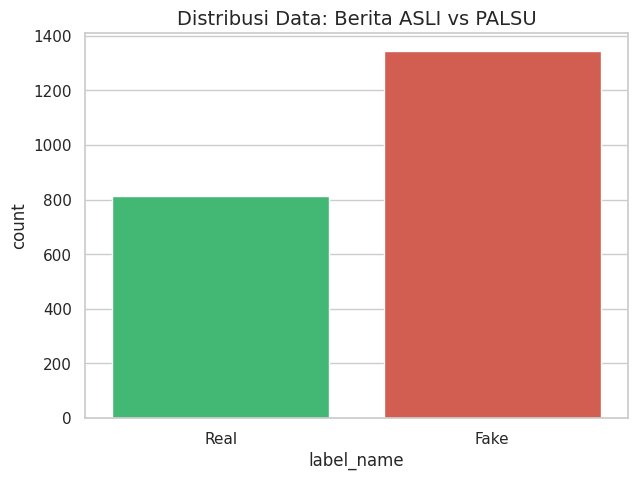

/tmp/ipython-input-3829736184.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_real, x='Freq', y='Word', ax=ax[0], palette='Greens_r')
/tmp/ipython-input-3829736184.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_fake, x='Freq', y='Word', ax=ax[1], palette='Reds_r')


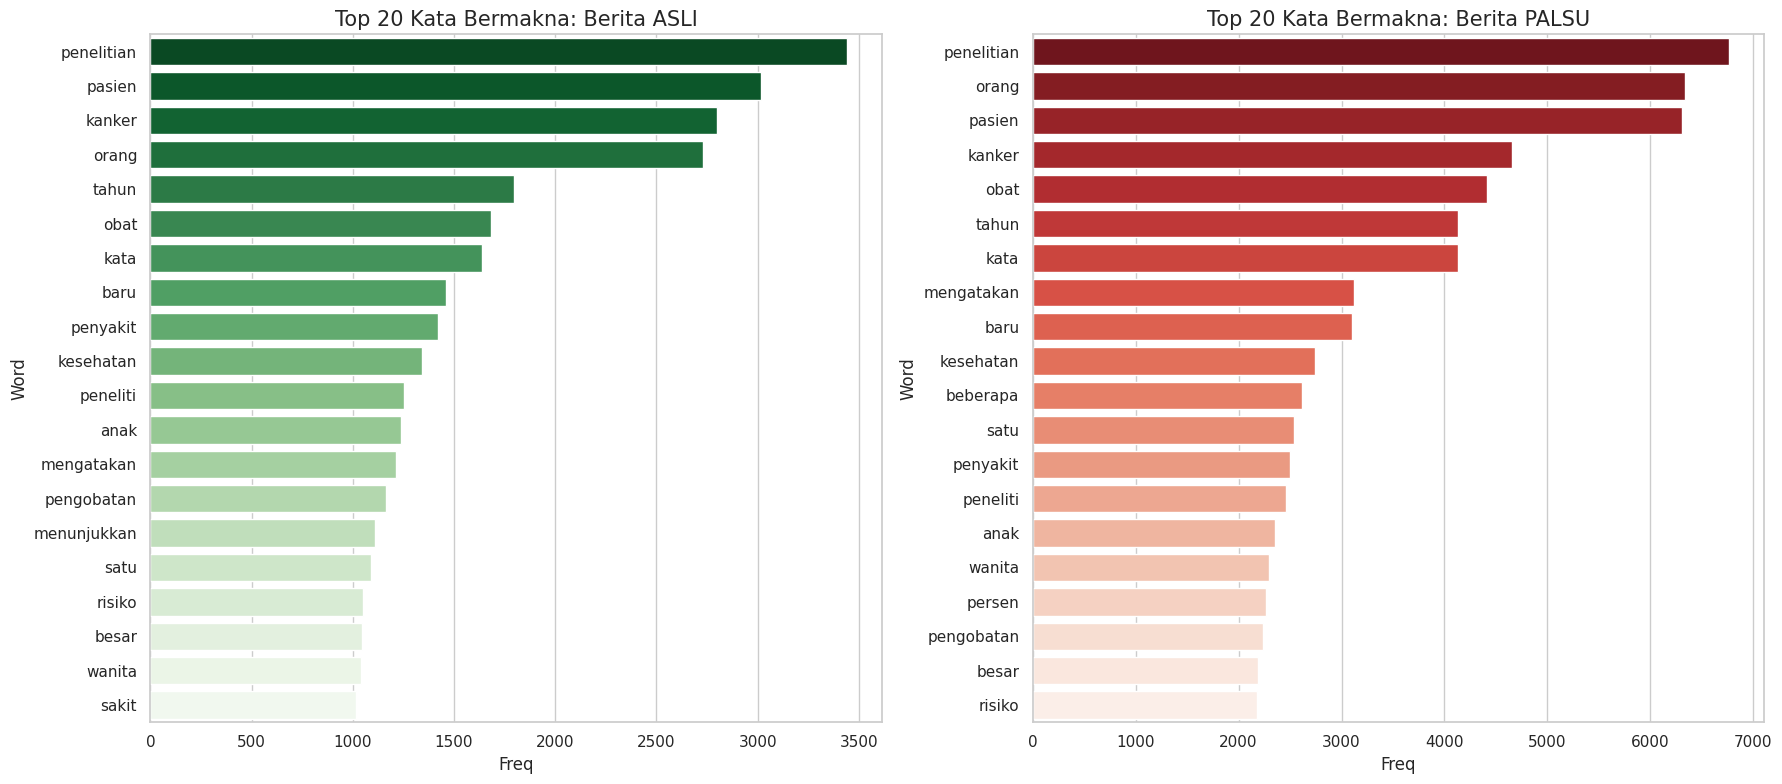

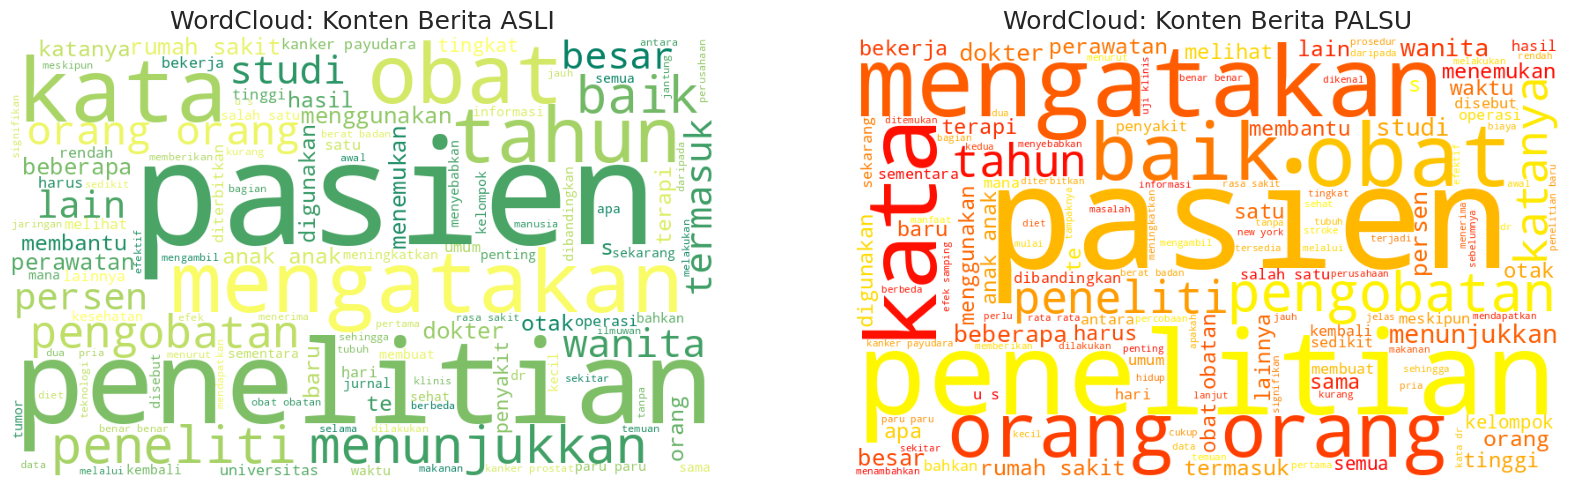

/tmp/ipython-input-3829736184.py:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label_name', y='word_count', palette=['#2ecc71', '#e74c3c'])


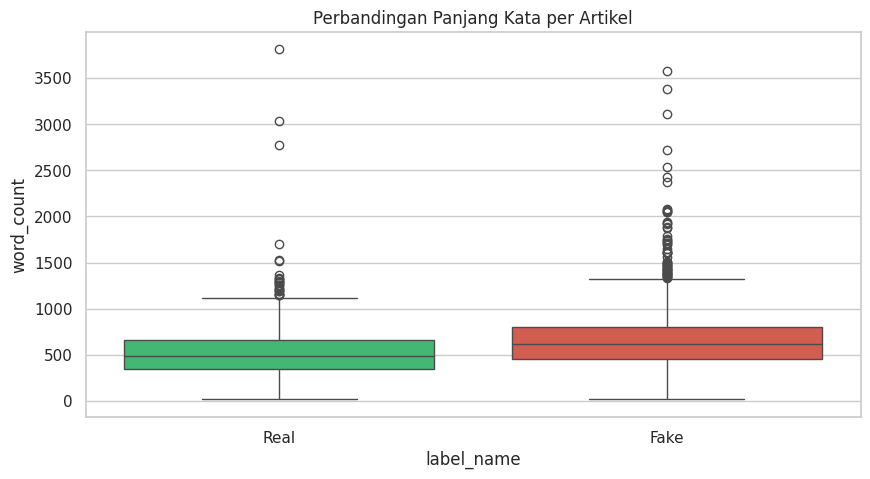


📊 RINGKASAN STATISTIK DATASET
            count    mean   max
label_name                     
Fake         1343  656.36  3580
Real          813  532.49  3810


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from collections import Counter
import re
import os

# 1. LOAD DATA
file_path = 'health_translated_id_COMPLETE.csv'

if not os.path.exists(file_path):
    print(f"❌ File {file_path} tidak ditemukan!")
else:
    df = pd.read_csv(file_path)

# 2. PENYESUAIAN LABEL & KOLOM
col_en = 'text_cleaned'
col_id = 'text_id'

if df['label'].dtype in ['int64', 'int32']:
    df['label_name'] = df['label'].map({1: 'Real', 0: 'Fake'})
else:
    df['label_name'] = df['label']

# ============================================================================
# 3. DAFTAR KATA HUBUNG & KATA TUGAS (STOPWORDS) - LEBIH LENGKAP
# ============================================================================
# Daftar ini hanya digunakan untuk FILTER VISUALISASI, bukan menghapus data asli
stopwords_id = set([
    'yang', 'untuk', 'pada', 'ke', 'dari', 'dalam', 'dengan', 'ini', 'itu', 'di',
    'dan', 'atau', 'adalah', 'akan', 'ada', 'juga', 'sudah', 'telah', 'saya',
    'bahwa', 'oleh', 'tersebut', 'bisa', 'lebih', 'karena', 'sebagai', 'namun',
    'serta', 'tetapi', 'tapi', 'maka', 'jika', 'bila', 'apabila', 'kalau', 'hanya',
    'secara', 'menjadi', 'masih', 'belum', 'pernah', 'banyak', 'setiap', 'suatu',
    'sebuah', 'ia', 'dia', 'mereka', 'kita', 'kami', 'anda', 'hal', 'paling',
    'sangat', 'sekali', 'tentang', 'hingga', 'kepada', 'terhadap', 'atas', 'bagi',
    'oleh', 'saat', 'ketika', 'setelah', 'sebelum', 'lalu', 'kemudian', 'yaitu',
    'yakni', 'ialah', 'merupakan', 'mungkin', 'ingin', 'para', 'seperti', 'begitu', 'tidak','dapat', 'memiliki'
])

# ============================================
# 4. FUNGSI PREPROCESSING KHUSUS VISUALISASI
# ============================================
def clean_text_for_viz(text):
    if pd.isna(text): return ""
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', ' ', text) # Hapus simbol/angka
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Kita buat kolom sementara hanya untuk EDA (tidak merusak data asli)
df['eda_clean_id'] = df[col_id].apply(clean_text_for_viz)

# ============================================
# VISUALISASI 1: DISTRIBUSI KELAS
# ============================================
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='label_name', palette=['#2ecc71', '#e74c3c'])
plt.title('Distribusi Data: Berita ASLI vs PALSU', fontsize=14)
plt.show()

# ============================================
# VISUALISASI 2: TOP 20 WORDS (TANPA KATA HUBUNG)
# ============================================
def get_top_n_words(corpus, n=20):
    all_words = ' '.join(corpus).split()
    # FILTER: Tidak ada di stopwords_id dan panjang kata > 3
    filtered_words = [w for w in all_words if w not in stopwords_id and len(w) > 3]
    return pd.DataFrame(Counter(filtered_words).most_common(n), columns=['Word', 'Freq'])

top_real = get_top_n_words(df[df['label_name'] == 'Real']['eda_clean_id'])
top_fake = get_top_n_words(df[df['label_name'] == 'Fake']['eda_clean_id'])

fig, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.barplot(data=top_real, x='Freq', y='Word', ax=ax[0], palette='Greens_r')
ax[0].set_title('Top 20 Kata Bermakna: Berita ASLI', fontsize=15)
sns.barplot(data=top_fake, x='Freq', y='Word', ax=ax[1], palette='Reds_r')
ax[1].set_title('Top 20 Kata Bermakna: Berita PALSU', fontsize=15)
plt.tight_layout()
plt.show()

# ============================================
# VISUALISASI 3: WORD CLOUD (TANPA KATA HUBUNG)
# ============================================
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# WordCloud Real
real_text = ' '.join(df[df['label_name'] == 'Real']['eda_clean_id'])
wc_real = WordCloud(width=800, height=500, background_color='white',
                    stopwords=stopwords_id, colormap='summer',
                    min_font_size=10).generate(real_text)
axes[0].imshow(wc_real)
axes[0].set_title('WordCloud: Konten Berita ASLI', fontsize=18)
axes[0].axis('off')

# WordCloud Fake
fake_text = ' '.join(df[df['label_name'] == 'Fake']['eda_clean_id'])
wc_fake = WordCloud(width=800, height=500, background_color='white',
                    stopwords=stopwords_id, colormap='autumn',
                    min_font_size=10).generate(fake_text)
axes[1].imshow(wc_fake)
axes[1].set_title('WordCloud: Konten Berita PALSU', fontsize=18)
axes[1].axis('off')
plt.show()

# ============================================
# VISUALISASI 4: PANJANG TEKS & RINGKASAN
# ============================================
df['word_count'] = df[col_id].str.split().str.len()
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='label_name', y='word_count', palette=['#2ecc71', '#e74c3c'])
plt.title('Perbandingan Panjang Kata per Artikel')
plt.show()

print("\n📊 RINGKASAN STATISTIK DATASET")
print(df.groupby('label_name')['word_count'].agg(['count', 'mean', 'max']).round(2))

/tmp/ipython-input-1968141539.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_real, x='Frekuensi', y='Kata', ax=ax[0], palette='Greens_r')
/tmp/ipython-input-1968141539.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_fake, x='Frekuensi', y='Kata', ax=ax[1], palette='Reds_r')


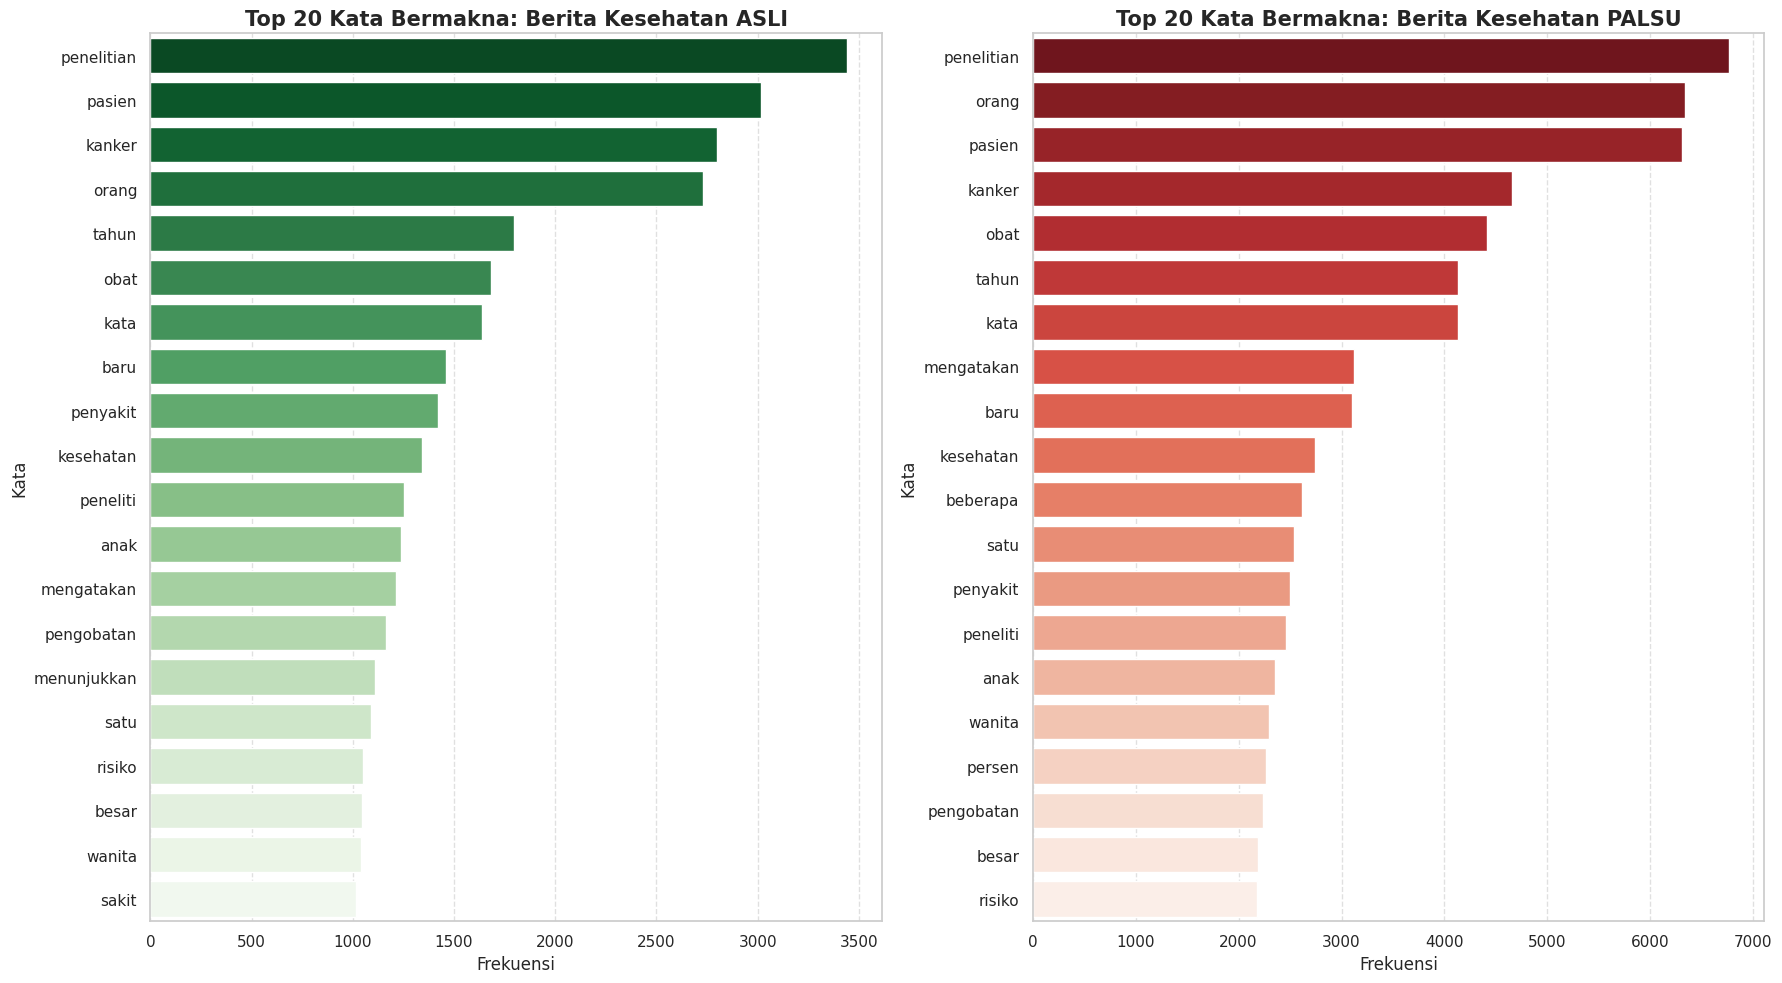


--- TABEL FREKUENSI KATA (ASLI) ---
           Kata  Frekuensi
0    penelitian       3441
1        pasien       3015
2        kanker       2797
3         orang       2731
4         tahun       1795
5          obat       1682
6          kata       1640
7          baru       1458
8      penyakit       1423
9     kesehatan       1343
10     peneliti       1253
11         anak       1236
12   mengatakan       1214
13   pengobatan       1162
14  menunjukkan       1110
15         satu       1092
16       risiko       1048
17        besar       1047
18       wanita       1040
19        sakit       1015

--- TABEL FREKUENSI KATA (PALSU) ---
          Kata  Frekuensi
0   penelitian       6766
1        orang       6341
2       pasien       6312
3       kanker       4655
4         obat       4409
5        tahun       4131
6         kata       4128
7   mengatakan       3120
8         baru       3100
9    kesehatan       2747
10    beberapa       2615
11        satu       2535
12    penyakit      

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import re

# ============================================================================
# 1. DEFINISI FILTER KATA (STOPWORDS) - UNTUK VISUALISASI
# ============================================================================
# Kita masukkan 'tidak', 'itu', 'ini', dan kata hubung lainnya di sini
stopwords_id = set([
    'yang', 'untuk', 'pada', 'ke', 'dari', 'dalam', 'dengan', 'ini', 'itu', 'di',
    'dan', 'atau', 'adalah', 'akan', 'ada', 'juga', 'sudah', 'telah', 'saya',
    'bahwa', 'oleh', 'tersebut', 'bisa', 'lebih', 'karena', 'sebagai', 'tidak',
    'bukan', 'jangan', 'namun', 'serta', 'tetapi', 'tapi', 'maka', 'jika', 'bila',
    'hanya', 'secara', 'menjadi', 'masih', 'belum', 'pernah', 'banyak', 'setiap',
    'suatu', 'sebuah', 'ia', 'dia', 'mereka', 'kita', 'kami', 'anda', 'hal',
    'paling', 'sangat', 'sekali', 'tentang', 'hingga', 'kepada', 'terhadap',
    'atas', 'bagi', 'saat', 'ketika', 'setelah', 'sebelum', 'lalu', 'kemudian',
    'yaitu', 'yakni', 'ialah', 'merupakan', 'mungkin', 'ingin', 'para', 'seperti', 'tidak', 'dapat', 'memiliki'
])

# ============================================================================
# 2. FUNGSI UNTUK MENDAPATKAN FREKUENSI KATA
# ============================================================================
def get_top_20_words(corpus):
    all_words = []
    for text in corpus:
        if pd.isna(text): continue
        # Bersihkan teks (hanya huruf, lowercase)
        text = re.sub(r'[^a-z\s]', ' ', str(text).lower())
        # Filter kata hubung & kata pendek (< 4 huruf seringkali bukan kata konten)
        words = [w for w in text.split() if w not in stopwords_id and len(w) > 3]
        all_words.extend(words)

    # Hitung 20 terbanyak
    return pd.DataFrame(Counter(all_words).most_common(20), columns=['Kata', 'Frekuensi'])

# ============================================================================
# 3. PROSES DATA & VISUALISASI
# ============================================================================
# Ambil data berdasarkan label
top_real = get_top_20_words(df[df['label_name'] == 'Real']['text_id'])
top_fake = get_top_20_words(df[df['label_name'] == 'Fake']['text_id'])

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(18, 10))

# Grafik Berita ASLI
sns.barplot(data=top_real, x='Frekuensi', y='Kata', ax=ax[0], palette='Greens_r')
ax[0].set_title('Top 20 Kata Bermakna: Berita Kesehatan ASLI', fontsize=15, fontweight='bold')
ax[0].grid(axis='x', linestyle='--', alpha=0.6)

# Grafik Berita PALSU
sns.barplot(data=top_fake, x='Frekuensi', y='Kata', ax=ax[1], palette='Reds_r')
ax[1].set_title('Top 20 Kata Bermakna: Berita Kesehatan PALSU', fontsize=15, fontweight='bold')
ax[1].grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.savefig('top_20_words_comparison.png', dpi=300)
plt.show()

# Menampilkan tabel frekuensi untuk lampiran skripsi
print("\n--- TABEL FREKUENSI KATA (ASLI) ---")
print(top_real)
print("\n--- TABEL FREKUENSI KATA (PALSU) ---")
print(top_fake)

# DATA SPLIT & DATA AUGMENTATION

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import numpy as np
import matplotlib.pyplot as plt

# 1. Load Dataset Final
df = pd.read_csv('health_id_FINAL.csv')

# 2. Split Data (70% Train, 15% Val, 15% Test)
# Kita gunakan stratify agar distribusi label tetap sama di tiap potongan
train_df, temp_df = train_test_split(
    df, test_size=0.3, random_state=42, stratify=df['label']
)

# Split sisa 30% menjadi Val (15%) dan Test (15%)
val_df, test_df = train_test_split(
    temp_df, test_size=0.5, random_state=42, stratify=temp_df['label']
)

print("=" * 60)
print("📊 UKURAN DATASET SEBELUM BALANCING")
print("=" * 60)
print(f"Train: {len(train_df)} ({len(train_df)/len(df)*100:.1f}%)")
print(f"Val:   {len(val_df)} ({len(val_df)/len(df)*100:.1f}%)")
print(f"Test:  {len(test_df)} ({len(test_df)/len(df)*100:.1f}%)")
print(f"Total: {len(df)}")

# 3. Data Augmentation Sederhana (Oversampling) pada DATA TRAIN
# Kita buat jumlah Label 1 sama dengan Label 0 di data training
train_label_0 = train_df[train_df['label'] == 0]
train_label_1 = train_df[train_df['label'] == 1]

# Hitung selisihnya
n_samples_to_add = len(train_label_0) - len(train_label_1)

# Ambil sampel tambahan dari label 1 secara acak (duplikasi kreatif)
train_label_1_augmented = train_label_1.sample(n_samples_to_add, replace=True, random_state=42)

# Gabungkan kembali
train_df_balanced = pd.concat([train_label_0, train_label_1, train_label_1_augmented])
train_df_balanced = shuffle(train_df_balanced, random_state=42)

print("\n" + "=" * 60)
print("✅ UKURAN SETELAH BALANCING (TRAIN ONLY)")
print("=" * 60)
print(f"Label 0: {len(train_df_balanced[train_df_balanced['label']==0])}")
print(f"Label 1: {len(train_df_balanced[train_df_balanced['label']==1])}")
print(f"Total Train: {len(train_df_balanced)}")

# 4. Simpan ke CSV Terpisah
train_df_balanced.to_csv('train_dataset_augmented.csv', index=False)
val_df.to_csv('val_dataset.csv', index=False)
test_df.to_csv('test_dataset.csv', index=False)

print("\n" + "=" * 60)
print("💾 FILE BERHASIL DISIMPAN")
print("=" * 60)
print("✅ train_dataset_augmented.csv")
print("✅ val_dataset.csv")
print("✅ test_dataset.csv")

📊 UKURAN DATASET SEBELUM BALANCING
Train: 1509 (70.0%)
Val:   323 (15.0%)
Test:  324 (15.0%)
Total: 2156

✅ UKURAN SETELAH BALANCING (TRAIN ONLY)
Label 0: 940
Label 1: 940
Total Train: 1880

💾 FILE BERHASIL DISIMPAN
✅ train_dataset_augmented.csv
✅ val_dataset.csv
✅ test_dataset.csv


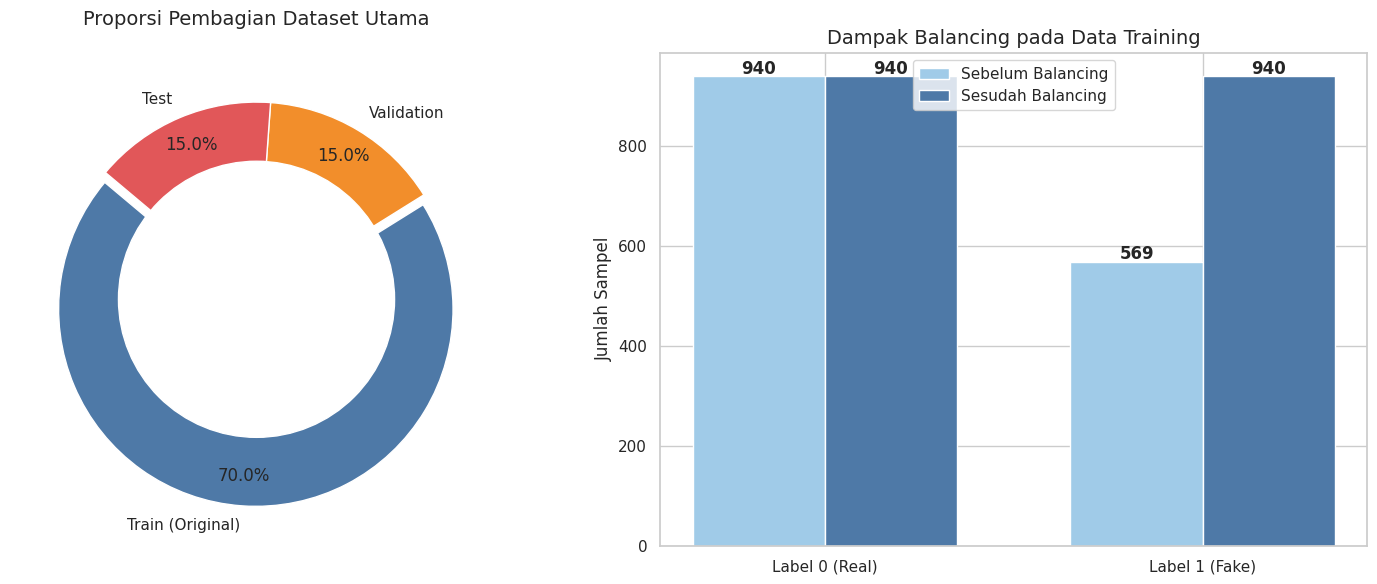

In [ ]:
import seaborn as sns

# Pengaturan gaya visualisasi
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 6))

# --- VISUALISASI 1: PROPORSI PEMBAGIAN DATA ---
plt.subplot(1, 2, 1)
split_counts = [len(train_df), len(val_df), len(test_df)]
split_labels = ['Train (Original)', 'Validation', 'Test']
colors = ['#4e79a7', '#f28e2b', '#e15759']

plt.pie(split_counts, labels=split_labels, autopct='%1.1f%%',
        startangle=140, colors=colors, pctdistance=0.85,
        explode=[0.05, 0, 0])

# Membuat lubang di tengah agar jadi Donut Chart
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Proporsi Pembagian Dataset Utama", fontsize=14, pad=20)


# --- VISUALISASI 2: PERBANDINGAN LABEL (BEFORE VS AFTER BALANCING) ---
plt.subplot(1, 2, 2)

# Data untuk plotting
labels = ['Label 0 (Real)', 'Label 1 (Fake)']
before_balancing = [len(train_label_0), len(train_label_1)]
after_balancing = [
    len(train_df_balanced[train_df_balanced['label']==0]),
    len(train_df_balanced[train_df_balanced['label']==1])
]

x = np.arange(len(labels))
width = 0.35

plt.bar(x - width/2, before_balancing, width, label='Sebelum Balancing', color='#a0cbe8')
plt.bar(x + width/2, after_balancing, width, label='Sesudah Balancing', color='#4e79a7')

plt.ylabel('Jumlah Sampel')
plt.title('Dampak Balancing pada Data Training', fontsize=14)
plt.xticks(x, labels)
plt.legend()

# Tambahkan label angka di atas bar
for i, v in enumerate(before_balancing):
    plt.text(i - width/2, v + 5, str(v), ha='center', fontweight='bold')
for i, v in enumerate(after_balancing):
    plt.text(i + width/2, v + 5, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

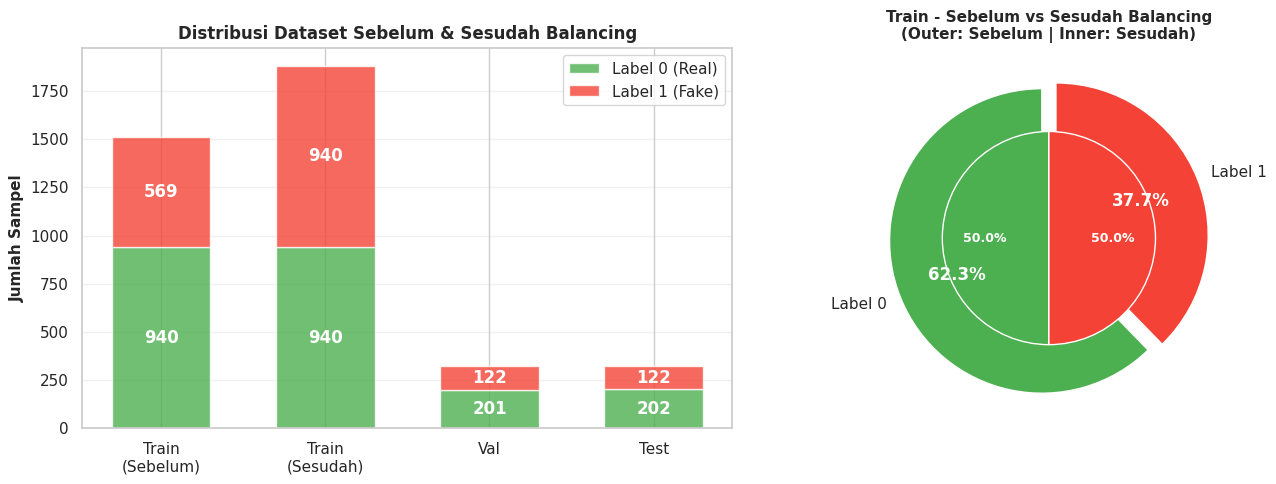


📈 RINGKASAN VISUALISASI
Peningkatan Label 1 (Train): 569 → 940 (+371 sampel)
Rasio Label 0:1 (Train Sebelum): 1.65:1
Rasio Label 0:1 (Train Sesudah): 1:1 (Balanced ✅)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data untuk visualisasi
datasets = ['Train\n(Sebelum)', 'Train\n(Sesudah)', 'Val', 'Test']
label_0 = [
    len(train_label_0),
    len(train_df_balanced[train_df_balanced['label']==0]),
    len(val_df[val_df['label']==0]),
    len(test_df[test_df['label']==0])
]
label_1 = [
    len(train_label_1),
    len(train_df_balanced[train_df_balanced['label']==1]),
    len(val_df[val_df['label']==1]),
    len(test_df[test_df['label']==1])
]

# Buat visualisasi
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Grafik 1: Stacked Bar Chart
x = np.arange(len(datasets))
width = 0.6

ax1.bar(x, label_0, width, label='Label 0 (Real)', color='#4CAF50', alpha=0.8)
ax1.bar(x, label_1, width, bottom=label_0, label='Label 1 (Fake)', color='#F44336', alpha=0.8)

ax1.set_ylabel('Jumlah Sampel', fontsize=11, fontweight='bold')
ax1.set_title('Distribusi Dataset Sebelum & Sesudah Balancing', fontsize=12, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(datasets)
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Tambahkan angka di bar
for i, (l0, l1) in enumerate(zip(label_0, label_1)):
    ax1.text(i, l0/2, str(l0), ha='center', va='center', fontweight='bold', color='white')
    ax1.text(i, l0 + l1/2, str(l1), ha='center', va='center', fontweight='bold', color='white')

# Grafik 2: Pie Chart Perbandingan
sizes_before = [len(train_label_0), len(train_label_1)]
sizes_after = [len(train_df_balanced[train_df_balanced['label']==0]),
               len(train_df_balanced[train_df_balanced['label']==1])]

ax2_left = plt.subplot(1, 2, 2)
colors = ['#4CAF50', '#F44336']

# Pie sebelum balancing
wedges1, texts1, autotexts1 = ax2_left.pie(
    sizes_before, labels=['Label 0', 'Label 1'], autopct='%1.1f%%',
    colors=colors, startangle=90, explode=(0.05, 0.05)
)
for autotext in autotexts1:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

ax2_left.set_title('Train - Sebelum vs Sesudah Balancing\n(Outer: Sebelum | Inner: Sesudah)',
                   fontsize=11, fontweight='bold')

# Pie sesudah balancing (inner)
wedges2, texts2, autotexts2 = ax2_left.pie(
    sizes_after, autopct='%1.1f%%', colors=colors,
    startangle=90, radius=0.7, textprops={'size': 9}
)
for autotext in autotexts2:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(9)

plt.tight_layout()
plt.show()

# Summary Statistics
print("\n" + "="*60)
print("📈 RINGKASAN VISUALISASI")
print("="*60)
print(f"Peningkatan Label 1 (Train): {len(train_label_1)} → {len(train_df_balanced[train_df_balanced['label']==1])} "
      f"(+{n_samples_to_add} sampel)")
print(f"Rasio Label 0:1 (Train Sebelum): {len(train_label_0)/len(train_label_1):.2f}:1")
print(f"Rasio Label 0:1 (Train Sesudah): 1:1 (Balanced ✅)")

# TOKENISASI

In [ ]:
import pandas as pd
import numpy as np
import pickle
import os
from transformers import AutoTokenizer
from tqdm import tqdm

print("="*80)
print("🔤 STEP 5: UNIFIED TOKENIZATION FOR INDOBERT & BILSTM")
print("="*80)

# 1. SETUP & LOAD TOKENIZER
MODEL_NAME = 'indobenchmark/indobert-base-p1'
print(f"\n1️⃣ Loading IndoBERT Tokenizer: {MODEL_NAME}...")
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

# 2. LOAD DATASETS
print("\n2️⃣ Loading CSV datasets...")
try:
    train_df = pd.read_csv('train_dataset_augmented.csv')
    val_df = pd.read_csv('val_dataset.csv')
    test_df = pd.read_csv('test_dataset.csv')
    print(f"✅ Data Loaded: Train({len(train_df)}), Val({len(val_df)}), Test({len(test_df)})")
except FileNotFoundError as e:
    print(f"❌ Error: {e}. Pastikan file CSV hasil split sudah ada.")
    raise

# 3. FUNGSI TOKENISASI
def tokenize_process(texts, max_length=512):
    print(f"   Tokenizing {len(texts)} samples...")
    encoded = tokenizer(
        texts.tolist(),
        max_length=max_length,
        padding='max_length',
        truncation=True,
        return_tensors='np'
    )
    return encoded['input_ids'], encoded['attention_mask']

# 4. EKSEKUSI TOKENISASI
print("\n3️⃣ Running Tokenization (Max Length: 512)...")
print("-" * 30)

# Kolom target: text_cleaned_id
text_col = 'text_cleaned_id'

print("📝 Processing Train Set...")
train_ids, train_mask = tokenize_process(train_df[text_col])

print("📝 Processing Validation Set...")
val_ids, val_mask = tokenize_process(val_df[text_col])

print("📝 Processing Test Set...")
test_ids, test_mask = tokenize_process(test_df[text_col])

# 5. SIMPAN DATA KE .NPY
print("\n4️⃣ Saving tokenized data to /content/tokenized_data/...")
os.makedirs('/content/tokenized_data', exist_ok=True)
path = '/content/tokenized_data/'

# Train
np.save(path + 'train_ids.npy', train_ids)
np.save(path + 'train_mask.npy', train_mask)
np.save(path + 'train_labels.npy', train_df['label'].values)

# Validation
np.save(path + 'val_ids.npy', val_ids)
np.save(path + 'val_mask.npy', val_mask)
np.save(path + 'val_labels.npy', val_df['label'].values)

# Test
np.save(path + 'test_ids.npy', test_ids)
np.save(path + 'test_mask.npy', test_mask)
np.save(path + 'test_labels.npy', test_df['label'].values)

# Simpan Tokenizer (Penting untuk Inference nanti)
with open(path + 'indobert_tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

print(f"\n✅ SEMUA DATA BERHASIL DISIMPAN DI {path}")

# 6. VERIFIKASI AKHIR
print("\n🔍 VERIFIKASI SHAPE:")
print(f"   Train IDs: {train_ids.shape}")
print(f"   Train Labels: {train_df['label'].values.shape}")
print(f"   Vocab Size: {tokenizer.vocab_size}")

print("\n🚀 SIAP UNTUK STEP 6: MODEL TRAINING!")

🔤 STEP 5: UNIFIED TOKENIZATION FOR INDOBERT & BILSTM

1️⃣ Loading IndoBERT Tokenizer: indobenchmark/indobert-base-p1...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]


2️⃣ Loading CSV datasets...
✅ Data Loaded: Train(1880), Val(323), Test(324)

3️⃣ Running Tokenization (Max Length: 512)...
------------------------------
📝 Processing Train Set...
   Tokenizing 1880 samples...
📝 Processing Validation Set...
   Tokenizing 323 samples...
📝 Processing Test Set...
   Tokenizing 324 samples...

4️⃣ Saving tokenized data to /content/tokenized_data/...

✅ SEMUA DATA BERHASIL DISIMPAN DI /content/tokenized_data/

🔍 VERIFIKASI SHAPE:
   Train IDs: (1880, 512)
   Train Labels: (1880,)
   Vocab Size: 30521

🚀 SIAP UNTUK STEP 6: MODEL TRAINING!


In [ ]:
import os

# Membuat folder results jika belum ada
if not os.path.exists('results'):
    os.makedirs('results')
    print("✅ Folder 'results' berhasil dibuat!")

✅ Folder 'results' berhasil dibuat!


# INDOBERT

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from transformers import TFBertModel
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils.class_weight import compute_class_weight
import gc

# 1. SETUP & MEMORY CLEANUP
keras.backend.clear_session()
gc.collect()

print("🔧 Configuring Robust Training (10 Epochs, 6 Layers Frozen, LR 2e-5)...")

# 2. LOAD & PREPARE DATA
PATH = '/content/tokenized_data/'
train_ids = np.load(PATH + 'train_ids.npy')[:, :256]
train_mask = np.load(PATH + 'train_mask.npy')[:, :256]
train_labels = np.load(PATH + 'train_labels.npy')

val_ids = np.load(PATH + 'val_ids.npy')[:, :256]
val_mask = np.load(PATH + 'val_mask.npy')[:, :256]
val_labels = np.load(PATH + 'val_labels.npy')

test_ids = np.load(PATH + 'test_ids.npy')[:, :256]
test_mask = np.load(PATH + 'test_mask.npy')[:, :256]
test_labels = np.load(PATH + 'test_labels.npy')

# 3. CALCULATE CLASS WEIGHTS
weights = compute_class_weight('balanced', classes=np.unique(train_labels), y=train_labels)
class_weights = {0: weights[0], 1: weights[1]}
print(f"⚖️ Class Weights applied: {class_weights}")

# 4. ROBUST ARCHITECTURE
class IndoBERTConnector(keras.layers.Layer):
    def __init__(self, bert_model, **kwargs):
        super().__init__(**kwargs)
        self.bert = bert_model
    def call(self, inputs):
        input_ids, attention_mask = inputs
        output = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        return output.last_hidden_state

def build_robust_indobert(learning_rate=2e-5):
    # Load Pre-trained IndoBERT
    bert_backbone = TFBertModel.from_pretrained('indobenchmark/indobert-base-p1', from_pt=True)

    # --- FREEZING STRATEGY ---
    # Membekukan 6 layer awal (0-5)
    for i in range(6):
        bert_backbone.bert.encoder.layer[i].trainable = False
        print(f"Layer {i} is now frozen.")

    # Membekukan pooler untuk menghindari gradient warning
    bert_backbone.bert.pooler.trainable = False

    # Pastikan backbone utama tetap aktif untuk layer sisa (6-11)
    bert_backbone.trainable = True

    input_ids = keras.layers.Input(shape=(256,), dtype=tf.int32, name='input_ids')
    attention_mask = keras.layers.Input(shape=(256,), dtype=tf.int32, name='attention_mask')

    # BERT Layer
    sequence_output = IndoBERTConnector(bert_backbone)([input_ids, attention_mask])
    cls_token = sequence_output[:, 0, :]

    # Robust Classification Head
    x = keras.layers.Dense(512, activation='relu')(cls_token)
    x = keras.layers.Dropout(0.5)(x)
    x = keras.layers.Dense(128, activation='relu')(x)
    x = keras.layers.Dropout(0.3)(x)
    output = keras.layers.Dense(1, activation='sigmoid')(x)

    model = keras.Model(inputs=[input_ids, attention_mask], outputs=output)
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# 5. EXECUTE TRAINING
# Menggunakan LR 2e-5 untuk mengoptimalkan layer yang tidak di-freeze
model = build_robust_indobert(learning_rate=2e-5)

# EarlyStopping dihapus sesuai permintaan
callbacks = [
    keras.callbacks.ModelCheckpoint(
        './models/indobert_robust_final.weights.h5',
        save_best_only=True,
        save_weights_only=True,
        monitor='val_loss'
    )
]

print("\n🚀 Memulai Training (10 Epochs, Batch 8)...")
history = model.fit(
    x=[train_ids, train_mask],
    y=train_labels,
    validation_data=([val_ids, val_mask], val_labels),
    epochs=10, # Diubah menjadi 10 Epoch
    batch_size=8,
    class_weight=class_weights,
    callbacks=callbacks
)

# 6. EVALUATION
print("\n📊 Evaluasi Akhir:")
test_pred_proba = model.predict([test_ids, test_mask], batch_size=8)
test_pred = (test_pred_proba >= 0.5).astype(int).flatten()

print(f"\n🎯 Accuracy: {accuracy_score(test_labels, test_pred):.4f}")
print(classification_report(test_labels, test_pred, target_names=['Real', 'Fake']))

# Simpan prediksi
if not os.path.exists('./results'): os.makedirs('./results')
np.save('./results/indobert_robust_10ep_preds.npy', test_pred_proba)
gc.collect()

🔧 Configuring Robust Training (10 Epochs, 6 Layers Frozen, LR 2e-5)...
⚖️ Class Weights applied: {0: np.float64(1.0), 1: np.float64(1.0)}


pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
All PyTorch model weights were used when initializing TFBertModel.

All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Layer 0 is now frozen.
Layer 1 is now frozen.
Layer 2 is now frozen.
Layer 3 is now frozen.
Layer 4 is now frozen.
Layer 5 is now frozen.

🚀 Memulai Training (10 Epochs, Batch 8)...
Epoch 1/10


235/235 [==============================] - ETA: 0s - loss: 0.8039 - accuracy: 0.5112

/usr/local/lib/python3.12/dist-packages/transformers/generation/tf_utils.py:465: UserWarning: `seed_generator` is deprecated and will be removed in a future version.
  warnings.warn("`seed_generator` is deprecated and will be removed in a future version.", UserWarning)


235/235 [==============================] - 174s 547ms/step - loss: 0.8039 - accuracy: 0.5112 - val_loss: 0.6772 - val_accuracy: 0.6223
Epoch 2/10
235/235 [==============================] - 109s 463ms/step - loss: 0.7293 - accuracy: 0.5128 - val_loss: 0.7386 - val_accuracy: 0.3777
Epoch 3/10
235/235 [==============================] - 108s 461ms/step - loss: 0.6866 - accuracy: 0.5787 - val_loss: 0.6920 - val_accuracy: 0.6161
Epoch 4/10
235/235 [==============================] - 108s 461ms/step - loss: 0.6076 - accuracy: 0.6846 - val_loss: 0.7927 - val_accuracy: 0.6378
Epoch 5/10
235/235 [==============================] - 108s 460ms/step - loss: 0.4112 - accuracy: 0.8420 - val_loss: 0.8121 - val_accuracy: 0.6347
Epoch 6/10
235/235 [==============================] - 108s 460ms/step - loss: 0.1766 - accuracy: 0.9415 - val_loss: 1.1921 - val_accuracy: 0.6563
Epoch 7/10
235/235 [==============================] - 108s 459ms/step - loss: 0.0980 - accuracy: 0.9654 - val_loss: 1.2220 - val_accura

1891

In [ ]:
print("\n📊 Evaluasi Akhir (Robust Model):")
test_pred_proba = model.predict([test_ids, test_mask], batch_size=8)
test_pred = (test_pred_proba >= 0.5).astype(int).flatten()

print(f"\n🎯 Accuracy: {accuracy_score(test_labels, test_pred):.4f}")
print(classification_report(test_labels, test_pred, target_names=['Real', 'Fake']))

# Simpan prediksi TEST untuk Ensemble
np.save('./results/indobert_robust_test_preds.npy', test_pred_proba)

# ✨ TAMBAHAN: Simpan prediksi TRAINING untuk Stacking Ensemble ✨
print("\n💾 Menyimpan prediksi training set untuk Stacking...")
train_pred_proba = model.predict([train_ids, train_mask], batch_size=8)
np.save('./results/indobert_robust_train_preds.npy', train_pred_proba)
print("✅ Training predictions saved: ./results/indobert_robust_train_preds.npy")

# ✨ BONUS: Simpan prediksi VALIDATION juga (opsional, untuk analisis) ✨
val_pred_proba = model.predict([val_ids, val_mask], batch_size=8)
np.save('./results/indobert_robust_val_preds.npy', val_pred_proba)
print("✅ Validation predictions saved: ./results/indobert_robust_val_preds.npy")

gc.collect()


📊 Evaluasi Akhir (Robust Model):
41/41 [==============================] - 6s 150ms/step

🎯 Accuracy: 0.6883
              precision    recall  f1-score   support

        Real       0.71      0.84      0.77       202
        Fake       0.62      0.43      0.51       122

    accuracy                           0.69       324
   macro avg       0.67      0.64      0.64       324
weighted avg       0.68      0.69      0.67       324


💾 Menyimpan prediksi training set untuk Stacking...
235/235 [==============================] - 37s 156ms/step
✅ Training predictions saved: ./results/indobert_robust_train_preds.npy
41/41 [==============================] - 6s 153ms/step
✅ Validation predictions saved: ./results/indobert_robust_val_preds.npy


1683

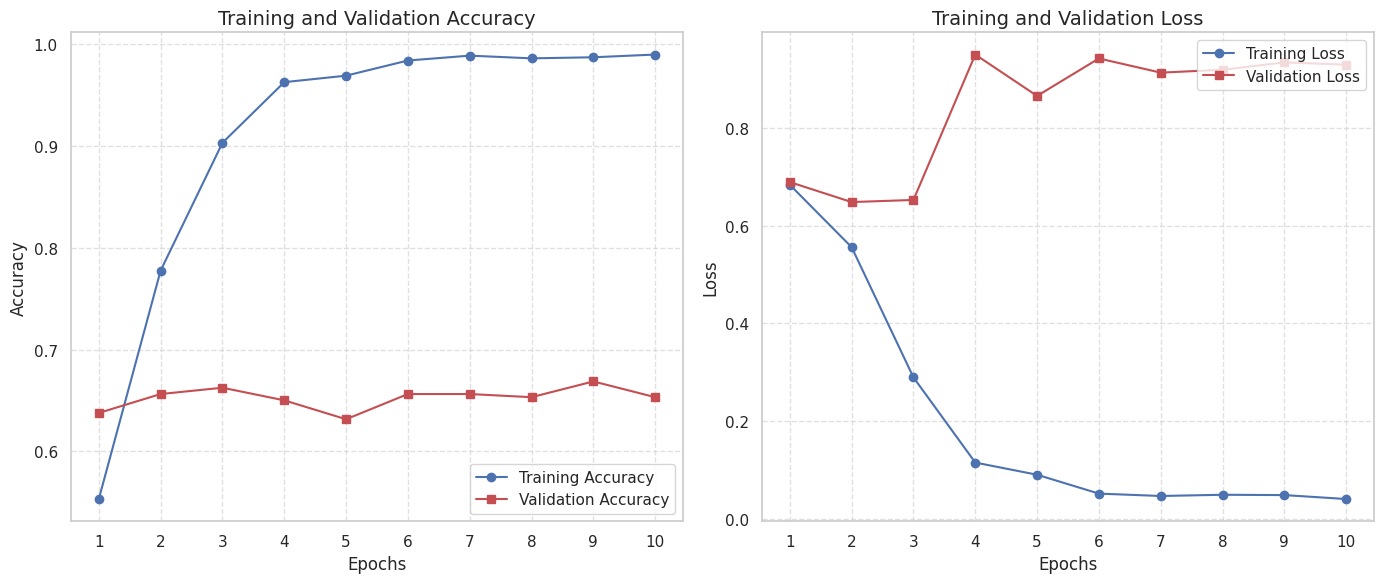

✅ Visualisasi selesai dibuat dan disimpan di folder './results/'


In [ ]:
import matplotlib.pyplot as plt

# ============================================================================
# VISUALISASI HASIL TRAINING (10 EPOCHS)
# ============================================================================

# Mengambil data dari objek history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(acc) + 1)

# Membuat Frame Gambar
plt.figure(figsize=(14, 6))

# 1. Plot Training & Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, 'b-o', label='Training Accuracy', markersize=6) # 'b-o' artinya biru, garis, dan titik
plt.plot(epochs_range, val_acc, 'r-s', label='Validation Accuracy', markersize=6) # 'r-s' artinya merah, garis, dan kotak
plt.title('Training and Validation Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(epochs_range) # Memastikan angka epoch muncul semua di sumbu X
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)

# 2. Plot Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, 'b-o', label='Training Loss', markersize=6)
plt.plot(epochs_range, val_loss, 'r-s', label='Validation Loss', markersize=6)
plt.title('Training and Validation Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.xticks(epochs_range)
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)

# Menyimpan hasil visualisasi untuk Skripsi
plt.tight_layout()
plt.savefig('./results/training_curves_indobert_10ep.png', dpi=300)
plt.show()

print("✅ Visualisasi selesai dibuat dan disimpan di folder './results/'")

✅ Visualisasi disimpan: ./results/indobert_training_visualization.png


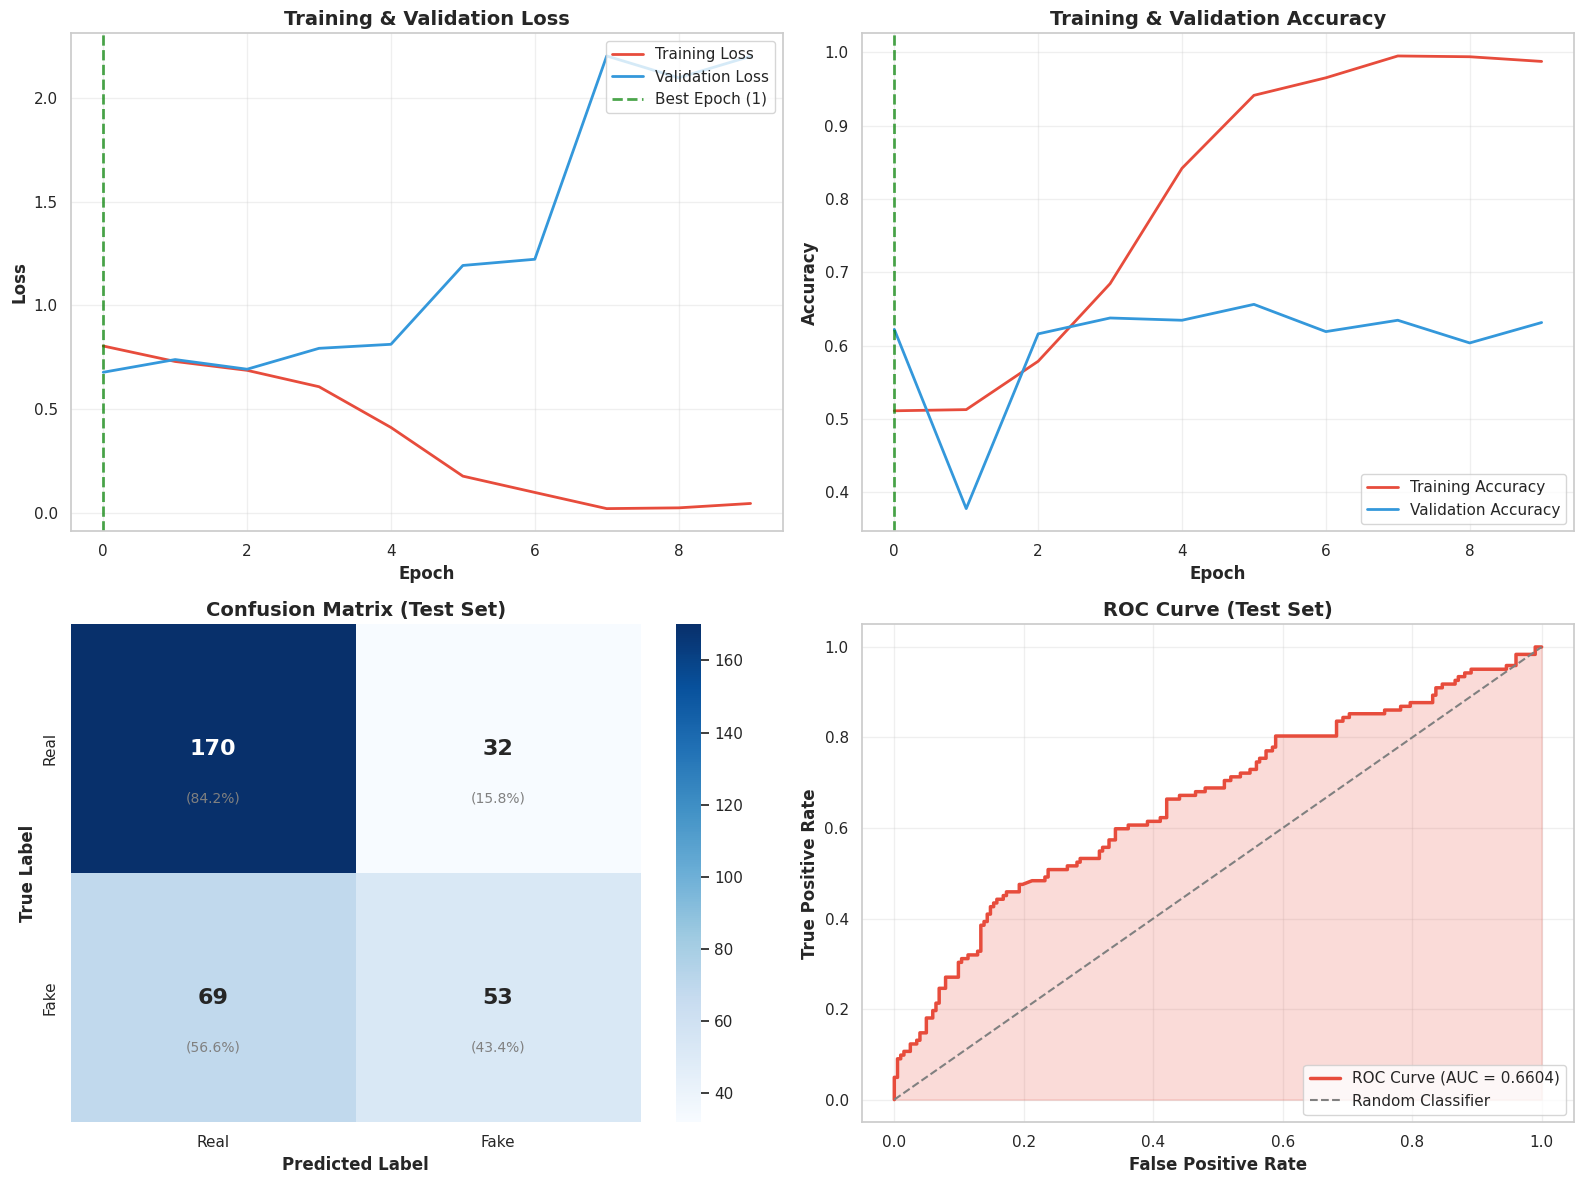


📊 RINGKASAN METRIK EVALUASI
          Metric    Value
        Accuracy 0.688272
Precision (Real) 0.711297
Precision (Fake) 0.623529
   Recall (Real) 0.841584
   Recall (Fake) 0.434426
 F1-Score (Real) 0.770975
 F1-Score (Fake) 0.512077
         AUC-ROC 0.660384
✅ Metrics disimpan: ./results/indobert_metrics_summary.csv
✅ Visualisasi distribusi disimpan: ./results/indobert_prediction_distribution.png


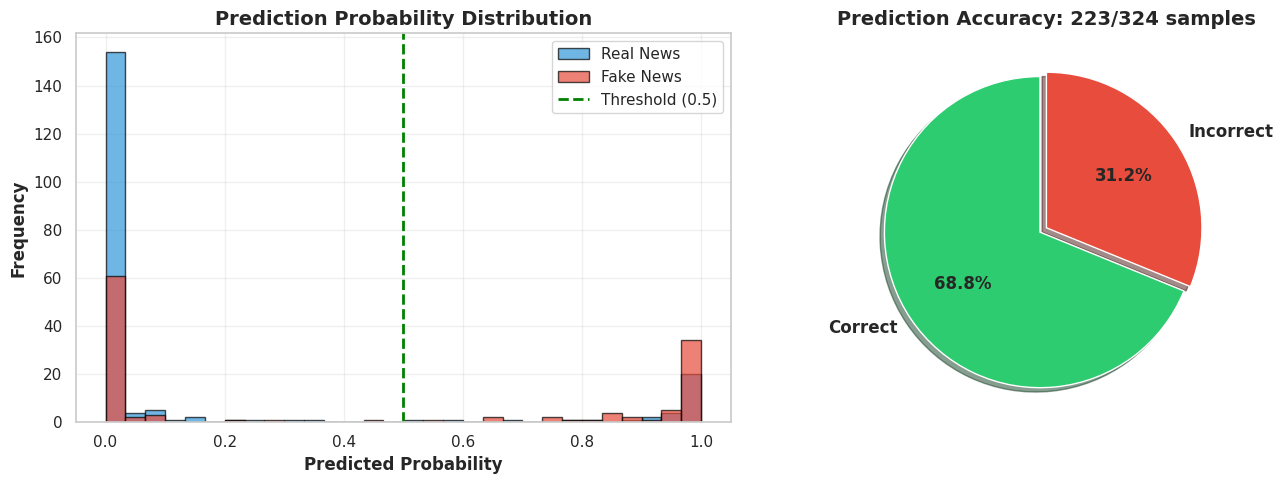


🎉 SEMUA VISUALISASI SELESAI!


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Set style untuk visualisasi
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (16, 12)

# ========== 1. TRAINING & VALIDATION CURVES ==========
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Training & Validation Loss
axes[0, 0].plot(history.history['loss'], label='Training Loss', linewidth=2, color='#e74c3c')
axes[0, 0].plot(history.history['val_loss'], label='Validation Loss', linewidth=2, color='#3498db')
axes[0, 0].set_xlabel('Epoch', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Loss', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Training & Validation Loss', fontsize=14, fontweight='bold')
axes[0, 0].legend(loc='upper right', fontsize=11)
axes[0, 0].grid(True, alpha=0.3)

# Tambahkan marker untuk best epoch
best_epoch = np.argmin(history.history['val_loss'])
axes[0, 0].axvline(x=best_epoch, color='green', linestyle='--', linewidth=2, alpha=0.7, label=f'Best Epoch ({best_epoch+1})')
axes[0, 0].legend(loc='upper right', fontsize=11)

# Plot 2: Training & Validation Accuracy
axes[0, 1].plot(history.history['accuracy'], label='Training Accuracy', linewidth=2, color='#e74c3c')
axes[0, 1].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2, color='#3498db')
axes[0, 1].set_xlabel('Epoch', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Accuracy', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Training & Validation Accuracy', fontsize=14, fontweight='bold')
axes[0, 1].legend(loc='lower right', fontsize=11)
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].axvline(x=best_epoch, color='green', linestyle='--', linewidth=2, alpha=0.7)

# Plot 3: Confusion Matrix
cm = confusion_matrix(test_labels, test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'],
            ax=axes[1, 0], annot_kws={'size': 16, 'weight': 'bold'})
axes[1, 0].set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('True Label', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Confusion Matrix (Test Set)', fontsize=14, fontweight='bold')

# Tambahkan persentase di dalam cell
for i in range(2):
    for j in range(2):
        percentage = cm[i, j] / cm[i].sum() * 100
        axes[1, 0].text(j + 0.5, i + 0.7, f'({percentage:.1f}%)',
                       ha='center', va='center', fontsize=10, color='gray')

# Plot 4: ROC Curve
fpr, tpr, thresholds = roc_curve(test_labels, test_pred_proba)
roc_auc = auc(fpr, tpr)

axes[1, 1].plot(fpr, tpr, color='#e74c3c', linewidth=2.5, label=f'ROC Curve (AUC = {roc_auc:.4f})')
axes[1, 1].plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=1.5, label='Random Classifier')
axes[1, 1].set_xlabel('False Positive Rate', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('True Positive Rate', fontsize=12, fontweight='bold')
axes[1, 1].set_title('ROC Curve (Test Set)', fontsize=14, fontweight='bold')
axes[1, 1].legend(loc='lower right', fontsize=11)
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].fill_between(fpr, tpr, alpha=0.2, color='#e74c3c')

plt.tight_layout()
plt.savefig('./results/indobert_training_visualization.png', dpi=300, bbox_inches='tight')
print("✅ Visualisasi disimpan: ./results/indobert_training_visualization.png")
plt.show()

# ========== 2. METRICS SUMMARY TABLE ==========
from sklearn.metrics import precision_score, recall_score, f1_score

print("\n" + "="*60)
print("📊 RINGKASAN METRIK EVALUASI")
print("="*60)

metrics_data = {
    'Metric': ['Accuracy', 'Precision (Real)', 'Precision (Fake)',
               'Recall (Real)', 'Recall (Fake)', 'F1-Score (Real)', 'F1-Score (Fake)', 'AUC-ROC'],
    'Value': [
        accuracy_score(test_labels, test_pred),
        precision_score(test_labels, test_pred, pos_label=0),
        precision_score(test_labels, test_pred, pos_label=1),
        recall_score(test_labels, test_pred, pos_label=0),
        recall_score(test_labels, test_pred, pos_label=1),
        f1_score(test_labels, test_pred, pos_label=0),
        f1_score(test_labels, test_pred, pos_label=1),
        roc_auc
    ]
}

metrics_df = pd.DataFrame(metrics_data)
print(metrics_df.to_string(index=False))
print("="*60)

# Simpan metrics ke CSV
metrics_df.to_csv('./results/indobert_metrics_summary.csv', index=False)
print("✅ Metrics disimpan: ./results/indobert_metrics_summary.csv")

# ========== 3. PREDICTION DISTRIBUTION ==========
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot distribusi probabilitas prediksi untuk Real vs Fake
real_probs = test_pred_proba[test_labels == 0].flatten()
fake_probs = test_pred_proba[test_labels == 1].flatten()

axes[0].hist(real_probs, bins=30, alpha=0.7, color='#3498db', edgecolor='black', label='Real News')
axes[0].hist(fake_probs, bins=30, alpha=0.7, color='#e74c3c', edgecolor='black', label='Fake News')
axes[0].axvline(x=0.5, color='green', linestyle='--', linewidth=2, label='Threshold (0.5)')
axes[0].set_xlabel('Predicted Probability', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0].set_title('Prediction Probability Distribution', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Plot persentase prediksi benar vs salah
correct = (test_pred == test_labels).sum()
incorrect = len(test_labels) - correct
labels_pie = ['Correct', 'Incorrect']
sizes = [correct, incorrect]
colors_pie = ['#2ecc71', '#e74c3c']
explode = (0.05, 0)

axes[1].pie(sizes, explode=explode, labels=labels_pie, colors=colors_pie, autopct='%1.1f%%',
            shadow=True, startangle=90, textprops={'fontsize': 12, 'weight': 'bold'})
axes[1].set_title(f'Prediction Accuracy: {correct}/{len(test_labels)} samples', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('./results/indobert_prediction_distribution.png', dpi=300, bbox_inches='tight')
print("✅ Visualisasi distribusi disimpan: ./results/indobert_prediction_distribution.png")
plt.show()

print("\n🎉 SEMUA VISUALISASI SELESAI!")
print("="*60)

# BILSTM BASELINE

In [ ]:
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils import class_weight
import matplotlib.pyplot as plt
import gc

# 1. PREPARE DATA & CLASS WEIGHTS
# Asumsi: train_ids, train_labels, val_ids, dsb. sudah dimuat di sesi Colab
print("⚖️ Calculating Class Weights...")
weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_labels),
    y=train_labels
)
class_weights = dict(enumerate(weights))
print(f"Weights: {class_weights}")

# 2. BUILD OPTIMIZED BILSTM MODEL
def build_optimized_bilstm():
    # Pastikan sesi bersih
    keras.backend.clear_session()

    inputs = keras.layers.Input(shape=(256,), dtype='int32')

    # Embedding Layer (input_dim disesuaikan dengan vocab size IndoBERT jika menggunakan token yang sama)
    x = keras.layers.Embedding(input_dim=30522, output_dim=128)(inputs)

    # Bidirectional LSTM - Menangkap konteks dari dua arah (maju & mundur)
    x = keras.layers.Bidirectional(keras.layers.LSTM(128, return_sequences=True))(x)

    # Dual Pooling Strategy untuk menangkap fitur paling menonjol (Max) dan rata-rata konteks (Avg)
    gap = keras.layers.GlobalAveragePooling1D()(x)
    gmp = keras.layers.GlobalMaxPooling1D()(x)

    # Gabungkan fitur dari kedua pooling
    concat = keras.layers.Concatenate()([gap, gmp])

    # Dense Head yang Robust
    x = keras.layers.Dense(128, activation='relu')(concat)
    x = keras.layers.BatchNormalization()(x) # Menjaga stabilitas gradien
    x = keras.layers.Dropout(0.5)(x)

    x = keras.layers.Dense(64, activation='relu')(x)
    x = keras.layers.Dropout(0.3)(x)

    # Output (Sigmoid untuk klasifikasi biner)
    outputs = keras.layers.Dense(1, activation='sigmoid')(x)

    model = keras.Model(inputs=inputs, outputs=outputs)

    # Optimizer dengan Learning Rate yang stabil
    optimizer = keras.optimizers.Adam(learning_rate=2e-4)

    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

print("\n🚀 Building Optimized BiLSTM model...")
model_bilstm = build_optimized_bilstm()
model_bilstm.summary()

# 3. TRAINING CONFIGURATION
# Update: EarlyStopping dihapus, hanya menggunakan Checkpoint dan LRScheduler
callbacks = [
    keras.callbacks.ModelCheckpoint(
        './models/bilstm_best_opt.weights.h5',
        save_best_only=True,
        save_weights_only=True,
        monitor='val_loss'
    ),
    # Strategi pencegahan kenaikan Validation Loss:
    # Jika val_loss macet dalam 2 epoch, turunkan LR sebesar 80% (factor=0.2)
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=2,
        min_lr=1e-6,
        verbose=1
    )
]

print("\n🔥 Memulai Training BiLSTM (10 Epochs)...")
history = model_bilstm.fit(
    train_ids, train_labels,
    validation_data=(val_ids, val_labels),
    epochs=10,        # Sesuai permintaan: 10 Epoch
    batch_size=8,     # Sedikit dinaikkan dari 6 ke 8 agar gradien lebih stabil
    class_weight=class_weights,
    callbacks=callbacks
)

# 4. EVALUATION
print("\n📊 Evaluating BiLSTM on Test Set...")
test_pred_proba = model_bilstm.predict(test_ids, batch_size=8)
test_pred = (test_pred_proba >= 0.5).astype(int).flatten()

print(f"\n✅ BiLSTM Accuracy: {accuracy_score(test_labels, test_pred):.4f}")
print("\n📋 Classification Report:")
print(classification_report(test_labels, test_pred, target_names=['Real', 'Fake']))

# Simpan hasil untuk keperluan Ensemble
if not os.path.exists('./results'): os.makedirs('./results')
np.save('./results/bilstm_test_preds.npy', test_pred_proba)

print("\n💾 Prediksi berhasil disimpan di ./results/bilstm_test_preds.npy")
gc.collect()

⚖️ Calculating Class Weights...
Weights: {0: np.float64(1.0), 1: np.float64(1.0)}

🚀 Building Optimized BiLSTM model...
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256)]                0         []                            
                                                                                                  
 embedding (Embedding)       (None, 256, 128)             3906816   ['input_1[0][0]']             
                                                                                                  
 bidirectional (Bidirection  (None, 256, 256)             263168    ['embedding[0][0]']           
 al)                                                                                              
                                                                         

22651

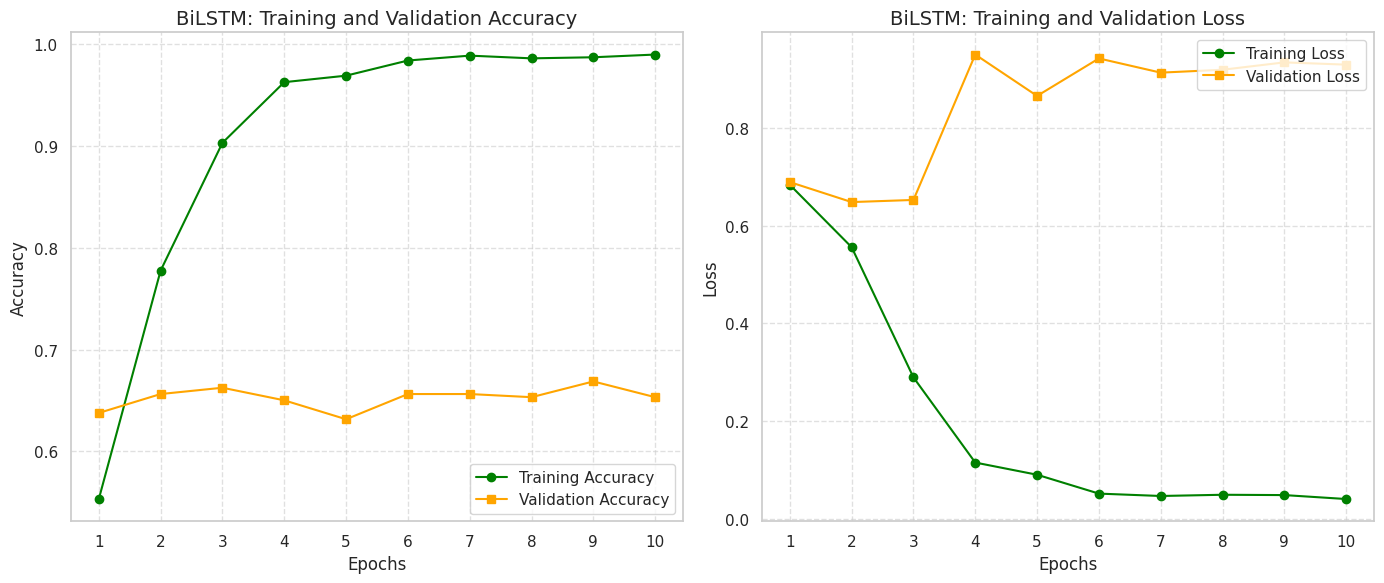

✅ Visualisasi BiLSTM diperbaiki dan disimpan di './results/training_curves_bilstm_10ep_fixed.png'


In [ ]:
import matplotlib.pyplot as plt

# ============================================================================
# VISUALISASI HASIL TRAINING BILSTM (FIXED VERSION)
# ============================================================================

acc_lstm = history.history['accuracy']
val_acc_lstm = history.history['val_accuracy']
loss_lstm = history.history['loss']
val_loss_lstm = history.history['val_loss']
epochs_range = range(1, len(acc_lstm) + 1)

plt.figure(figsize=(14, 6))

# 1. Plot Training & Validation Accuracy
plt.subplot(1, 2, 1)
# Menggunakan parameter terpisah (color, marker, linestyle) agar tidak error
plt.plot(epochs_range, acc_lstm, color='green', marker='o', linestyle='-', label='Training Accuracy', markersize=6)
plt.plot(epochs_range, val_acc_lstm, color='orange', marker='s', linestyle='-', label='Validation Accuracy', markersize=6)

plt.title('BiLSTM: Training and Validation Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(epochs_range)
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)

# 2. Plot Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_lstm, color='green', marker='o', linestyle='-', label='Training Loss', markersize=6)
plt.plot(epochs_range, val_loss_lstm, color='orange', marker='s', linestyle='-', label='Validation Loss', markersize=6)

plt.title('BiLSTM: Training and Validation Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.xticks(epochs_range)
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.savefig('./results/training_curves_bilstm_10ep_fixed.png', dpi=300)
plt.show()

print("✅ Visualisasi BiLSTM diperbaiki dan disimpan di './results/training_curves_bilstm_10ep_fixed.png'")


5️ Generating predictions on Training Set...
59/59 [==============================] - 1s 11ms/step

✅ BiLSTM Training Accuracy: 0.9989
💾 Saved training predictions to './results/bilstm_train_preds.npy'

6️⃣ Plotting Training History...


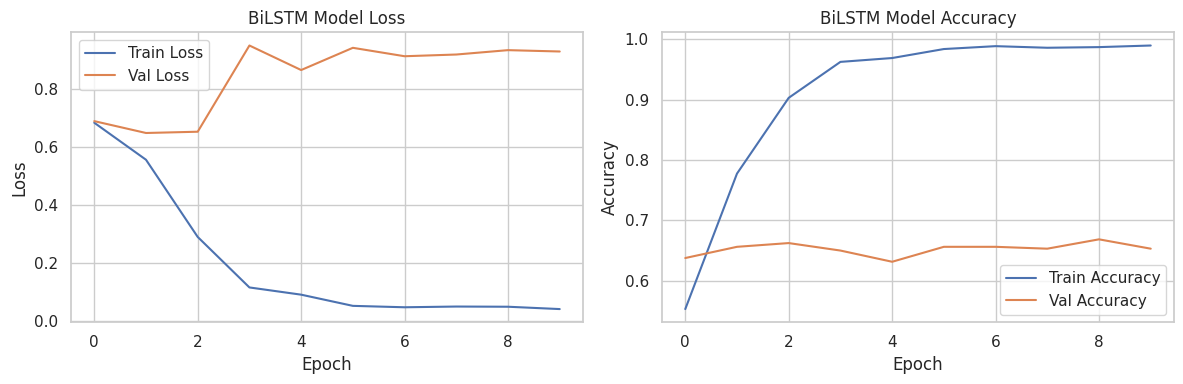

📊 Training history plot saved to './results/bilstm_training_history.png'

7️⃣ Verifying saved files...
✅ ./results/bilstm_test_preds.npy exists (1.39 KB)
✅ ./results/bilstm_train_preds.npy exists (7.47 KB)
✅ ./models/bilstm_best_opt.weights.h5 exists (49798.06 KB)

 BiLSTM Training Complete! Ready for ensemble.


In [ ]:
print("\n5️ Generating predictions on Training Set...")
train_pred_proba = model_bilstm.predict(train_ids)
train_pred = (train_pred_proba >= 0.5).astype(int).flatten()

print(f"\n✅ BiLSTM Training Accuracy: {accuracy_score(train_labels, train_pred):.4f}")

# Simpan prediksi probabilitas training untuk Ensemble
np.save('./results/bilstm_train_preds.npy', train_pred_proba)
print("💾 Saved training predictions to './results/bilstm_train_preds.npy'")

gc.collect()

print("\n6️⃣ Plotting Training History...")
plt.figure(figsize=(12, 4))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('BiLSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('BiLSTM Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('./results/bilstm_training_history.png', dpi=300, bbox_inches='tight')
plt.show()
print("📊 Training history plot saved to './results/bilstm_training_history.png'")

# 7. VERIFIKASI FILE YANG TERSIMPAN
print("\n7️⃣ Verifying saved files...")
files_to_check = [
    './results/bilstm_test_preds.npy',
    './results/bilstm_train_preds.npy',
    './models/bilstm_best_opt.weights.h5'
]

for file_path in files_to_check:
    if os.path.exists(file_path):
        size = os.path.getsize(file_path) / 1024  # KB
        print(f"✅ {file_path} exists ({size:.2f} KB)")
    else:
        print(f" {file_path} NOT FOUND!")

print("\n BiLSTM Training Complete! Ready for ensemble.")


6️⃣ Creating Comprehensive Visualizations...
✅ Visualisasi disimpan: ./results/bilstm_training_visualization.png


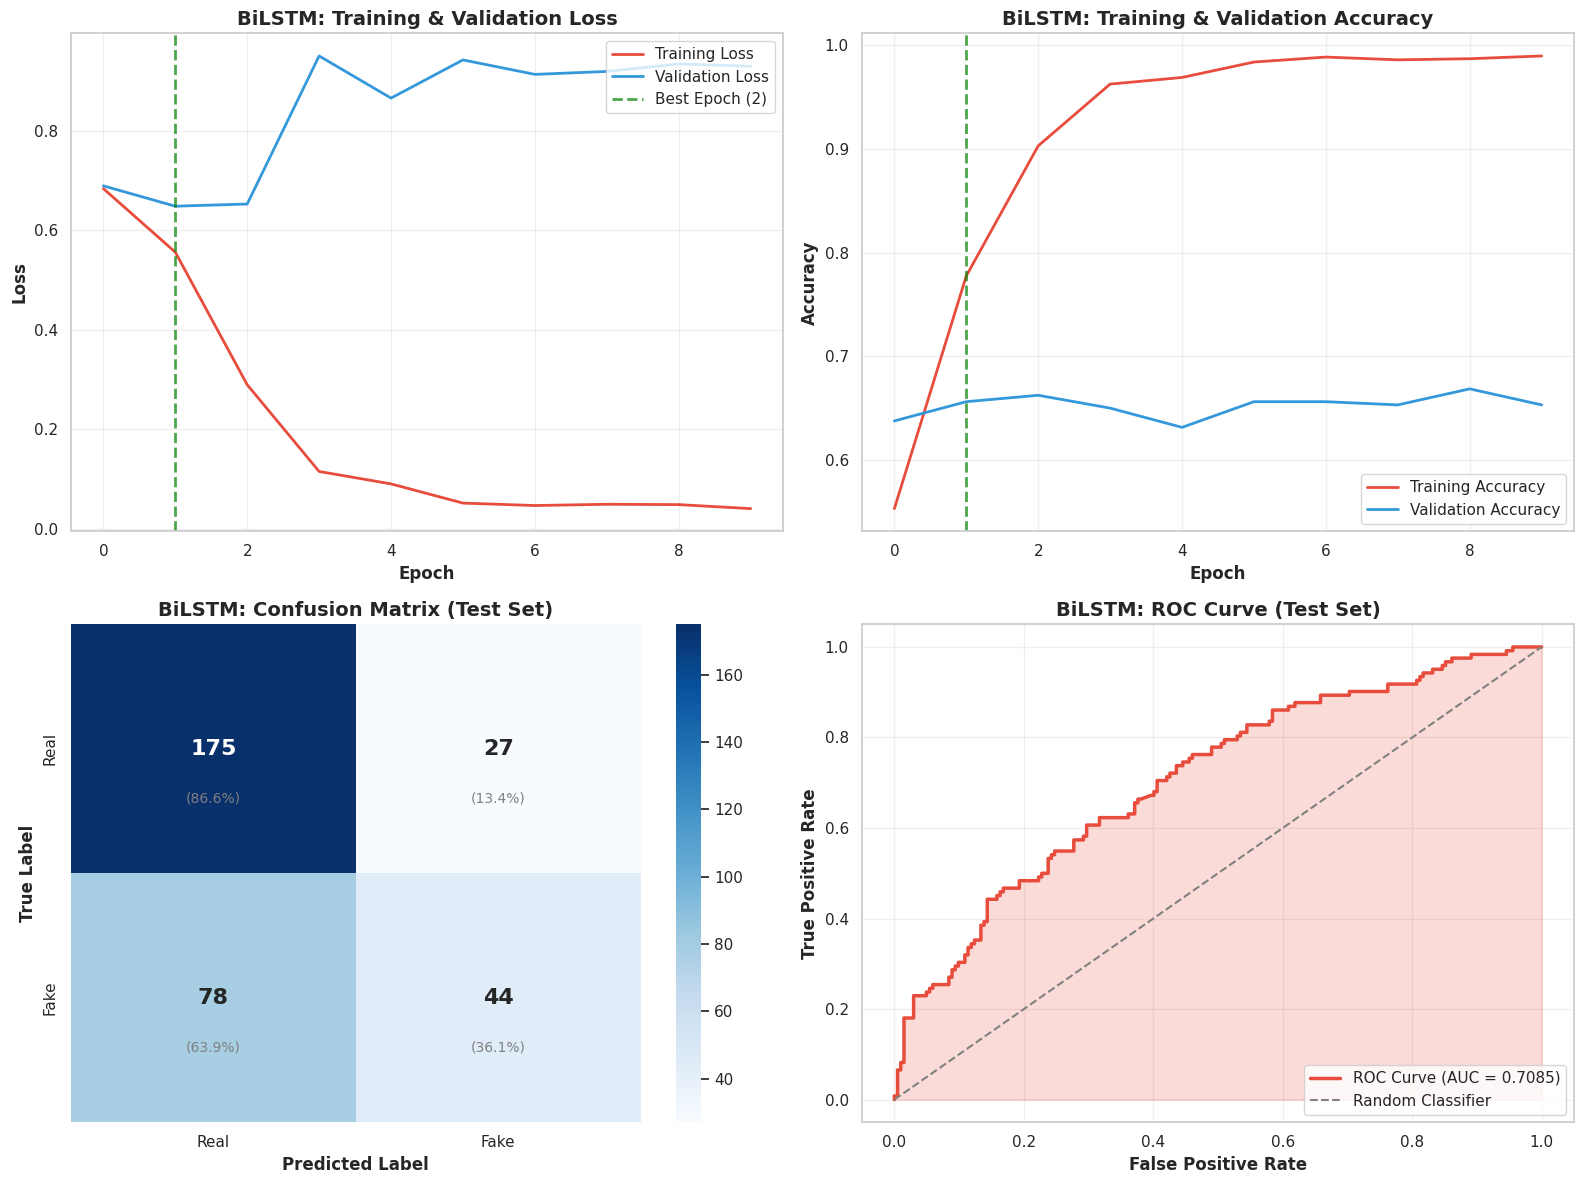


📊 RINGKASAN METRIK EVALUASI BiLSTM
          Metric    Value
        Accuracy 0.675926
Precision (Real) 0.691700
Precision (Fake) 0.619718
   Recall (Real) 0.866337
   Recall (Fake) 0.360656
 F1-Score (Real) 0.769231
 F1-Score (Fake) 0.455959
         AUC-ROC 0.708509
✅ Metrics disimpan: ./results/bilstm_metrics_summary.csv
✅ Visualisasi distribusi disimpan: ./results/bilstm_prediction_distribution.png


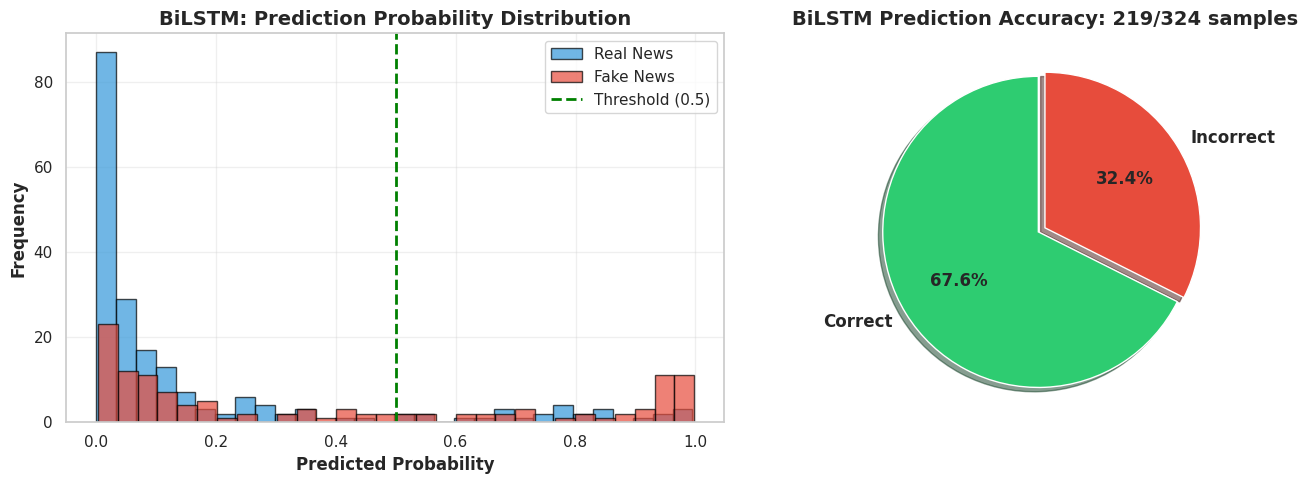


7️⃣ Verifying saved files...
✅ ./results/bilstm_test_preds.npy exists (1.39 KB)
✅ ./results/bilstm_train_preds.npy exists (7.47 KB)
✅ ./models/bilstm_best_opt.weights.h5 exists (49798.06 KB)
✅ ./results/bilstm_training_visualization.png exists (526.09 KB)
✅ ./results/bilstm_metrics_summary.csv exists (0.27 KB)
✅ ./results/bilstm_prediction_distribution.png exists (223.35 KB)

🎉 SEMUA VISUALISASI BiLSTM SELESAI!
✨ BiLSTM Training Complete! Ready for ensemble.


In [ ]:
# ========== 6. VISUALISASI LENGKAP ==========
print("\n6️⃣ Creating Comprehensive Visualizations...")

# Set style untuk visualisasi
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (16, 12)

# ========== VISUALISASI 1: Training & Validation Curves + CM + ROC ==========
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Training & Validation Loss
axes[0, 0].plot(history.history['loss'], label='Training Loss', linewidth=2, color='#e74c3c')
axes[0, 0].plot(history.history['val_loss'], label='Validation Loss', linewidth=2, color='#3498db')
axes[0, 0].set_xlabel('Epoch', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Loss', fontsize=12, fontweight='bold')
axes[0, 0].set_title('BiLSTM: Training & Validation Loss', fontsize=14, fontweight='bold')
axes[0, 0].legend(loc='upper right', fontsize=11)
axes[0, 0].grid(True, alpha=0.3)

# Tambahkan marker untuk best epoch
best_epoch = np.argmin(history.history['val_loss'])
axes[0, 0].axvline(x=best_epoch, color='green', linestyle='--', linewidth=2, alpha=0.7,
                   label=f'Best Epoch ({best_epoch+1})')
axes[0, 0].legend(loc='upper right', fontsize=11)

# Plot 2: Training & Validation Accuracy
axes[0, 1].plot(history.history['accuracy'], label='Training Accuracy', linewidth=2, color='#e74c3c')
axes[0, 1].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2, color='#3498db')
axes[0, 1].set_xlabel('Epoch', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Accuracy', fontsize=12, fontweight='bold')
axes[0, 1].set_title('BiLSTM: Training & Validation Accuracy', fontsize=14, fontweight='bold')
axes[0, 1].legend(loc='lower right', fontsize=11)
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].axvline(x=best_epoch, color='green', linestyle='--', linewidth=2, alpha=0.7)

# Plot 3: Confusion Matrix
cm = confusion_matrix(test_labels, test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'],
            ax=axes[1, 0], annot_kws={'size': 16, 'weight': 'bold'})
axes[1, 0].set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('True Label', fontsize=12, fontweight='bold')
axes[1, 0].set_title('BiLSTM: Confusion Matrix (Test Set)', fontsize=14, fontweight='bold')

# Tambahkan persentase di dalam cell
for i in range(2):
    for j in range(2):
        percentage = cm[i, j] / cm[i].sum() * 100
        axes[1, 0].text(j + 0.5, i + 0.7, f'({percentage:.1f}%)',
                       ha='center', va='center', fontsize=10, color='gray')

# Plot 4: ROC Curve
fpr, tpr, thresholds = roc_curve(test_labels, test_pred_proba)
roc_auc = auc(fpr, tpr)

axes[1, 1].plot(fpr, tpr, color='#e74c3c', linewidth=2.5, label=f'ROC Curve (AUC = {roc_auc:.4f})')
axes[1, 1].plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=1.5, label='Random Classifier')
axes[1, 1].set_xlabel('False Positive Rate', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('True Positive Rate', fontsize=12, fontweight='bold')
axes[1, 1].set_title('BiLSTM: ROC Curve (Test Set)', fontsize=14, fontweight='bold')
axes[1, 1].legend(loc='lower right', fontsize=11)
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].fill_between(fpr, tpr, alpha=0.2, color='#e74c3c')

plt.tight_layout()
plt.savefig('./results/bilstm_training_visualization.png', dpi=300, bbox_inches='tight')
print("✅ Visualisasi disimpan: ./results/bilstm_training_visualization.png")
plt.show()

# ========== VISUALISASI 2: Metrics Summary Table ==========
print("\n" + "="*60)
print("📊 RINGKASAN METRIK EVALUASI BiLSTM")
print("="*60)

metrics_data = {
    'Metric': ['Accuracy', 'Precision (Real)', 'Precision (Fake)',
               'Recall (Real)', 'Recall (Fake)', 'F1-Score (Real)', 'F1-Score (Fake)', 'AUC-ROC'],
    'Value': [
        accuracy_score(test_labels, test_pred),
        precision_score(test_labels, test_pred, pos_label=0),
        precision_score(test_labels, test_pred, pos_label=1),
        recall_score(test_labels, test_pred, pos_label=0),
        recall_score(test_labels, test_pred, pos_label=1),
        f1_score(test_labels, test_pred, pos_label=0),
        f1_score(test_labels, test_pred, pos_label=1),
        roc_auc
    ]
}

metrics_df = pd.DataFrame(metrics_data)
print(metrics_df.to_string(index=False))
print("="*60)

# Simpan metrics ke CSV
metrics_df.to_csv('./results/bilstm_metrics_summary.csv', index=False)
print("✅ Metrics disimpan: ./results/bilstm_metrics_summary.csv")

# ========== VISUALISASI 3: Prediction Distribution ==========
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot distribusi probabilitas prediksi untuk Real vs Fake
real_probs = test_pred_proba[test_labels == 0].flatten()
fake_probs = test_pred_proba[test_labels == 1].flatten()

axes[0].hist(real_probs, bins=30, alpha=0.7, color='#3498db', edgecolor='black', label='Real News')
axes[0].hist(fake_probs, bins=30, alpha=0.7, color='#e74c3c', edgecolor='black', label='Fake News')
axes[0].axvline(x=0.5, color='green', linestyle='--', linewidth=2, label='Threshold (0.5)')
axes[0].set_xlabel('Predicted Probability', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0].set_title('BiLSTM: Prediction Probability Distribution', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Plot persentase prediksi benar vs salah
correct = (test_pred == test_labels).sum()
incorrect = len(test_labels) - correct
labels_pie = ['Correct', 'Incorrect']
sizes = [correct, incorrect]
colors_pie = ['#2ecc71', '#e74c3c']
explode = (0.05, 0)

axes[1].pie(sizes, explode=explode, labels=labels_pie, colors=colors_pie, autopct='%1.1f%%',
            shadow=True, startangle=90, textprops={'fontsize': 12, 'weight': 'bold'})
axes[1].set_title(f'BiLSTM Prediction Accuracy: {correct}/{len(test_labels)} samples',
                 fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('./results/bilstm_prediction_distribution.png', dpi=300, bbox_inches='tight')
print("✅ Visualisasi distribusi disimpan: ./results/bilstm_prediction_distribution.png")
plt.show()

# ========== 7. VERIFIKASI FILE YANG TERSIMPAN ==========
print("\n7️⃣ Verifying saved files...")
files_to_check = [
    './results/bilstm_test_preds.npy',
    './results/bilstm_train_preds.npy',
    './models/bilstm_best_opt.weights.h5',
    './results/bilstm_training_visualization.png',
    './results/bilstm_metrics_summary.csv',
    './results/bilstm_prediction_distribution.png'
]

for file_path in files_to_check:
    if os.path.exists(file_path):
        size = os.path.getsize(file_path) / 1024  # KB
        print(f"✅ {file_path} exists ({size:.2f} KB)")
    else:
        print(f"❌ {file_path} NOT FOUND!")

print("\n🎉 SEMUA VISUALISASI BiLSTM SELESAI!")
print("="*60)
print("✨ BiLSTM Training Complete! Ready for ensemble.")

# ENSEMBLE WEIGHTED AVG

🔗 STEP 7: HYBRID ENSEMBLE (INDOBERT + BILSTM)
✅ Berhasil memuat prediksi dari kedua model.

🔍 Mencari kombinasi bobot terbaik...
   Bobot IndoBERT: 0.0 | Bobot BiLSTM: 1.0 -> Accuracy: 0.6759
   Bobot IndoBERT: 0.1 | Bobot BiLSTM: 0.9 -> Accuracy: 0.6821
   Bobot IndoBERT: 0.2 | Bobot BiLSTM: 0.8 -> Accuracy: 0.6821
   Bobot IndoBERT: 0.3 | Bobot BiLSTM: 0.7 -> Accuracy: 0.6759
   Bobot IndoBERT: 0.4 | Bobot BiLSTM: 0.6 -> Accuracy: 0.6728
   Bobot IndoBERT: 0.5 | Bobot BiLSTM: 0.5 -> Accuracy: 0.6821
   Bobot IndoBERT: 0.6 | Bobot BiLSTM: 0.4 -> Accuracy: 0.6852
   Bobot IndoBERT: 0.7 | Bobot BiLSTM: 0.3 -> Accuracy: 0.6883
   Bobot IndoBERT: 0.8 | Bobot BiLSTM: 0.2 -> Accuracy: 0.6883
   Bobot IndoBERT: 0.9 | Bobot BiLSTM: 0.1 -> Accuracy: 0.6883
   Bobot IndoBERT: 1.0 | Bobot BiLSTM: 0.0 -> Accuracy: 0.6883

🏆 Bobot Terbaik: IndoBERT (0.7), BiLSTM (0.3)

📊 HASIL AKHIR ENSEMBLE
🎯 Final Accuracy: 0.6883

📋 Classification Report:
              precision    recall  f1-score   support

 

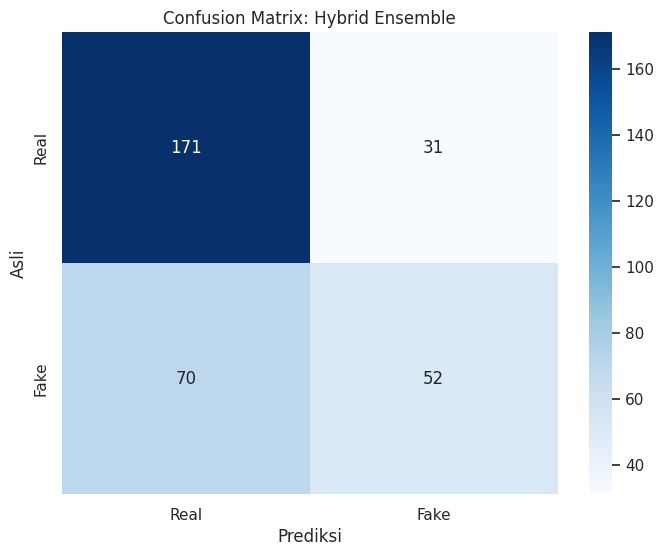

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("="*80)
print("🔗 STEP 7: HYBRID ENSEMBLE (INDOBERT + BILSTM)")
print("="*80)

# 1. LOAD PREDIKSI PROBABILITAS (Hasil dari Step 6A dan 6B)
try:
    # Pastikan file ini sudah disimpan di step sebelumnya
    bert_probs = np.load('./results/indobert_robust_test_preds.npy')
    lstm_probs = np.load('./results/bilstm_test_preds.npy')

    # Load Label asli untuk evaluasi
    test_labels = np.load('/content/tokenized_data/test_labels.npy')

    print("✅ Berhasil memuat prediksi dari kedua model.")
except FileNotFoundError:
    print("❌ Error: File prediksi .npy tidak ditemukan. Pastikan Step 6A dan 6B sudah dijalankan sampai selesai.")
    raise

# 2. MENCARI BOBOT OPTIMAL (Simple Grid Search)
best_weight = 0
max_acc = 0

print("\n🔍 Mencari kombinasi bobot terbaik...")
for i in np.arange(0, 1.1, 0.1):
    w1 = i
    w2 = 1 - i
    # Gabungkan probabilitas
    ensemble_probs = (w1 * bert_probs) + (w2 * lstm_probs)
    ensemble_preds = (ensemble_probs >= 0.5).astype(int).flatten()

    acc = accuracy_score(test_labels, ensemble_preds)
    if acc > max_acc:
        max_acc = acc
        best_weight = w1
    print(f"   Bobot IndoBERT: {w1:.1f} | Bobot BiLSTM: {w2:.1f} -> Accuracy: {acc:.4f}")

# 3. EVALUASI AKHIR ENSEMBLE DENGAN BOBOT TERBAIK
w1 = best_weight
w2 = 1 - best_weight
print(f"\n🏆 Bobot Terbaik: IndoBERT ({w1:.1f}), BiLSTM ({w2:.1f})")

final_probs = (w1 * bert_probs) + (w2 * lstm_probs)
final_preds = (final_probs >= 0.5).astype(int).flatten()

print("\n" + "="*30)
print("📊 HASIL AKHIR ENSEMBLE")
print("="*30)
print(f"🎯 Final Accuracy: {accuracy_score(test_labels, final_preds):.4f}")
print("\n📋 Classification Report:")
print(classification_report(test_labels, final_preds, target_names=['Real', 'Fake']))

# 4. VISUALISASI CONFUSION MATRIX
cm = confusion_matrix(test_labels, final_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Prediksi')
plt.ylabel('Asli')
plt.title('Confusion Matrix: Hybrid Ensemble')
plt.show()

🔗 STEP 7: HYBRID ENSEMBLE (INDOBERT + BILSTM)
✅ Berhasil memuat prediksi dari kedua model.
   - IndoBERT predictions shape: (324, 1)
   - BiLSTM predictions shape: (324, 1)
   - Test labels shape: (324,)

🔍 Mencari kombinasi bobot terbaik...
------------------------------------------------------------
   Bobot IndoBERT: 0.0 | Bobot BiLSTM: 1.0 -> Accuracy: 0.6759
   Bobot IndoBERT: 0.1 | Bobot BiLSTM: 0.9 -> Accuracy: 0.6821
   Bobot IndoBERT: 0.2 | Bobot BiLSTM: 0.8 -> Accuracy: 0.6821
   Bobot IndoBERT: 0.3 | Bobot BiLSTM: 0.7 -> Accuracy: 0.6759
   Bobot IndoBERT: 0.4 | Bobot BiLSTM: 0.6 -> Accuracy: 0.6728
   Bobot IndoBERT: 0.5 | Bobot BiLSTM: 0.5 -> Accuracy: 0.6821
   Bobot IndoBERT: 0.6 | Bobot BiLSTM: 0.4 -> Accuracy: 0.6852
   Bobot IndoBERT: 0.7 | Bobot BiLSTM: 0.3 -> Accuracy: 0.6883
   Bobot IndoBERT: 0.8 | Bobot BiLSTM: 0.2 -> Accuracy: 0.6883
   Bobot IndoBERT: 0.9 | Bobot BiLSTM: 0.1 -> Accuracy: 0.6883
   Bobot IndoBERT: 1.0 | Bobot BiLSTM: 0.0 -> Accuracy: 0.6883
----

/tmp/ipython-input-959131672.py:236: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.savefig('./results/ensemble_comprehensive_visualization.png', dpi=300, bbox_inches='tight')


✅ Main visualization saved: ./results/ensemble_comprehensive_visualization.png


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


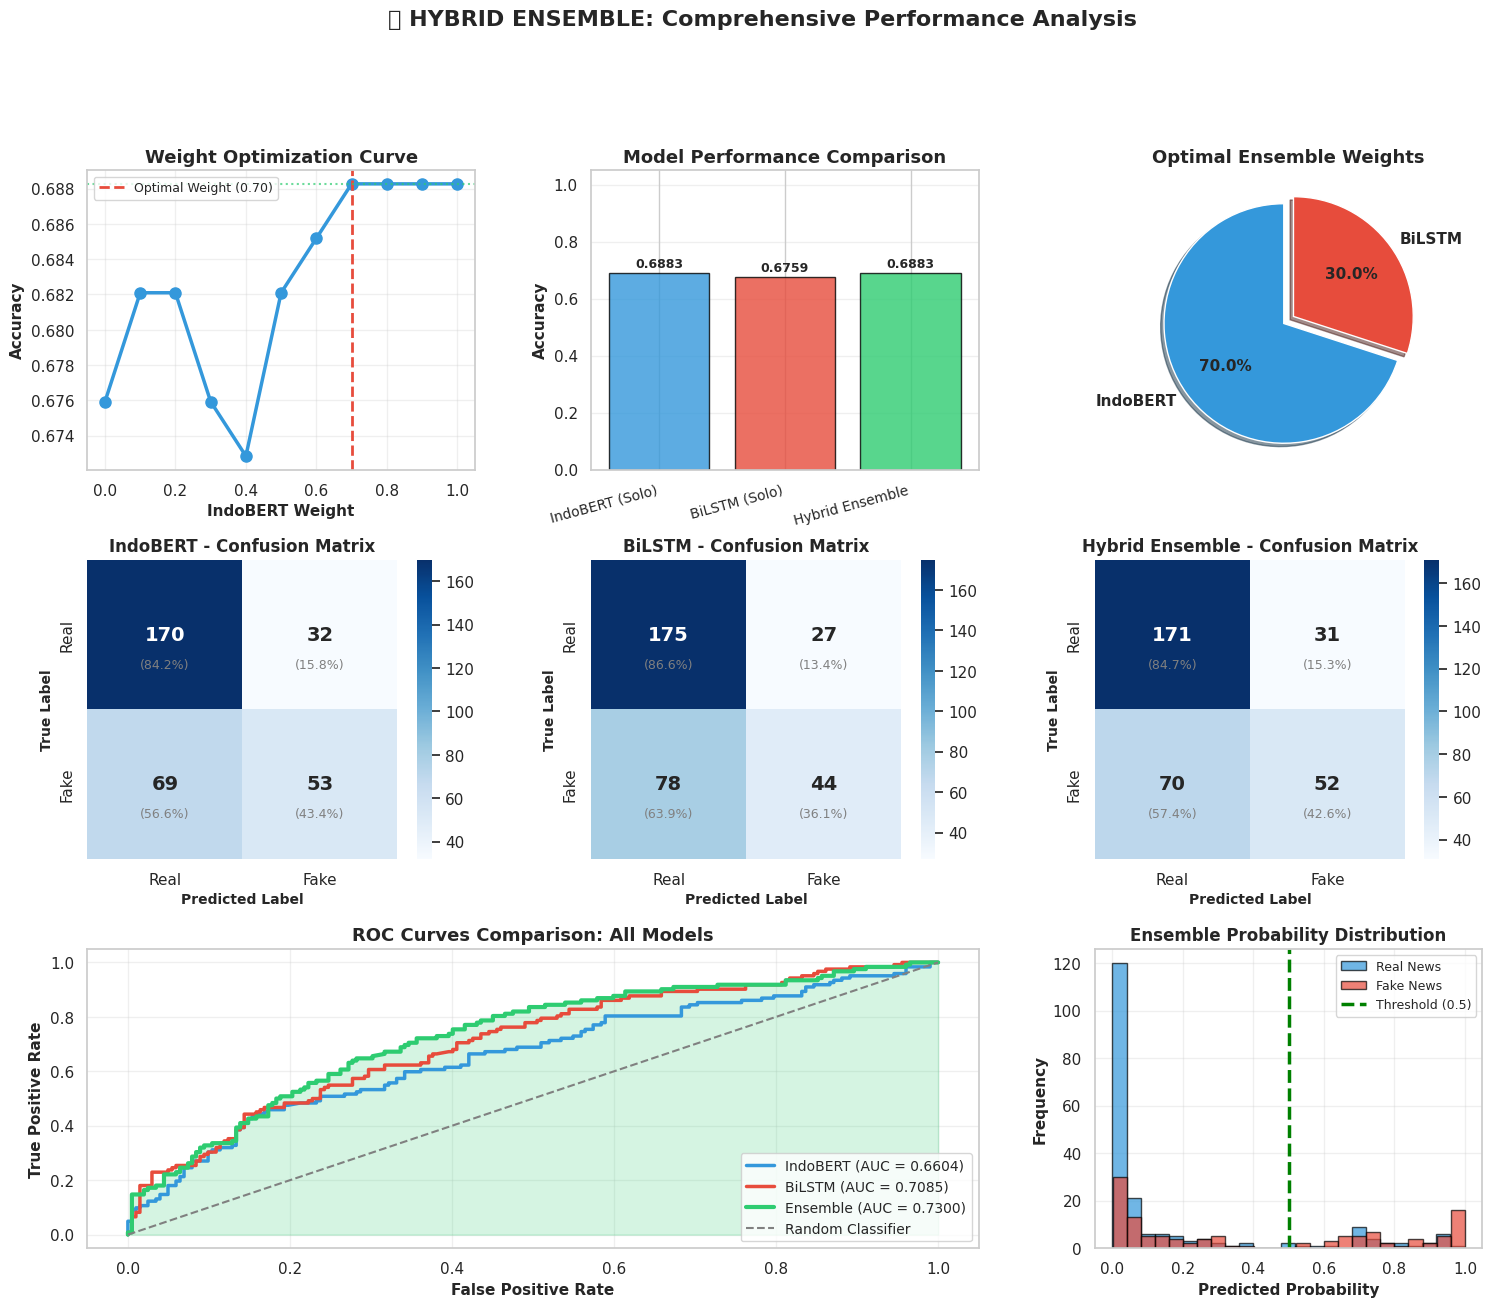

/tmp/ipython-input-959131672.py:336: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-959131672.py:337: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig('./results/ensemble_detailed_metrics.png', dpi=300, bbox_inches='tight')


✅ Detailed metrics visualization saved: ./results/ensemble_detailed_metrics.png


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


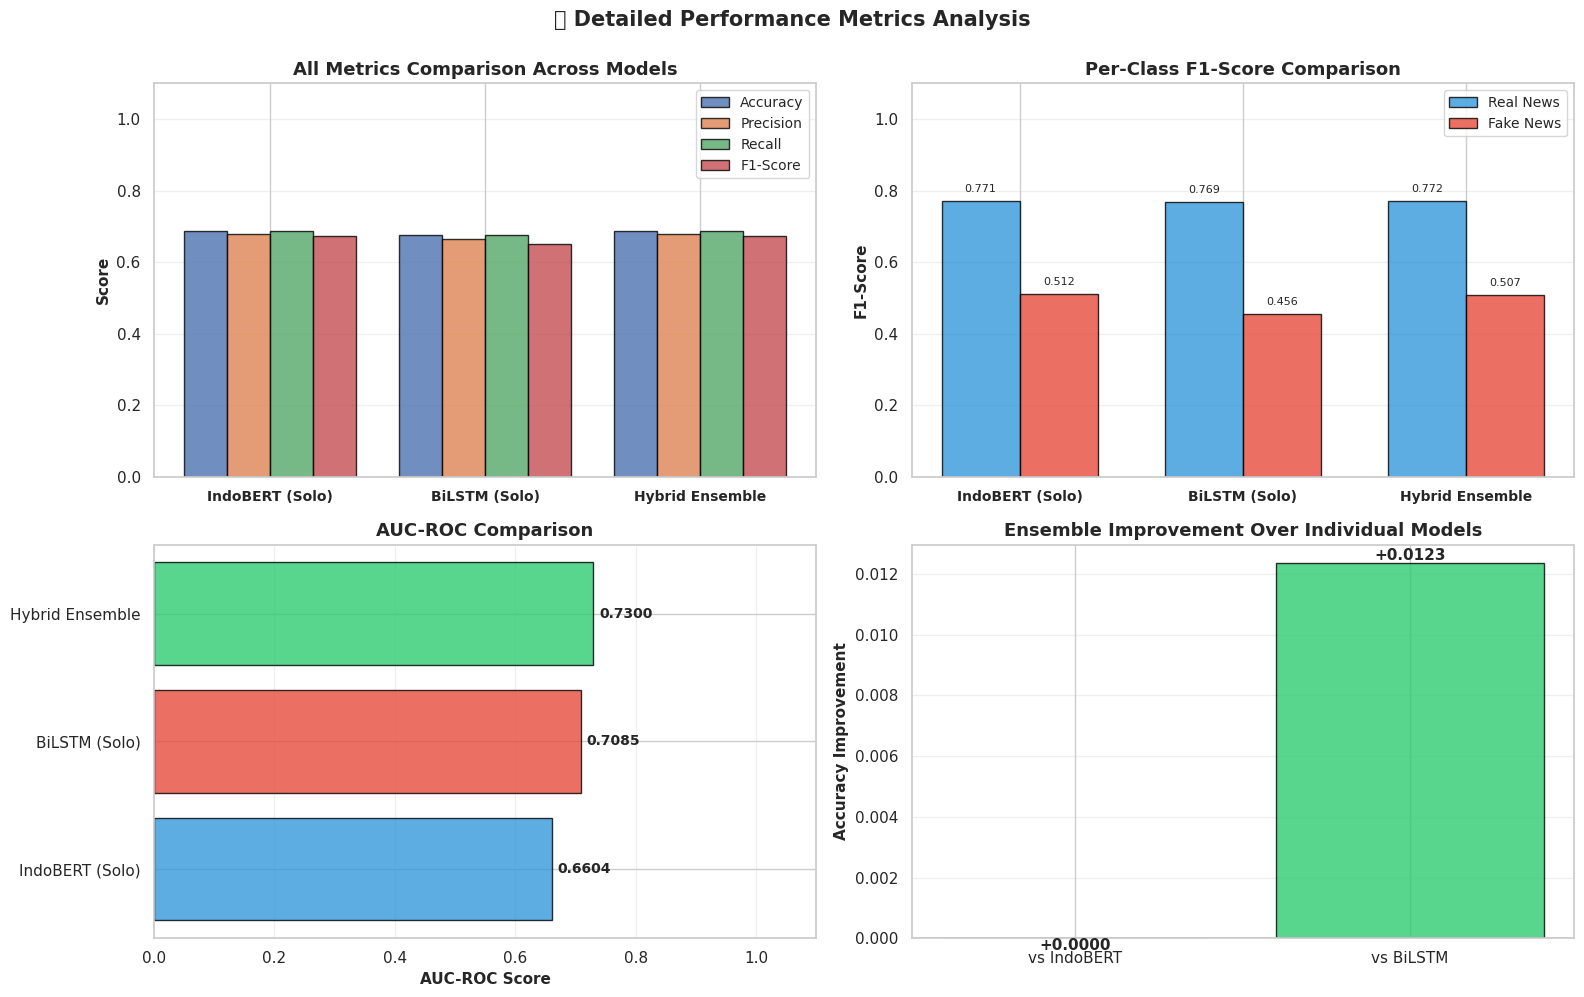


💾 Saving all results...

✅ All files saved successfully!
   📁 ./results/ensemble_final_predictions.npy
   📁 ./results/ensemble_final_probabilities.npy
   📁 ./results/ensemble_weight_search_results.csv
   📁 ./results/ensemble_models_comparison.csv
   📁 ./results/ensemble_detailed_metrics.csv
   📁 ./results/ensemble_comprehensive_visualization.png
   📁 ./results/ensemble_detailed_metrics.png

🎉 HYBRID ENSEMBLE ANALYSIS COMPLETE!
🏆 Best Model: Hybrid Ensemble
🎯 Final Accuracy: 0.6883
📈 AUC-ROC: 0.7300
⚖️  Optimal Weights: IndoBERT (0.70) + BiLSTM (0.30)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import (classification_report, accuracy_score, confusion_matrix,
                            roc_curve, auc, precision_score, recall_score, f1_score)
import matplotlib.pyplot as plt
import seaborn as sns

print("="*80)
print("🔗 STEP 7: HYBRID ENSEMBLE (INDOBERT + BILSTM)")
print("="*80)

# 1. LOAD PREDIKSI PROBABILITAS (Hasil dari Step 6A dan 6B)
try:
    # Pastikan file ini sudah disimpan di step sebelumnya
    bert_probs = np.load('./results/indobert_robust_test_preds.npy')
    lstm_probs = np.load('./results/bilstm_test_preds.npy')

    # Load Label asli untuk evaluasi
    test_labels = np.load('/content/tokenized_data/test_labels.npy')

    print("✅ Berhasil memuat prediksi dari kedua model.")
    print(f"   - IndoBERT predictions shape: {bert_probs.shape}")
    print(f"   - BiLSTM predictions shape: {lstm_probs.shape}")
    print(f"   - Test labels shape: {test_labels.shape}")
except FileNotFoundError:
    print("❌ Error: File prediksi .npy tidak ditemukan. Pastikan Step 6A dan 6B sudah dijalankan sampai selesai.")
    raise

# 2. MENCARI BOBOT OPTIMAL (Simple Grid Search)
best_weight = 0
max_acc = 0
weight_results = []

print("\n🔍 Mencari kombinasi bobot terbaik...")
print("-" * 60)
for i in np.arange(0, 1.1, 0.1):
    w1 = i
    w2 = 1 - i
    # Gabungkan probabilitas
    ensemble_probs = (w1 * bert_probs) + (w2 * lstm_probs)
    ensemble_preds = (ensemble_probs >= 0.5).astype(int).flatten()

    acc = accuracy_score(test_labels, ensemble_preds)
    weight_results.append({'IndoBERT_Weight': w1, 'BiLSTM_Weight': w2, 'Accuracy': acc})

    if acc > max_acc:
        max_acc = acc
        best_weight = w1
    print(f"   Bobot IndoBERT: {w1:.1f} | Bobot BiLSTM: {w2:.1f} -> Accuracy: {acc:.4f}")

print("-" * 60)

# Convert ke DataFrame untuk visualisasi
weights_df = pd.DataFrame(weight_results)

# 3. EVALUASI AKHIR ENSEMBLE DENGAN BOBOT TERBAIK
w1 = best_weight
w2 = 1 - best_weight
print(f"\n🏆 Bobot Optimal Ditemukan!")
print(f"   - IndoBERT: {w1:.2f} ({w1*100:.1f}%)")
print(f"   - BiLSTM: {w2:.2f} ({w2*100:.1f}%)")

final_probs = (w1 * bert_probs) + (w2 * lstm_probs)
final_preds = (final_probs >= 0.5).astype(int).flatten()

# Prediksi individual untuk perbandingan
bert_preds = (bert_probs >= 0.5).astype(int).flatten()
lstm_preds = (lstm_probs >= 0.5).astype(int).flatten()

print("\n" + "="*70)
print("📊 HASIL AKHIR ENSEMBLE")
print("="*70)

# Hitung metrik untuk semua model
models_comparison = {
    'Model': ['IndoBERT (Solo)', 'BiLSTM (Solo)', 'Hybrid Ensemble'],
    'Accuracy': [
        accuracy_score(test_labels, bert_preds),
        accuracy_score(test_labels, lstm_preds),
        accuracy_score(test_labels, final_preds)
    ],
    'Precision': [
        precision_score(test_labels, bert_preds, average='weighted'),
        precision_score(test_labels, lstm_preds, average='weighted'),
        precision_score(test_labels, final_preds, average='weighted')
    ],
    'Recall': [
        recall_score(test_labels, bert_preds, average='weighted'),
        recall_score(test_labels, lstm_preds, average='weighted'),
        recall_score(test_labels, final_preds, average='weighted')
    ],
    'F1-Score': [
        f1_score(test_labels, bert_preds, average='weighted'),
        f1_score(test_labels, lstm_preds, average='weighted'),
        f1_score(test_labels, final_preds, average='weighted')
    ]
}

comparison_df = pd.DataFrame(models_comparison)
print(comparison_df.to_string(index=False))
print("="*70)

print(f"\n🎯 Final Ensemble Accuracy: {accuracy_score(test_labels, final_preds):.4f}")
print(f"📈 Improvement over IndoBERT: {(accuracy_score(test_labels, final_preds) - accuracy_score(test_labels, bert_preds)):.4f}")
print(f"📈 Improvement over BiLSTM: {(accuracy_score(test_labels, final_preds) - accuracy_score(test_labels, lstm_preds)):.4f}")

print("\n📋 Detailed Classification Report (Ensemble):")
print(classification_report(test_labels, final_preds, target_names=['Real', 'Fake']))

# Simpan comparison ke CSV
comparison_df.to_csv('./results/ensemble_models_comparison.csv', index=False)
print("\n✅ Model comparison saved to: ./results/ensemble_models_comparison.csv")

# ========== VISUALISASI LENGKAP ==========
print("\n📊 Generating Comprehensive Visualizations...")

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (18, 12)

# ========== VISUALISASI 1: Main Dashboard (3x3) ==========
fig = plt.figure(figsize=(18, 14))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# Plot 1: Weight Search Results
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(weights_df['IndoBERT_Weight'], weights_df['Accuracy'],
         marker='o', linewidth=2.5, markersize=8, color='#3498db')
ax1.axvline(x=best_weight, color='#e74c3c', linestyle='--', linewidth=2,
           label=f'Optimal Weight ({best_weight:.2f})')
ax1.axhline(y=max_acc, color='#2ecc71', linestyle=':', linewidth=1.5, alpha=0.7)
ax1.set_xlabel('IndoBERT Weight', fontsize=11, fontweight='bold')
ax1.set_ylabel('Accuracy', fontsize=11, fontweight='bold')
ax1.set_title('Weight Optimization Curve', fontsize=13, fontweight='bold')
ax1.legend(fontsize=9)
ax1.grid(True, alpha=0.3)

# Plot 2: Model Comparison Bar Chart
ax2 = fig.add_subplot(gs[0, 1])
x_pos = np.arange(len(comparison_df['Model']))
colors = ['#3498db', '#e74c3c', '#2ecc71']
bars = ax2.bar(x_pos, comparison_df['Accuracy'], color=colors, alpha=0.8, edgecolor='black')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(comparison_df['Model'], rotation=15, ha='right', fontsize=10)
ax2.set_ylabel('Accuracy', fontsize=11, fontweight='bold')
ax2.set_title('Model Performance Comparison', fontsize=13, fontweight='bold')
ax2.set_ylim([0, 1.05])
ax2.grid(True, alpha=0.3, axis='y')

# Tambahkan nilai di atas bar
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{height:.4f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

# Plot 3: Ensemble Weight Distribution (Pie Chart)
ax3 = fig.add_subplot(gs[0, 2])
sizes = [w1, w2]
labels = ['IndoBERT', 'BiLSTM']
colors_pie = ['#3498db', '#e74c3c']
explode = (0.05, 0.05)
wedges, texts, autotexts = ax3.pie(sizes, explode=explode, labels=labels, colors=colors_pie,
                                     autopct='%1.1f%%', shadow=True, startangle=90,
                                     textprops={'fontsize': 11, 'weight': 'bold'})
ax3.set_title('Optimal Ensemble Weights', fontsize=13, fontweight='bold')

# Plot 4-6: Confusion Matrices (3 models)
cms = [
    (confusion_matrix(test_labels, bert_preds), 'IndoBERT', gs[1, 0]),
    (confusion_matrix(test_labels, lstm_preds), 'BiLSTM', gs[1, 1]),
    (confusion_matrix(test_labels, final_preds), 'Hybrid Ensemble', gs[1, 2])
]

for cm, title, grid_pos in cms:
    ax = fig.add_subplot(grid_pos)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
               xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'],
               ax=ax, annot_kws={'size': 14, 'weight': 'bold'})
    ax.set_xlabel('Predicted Label', fontsize=10, fontweight='bold')
    ax.set_ylabel('True Label', fontsize=10, fontweight='bold')
    ax.set_title(f'{title} - Confusion Matrix', fontsize=12, fontweight='bold')

    # Tambahkan persentase
    for i in range(2):
        for j in range(2):
            percentage = cm[i, j] / cm[i].sum() * 100
            ax.text(j + 0.5, i + 0.7, f'({percentage:.1f}%)',
                   ha='center', va='center', fontsize=9, color='gray')

# Plot 7: ROC Curves Comparison
ax7 = fig.add_subplot(gs[2, :2])

# Hitung ROC untuk semua model
fpr_bert, tpr_bert, _ = roc_curve(test_labels, bert_probs)
roc_auc_bert = auc(fpr_bert, tpr_bert)

fpr_lstm, tpr_lstm, _ = roc_curve(test_labels, lstm_probs)
roc_auc_lstm = auc(fpr_lstm, tpr_lstm)

fpr_ensemble, tpr_ensemble, _ = roc_curve(test_labels, final_probs)
roc_auc_ensemble = auc(fpr_ensemble, tpr_ensemble)

# Plot ROC curves
ax7.plot(fpr_bert, tpr_bert, linewidth=2.5, label=f'IndoBERT (AUC = {roc_auc_bert:.4f})',
         color='#3498db')
ax7.plot(fpr_lstm, tpr_lstm, linewidth=2.5, label=f'BiLSTM (AUC = {roc_auc_lstm:.4f})',
         color='#e74c3c')
ax7.plot(fpr_ensemble, tpr_ensemble, linewidth=3, label=f'Ensemble (AUC = {roc_auc_ensemble:.4f})',
         color='#2ecc71', linestyle='-')
ax7.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=1.5, label='Random Classifier')

ax7.set_xlabel('False Positive Rate', fontsize=11, fontweight='bold')
ax7.set_ylabel('True Positive Rate', fontsize=11, fontweight='bold')
ax7.set_title('ROC Curves Comparison: All Models', fontsize=13, fontweight='bold')
ax7.legend(loc='lower right', fontsize=10)
ax7.grid(True, alpha=0.3)
ax7.fill_between(fpr_ensemble, tpr_ensemble, alpha=0.2, color='#2ecc71')

# Plot 8: Prediction Probability Distribution
ax8 = fig.add_subplot(gs[2, 2])
real_probs = final_probs[test_labels == 0].flatten()
fake_probs = final_probs[test_labels == 1].flatten()

ax8.hist(real_probs, bins=25, alpha=0.7, color='#3498db', edgecolor='black', label='Real News')
ax8.hist(fake_probs, bins=25, alpha=0.7, color='#e74c3c', edgecolor='black', label='Fake News')
ax8.axvline(x=0.5, color='green', linestyle='--', linewidth=2.5, label='Threshold (0.5)')
ax8.set_xlabel('Predicted Probability', fontsize=11, fontweight='bold')
ax8.set_ylabel('Frequency', fontsize=11, fontweight='bold')
ax8.set_title('Ensemble Probability Distribution', fontsize=12, fontweight='bold')
ax8.legend(fontsize=9)
ax8.grid(True, alpha=0.3)

plt.suptitle('🔗 HYBRID ENSEMBLE: Comprehensive Performance Analysis',
             fontsize=16, fontweight='bold', y=0.995)

plt.savefig('./results/ensemble_comprehensive_visualization.png', dpi=300, bbox_inches='tight')
print("✅ Main visualization saved: ./results/ensemble_comprehensive_visualization.png")
plt.show()

# ========== VISUALISASI 2: Detailed Metrics Comparison ==========
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Plot 1: Accuracy Comparison with Error Margins
ax = axes[0, 0]
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x_pos = np.arange(len(comparison_df['Model']))
width = 0.2

for i, metric in enumerate(metrics):
    offset = (i - 1.5) * width
    bars = ax.bar(x_pos + offset, comparison_df[metric], width,
                  label=metric, alpha=0.8, edgecolor='black')

ax.set_xticks(x_pos)
ax.set_xticklabels(comparison_df['Model'], fontsize=10, fontweight='bold')
ax.set_ylabel('Score', fontsize=11, fontweight='bold')
ax.set_title('All Metrics Comparison Across Models', fontsize=13, fontweight='bold')
ax.legend(fontsize=10)
ax.set_ylim([0, 1.1])
ax.grid(True, alpha=0.3, axis='y')

# Plot 2: Per-Class Performance (Real vs Fake)
ax = axes[0, 1]
real_f1 = [
    f1_score(test_labels, bert_preds, pos_label=0),
    f1_score(test_labels, lstm_preds, pos_label=0),
    f1_score(test_labels, final_preds, pos_label=0)
]
fake_f1 = [
    f1_score(test_labels, bert_preds, pos_label=1),
    f1_score(test_labels, lstm_preds, pos_label=1),
    f1_score(test_labels, final_preds, pos_label=1)
]

x = np.arange(len(comparison_df['Model']))
width = 0.35
bars1 = ax.bar(x - width/2, real_f1, width, label='Real News', color='#3498db', alpha=0.8, edgecolor='black')
bars2 = ax.bar(x + width/2, fake_f1, width, label='Fake News', color='#e74c3c', alpha=0.8, edgecolor='black')

ax.set_xticks(x)
ax.set_xticklabels(comparison_df['Model'], fontsize=10, fontweight='bold')
ax.set_ylabel('F1-Score', fontsize=11, fontweight='bold')
ax.set_title('Per-Class F1-Score Comparison', fontsize=13, fontweight='bold')
ax.legend(fontsize=10)
ax.set_ylim([0, 1.1])
ax.grid(True, alpha=0.3, axis='y')

# Tambahkan nilai di atas bar
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.02,
               f'{height:.3f}', ha='center', va='bottom', fontsize=8)

# Plot 3: AUC-ROC Comparison
ax = axes[1, 0]
auc_scores = [roc_auc_bert, roc_auc_lstm, roc_auc_ensemble]
colors = ['#3498db', '#e74c3c', '#2ecc71']
bars = ax.barh(comparison_df['Model'], auc_scores, color=colors, alpha=0.8, edgecolor='black')
ax.set_xlabel('AUC-ROC Score', fontsize=11, fontweight='bold')
ax.set_title('AUC-ROC Comparison', fontsize=13, fontweight='bold')
ax.set_xlim([0, 1.1])
ax.grid(True, alpha=0.3, axis='x')

# Tambahkan nilai di samping bar
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width + 0.01, bar.get_y() + bar.get_height()/2.,
           f'{auc_scores[i]:.4f}', ha='left', va='center', fontsize=10, fontweight='bold')

# Plot 4: Improvement Summary
ax = axes[1, 1]
improvement_data = {
    'Metric': ['vs IndoBERT', 'vs BiLSTM'],
    'Accuracy Gain': [
        accuracy_score(test_labels, final_preds) - accuracy_score(test_labels, bert_preds),
        accuracy_score(test_labels, final_preds) - accuracy_score(test_labels, lstm_preds)
    ]
}
improvement_colors = ['#2ecc71' if x > 0 else '#e74c3c' for x in improvement_data['Accuracy Gain']]
bars = ax.bar(improvement_data['Metric'], improvement_data['Accuracy Gain'],
             color=improvement_colors, alpha=0.8, edgecolor='black')
ax.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax.set_ylabel('Accuracy Improvement', fontsize=11, fontweight='bold')
ax.set_title('Ensemble Improvement Over Individual Models', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')

# Tambahkan nilai
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
           f'{height:+.4f}', ha='center', va='bottom' if height > 0 else 'top',
           fontsize=11, fontweight='bold')

plt.suptitle('📊 Detailed Performance Metrics Analysis', fontsize=15, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('./results/ensemble_detailed_metrics.png', dpi=300, bbox_inches='tight')
print("✅ Detailed metrics visualization saved: ./results/ensemble_detailed_metrics.png")
plt.show()

# ========== SIMPAN SEMUA HASIL ==========
print("\n💾 Saving all results...")

# Simpan prediksi final
np.save('./results/ensemble_final_predictions.npy', final_preds)
np.save('./results/ensemble_final_probabilities.npy', final_probs)

# Simpan weight results
weights_df.to_csv('./results/ensemble_weight_search_results.csv', index=False)

# Simpan detailed metrics
detailed_metrics = {
    'Model': ['IndoBERT', 'BiLSTM', 'Ensemble'],
    'Accuracy': [accuracy_score(test_labels, bert_preds),
                accuracy_score(test_labels, lstm_preds),
                accuracy_score(test_labels, final_preds)],
    'Precision_Real': [precision_score(test_labels, bert_preds, pos_label=0),
                      precision_score(test_labels, lstm_preds, pos_label=0),
                      precision_score(test_labels, final_preds, pos_label=0)],
    'Precision_Fake': [precision_score(test_labels, bert_preds, pos_label=1),
                      precision_score(test_labels, lstm_preds, pos_label=1),
                      precision_score(test_labels, final_preds, pos_label=1)],
    'Recall_Real': [recall_score(test_labels, bert_preds, pos_label=0),
                   recall_score(test_labels, lstm_preds, pos_label=0),
                   recall_score(test_labels, final_preds, pos_label=0)],
    'Recall_Fake': [recall_score(test_labels, bert_preds, pos_label=1),
                   recall_score(test_labels, lstm_preds, pos_label=1),
                   recall_score(test_labels, final_preds, pos_label=1)],
    'F1_Real': [f1_score(test_labels, bert_preds, pos_label=0),
               f1_score(test_labels, lstm_preds, pos_label=0),
               f1_score(test_labels, final_preds, pos_label=0)],
    'F1_Fake': [f1_score(test_labels, bert_preds, pos_label=1),
               f1_score(test_labels, lstm_preds, pos_label=1),
               f1_score(test_labels, final_preds, pos_label=1)],
    'AUC_ROC': [roc_auc_bert, roc_auc_lstm, roc_auc_ensemble]
}

detailed_df = pd.DataFrame(detailed_metrics)
detailed_df.to_csv('./results/ensemble_detailed_metrics.csv', index=False)

print("\n✅ All files saved successfully!")
print("   📁 ./results/ensemble_final_predictions.npy")
print("   📁 ./results/ensemble_final_probabilities.npy")
print("   📁 ./results/ensemble_weight_search_results.csv")
print("   📁 ./results/ensemble_models_comparison.csv")
print("   📁 ./results/ensemble_detailed_metrics.csv")
print("   📁 ./results/ensemble_comprehensive_visualization.png")
print("   📁 ./results/ensemble_detailed_metrics.png")

print("\n" + "="*80)
print("🎉 HYBRID ENSEMBLE ANALYSIS COMPLETE!")
print("="*80)
print(f"🏆 Best Model: Hybrid Ensemble")
print(f"🎯 Final Accuracy: {accuracy_score(test_labels, final_preds):.4f}")
print(f"📈 AUC-ROC: {roc_auc_ensemble:.4f}")
print(f"⚖️  Optimal Weights: IndoBERT ({w1:.2f}) + BiLSTM ({w2:.2f})")
print("="*80)

# STACKING

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

print("="*80)
print("🔗 ENSEMBLE METHODS: STACKING & MAJORITY VOTING")
print("="*80)

# ============================================================================
# LOAD DATA
# ============================================================================
try:
    # Load prediksi probabilitas dari kedua model
    bert_probs = np.load('./results/indobert_robust_test_preds.npy')
    lstm_probs = np.load('./results/bilstm_test_preds.npy')

    # Load label asli
    test_labels = np.load('/content/tokenized_data/test_labels.npy')

    # Load juga data training untuk stacking (PENTING!)
    bert_train_probs = np.load('./results/indobert_robust_train_preds.npy')  # Harus dibuat dulu
    lstm_train_probs = np.load('./results/bilstm_train_preds.npy')  # Harus dibuat dulu
    train_labels = np.load('/content/tokenized_data/train_labels.npy')

    print("✅ Berhasil memuat prediksi dari kedua model.")
    print(f"   Test samples: {len(test_labels)}")
    print(f"   Train samples: {len(train_labels)}")

except FileNotFoundError as e:
    print(f"❌ Error: {e}")
    print("⚠️  Untuk Stacking, Anda perlu menyimpan prediksi training set juga!")
    print("   Tambahkan di script training: np.save('results/indobert_robust_train_preds.npy', train_preds)")
    raise

🔗 ENSEMBLE METHODS: STACKING & MAJORITY VOTING
✅ Berhasil memuat prediksi dari kedua model.
   Test samples: 324
   Train samples: 1880



📚 MULTI-MODEL STACKING ENSEMBLE

🎯 Training Meta-Learner: Logistic Regression...
✅ Logistic Regression Done. Accuracy: 0.6914
              precision    recall  f1-score   support

        Real       0.71      0.86      0.78       202
        Fake       0.64      0.42      0.50       122

    accuracy                           0.69       324
   macro avg       0.67      0.64      0.64       324
weighted avg       0.68      0.69      0.67       324


🎯 Training Meta-Learner: SVM (RBF Kernel)...
✅ SVM (RBF Kernel) Done. Accuracy: 0.6883
              precision    recall  f1-score   support

        Real       0.72      0.83      0.77       202
        Fake       0.62      0.46      0.53       122

    accuracy                           0.69       324
   macro avg       0.67      0.64      0.65       324
weighted avg       0.68      0.69      0.68       324


🎯 Training Meta-Learner: Random Forest...
✅ Random Forest Done. Accuracy: 0.6852
              precision    recall  f1-score   sup

<Figure size 1000x600 with 0 Axes>

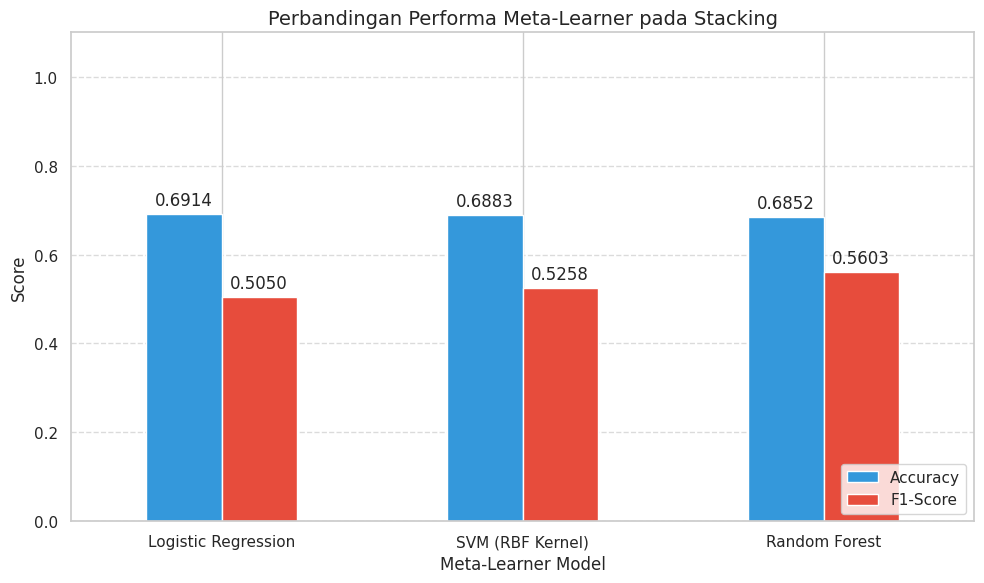

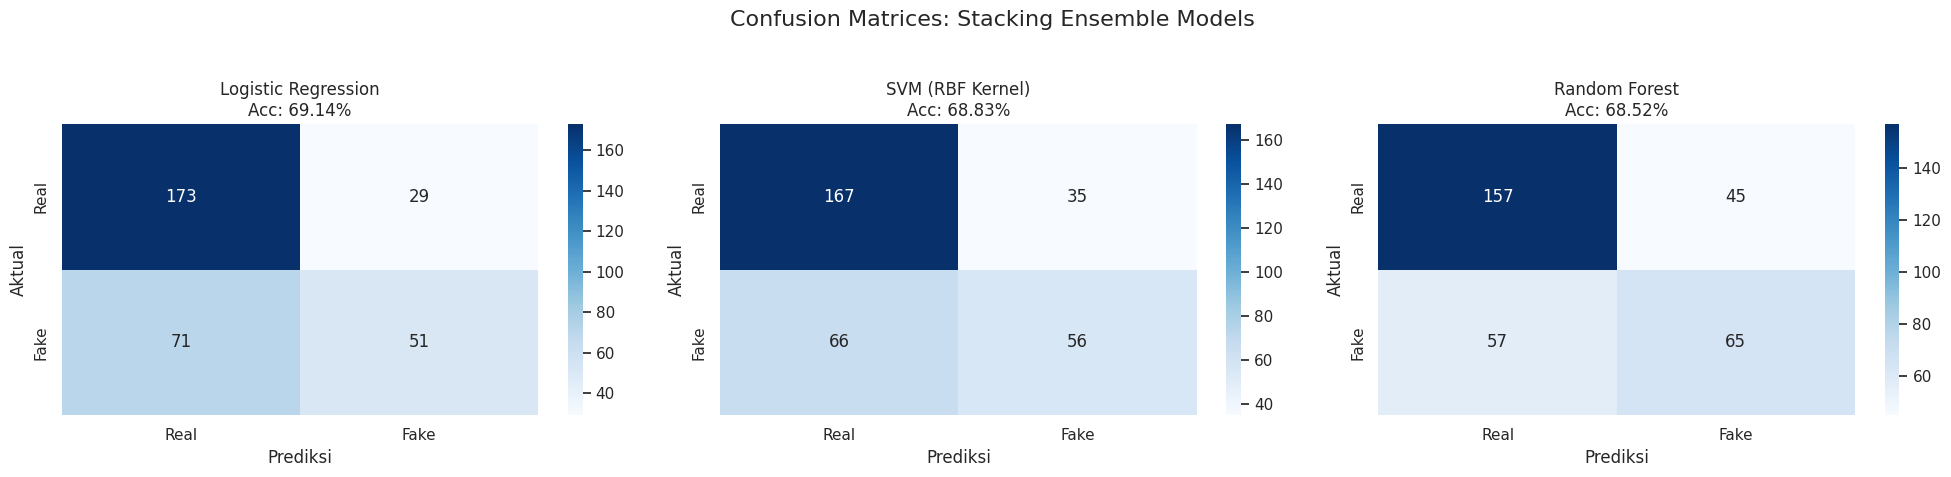

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score

# ============================================================================
# PREPARASI DATA STACKING
# ============================================================================
print("\n" + "="*80)
print("📚 MULTI-MODEL STACKING ENSEMBLE")
print("="*80)

# Gabungkan probabilitas sebagai fitur untuk meta-learner
X_train_stack = np.column_stack([bert_train_probs.flatten(), lstm_train_probs.flatten()])
X_test_stack = np.column_stack([bert_probs.flatten(), lstm_probs.flatten()])

# Definisi Meta-Learners
meta_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM (RBF Kernel)": SVC(probability=True, kernel='rbf', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Dictionary untuk menyimpan hasil
results = {}

# ============================================================================
# TRAINING & EVALUATION LOOP
# ============================================================================
for name, model in meta_models.items():
    print(f"\n🎯 Training Meta-Learner: {name}...")
    model.fit(X_train_stack, train_labels)

    # Prediksi
    preds = model.predict(X_test_stack)

    # Hitung Metrik
    acc = accuracy_score(test_labels, preds)
    f1 = f1_score(test_labels, preds)
    results[name] = {'Accuracy': acc, 'F1-Score': f1, 'Predictions': preds}

    print(f"✅ {name} Done. Accuracy: {acc:.4f}")
    print(classification_report(test_labels, preds, target_names=['Real', 'Fake']))

# ============================================================================
# VISUALISASI 1: PERBANDINGAN AKURASI
# ============================================================================
df_results = pd.DataFrame(results).T[['Accuracy', 'F1-Score']]

plt.figure(figsize=(10, 6))
ax = df_results.plot(kind='bar', figsize=(10, 6), color=['#3498db', '#e74c3c'])
plt.title('Perbandingan Performa Meta-Learner pada Stacking', fontsize=14)
plt.ylabel('Score')
plt.xlabel('Meta-Learner Model')
plt.xticks(rotation=0)
plt.ylim(0, 1.1)
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tambahkan label angka di atas bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():.4f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

# ============================================================================
# VISUALISASI 2: CONFUSION MATRICES (Side-by-Side)
# ============================================================================
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Confusion Matrices: Stacking Ensemble Models', fontsize=16)

for i, (name, res) in enumerate(results.items()):
    cm = confusion_matrix(test_labels, res['Predictions'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i],
                xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
    axes[i].set_title(f"{name}\nAcc: {res['Accuracy']:.2%}")
    axes[i].set_xlabel('Prediksi')
    axes[i].set_ylabel('Aktual')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# SNAPSHOT EMBENDING

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# 1. Menghitung Rata-rata Probabilitas (Ensemble Averaging)
# Kita asumsikan output adalah probabilitas untuk kelas positif (Fake)
ensemble_probs = (bert_probs + lstm_probs) / 2

# 2. Konversi Probabilitas ke Label (Threshold 0.5)
ensemble_preds = (ensemble_probs > 0.5).astype(int)

# 3. Hitung Metrik untuk Perbandingan
models = ['IndoBERT', 'BiLSTM', 'Ensemble']
accuracies = [
    accuracy_score(test_labels, (bert_probs > 0.5).astype(int)),
    accuracy_score(test_labels, (lstm_probs > 0.5).astype(int)),
    accuracy_score(test_labels, ensemble_preds)
]
f1_scores = [
    f1_score(test_labels, (bert_probs > 0.5).astype(int)),
    f1_score(test_labels, (lstm_probs > 0.5).astype(int)),
    f1_score(test_labels, ensemble_preds)
]

print("📊 HASIL EVALUASI ENSEMBLE")
print("-" * 30)
print(classification_report(test_labels, ensemble_preds, target_names=['Real', 'Fake']))

📊 HASIL EVALUASI ENSEMBLE
------------------------------
              precision    recall  f1-score   support

        Real       0.70      0.87      0.77       202
        Fake       0.63      0.37      0.47       122

    accuracy                           0.68       324
   macro avg       0.66      0.62      0.62       324
weighted avg       0.67      0.68      0.66       324



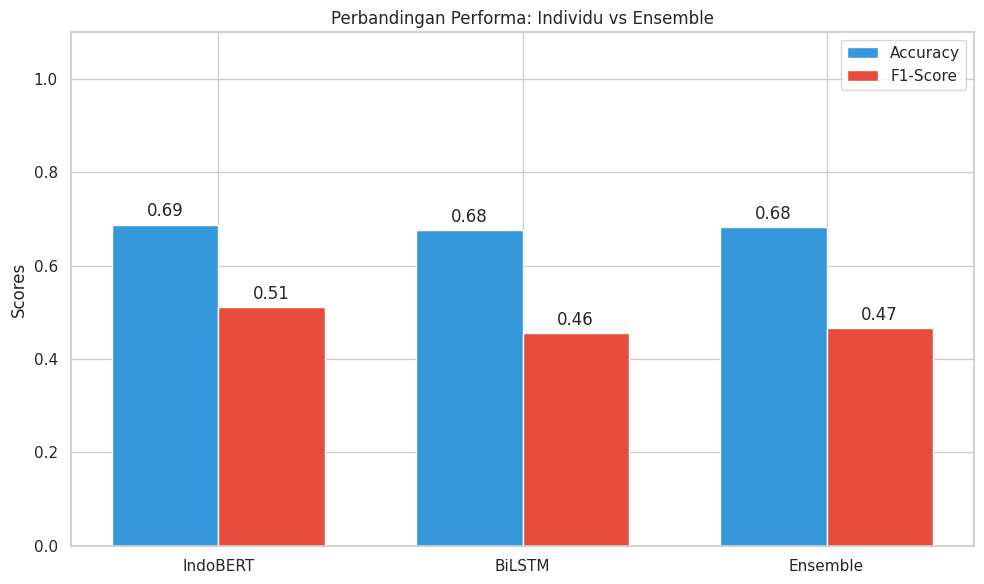

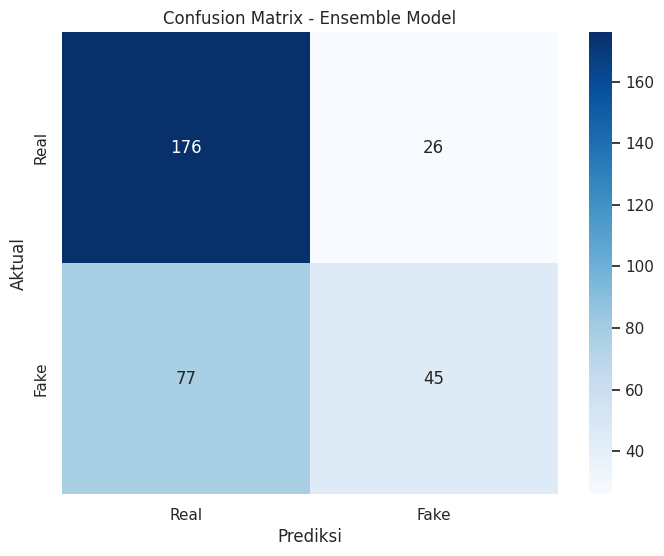

In [ ]:
# --- Visualisasi 1: Perbandingan Akurasi & F1-Score ---
x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, accuracies, width, label='Accuracy', color='#3498db')
rects2 = ax.bar(x + width/2, f1_scores, width, label='F1-Score', color='#e74c3c')

ax.set_ylabel('Scores')
ax.set_title('Perbandingan Performa: Individu vs Ensemble')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.set_ylim(0, 1.1) # Memberi ruang untuk label

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
plt.tight_layout()
plt.show()

# --- Visualisasi 2: Confusion Matrix Ensemble ---
cm = confusion_matrix(test_labels, ensemble_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Real', 'Fake'],
            yticklabels=['Real', 'Fake'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix - Ensemble Model')
plt.show()


📊 PERBANDINGAN SEMUA ENSEMBLE METHODS
⚠️  Weighted Average belum disimpan. Hitung ulang...

🏆 RANKING ENSEMBLE METHODS:
             Method  Accuracy  Precision    Recall  F1-Score
1  Weighted Average  0.691358   0.689452  0.691358  0.690299
2          Stacking  0.672840   0.666438  0.672840  0.668361
3   Majority Voting  0.641975   0.680727  0.641975  0.647265


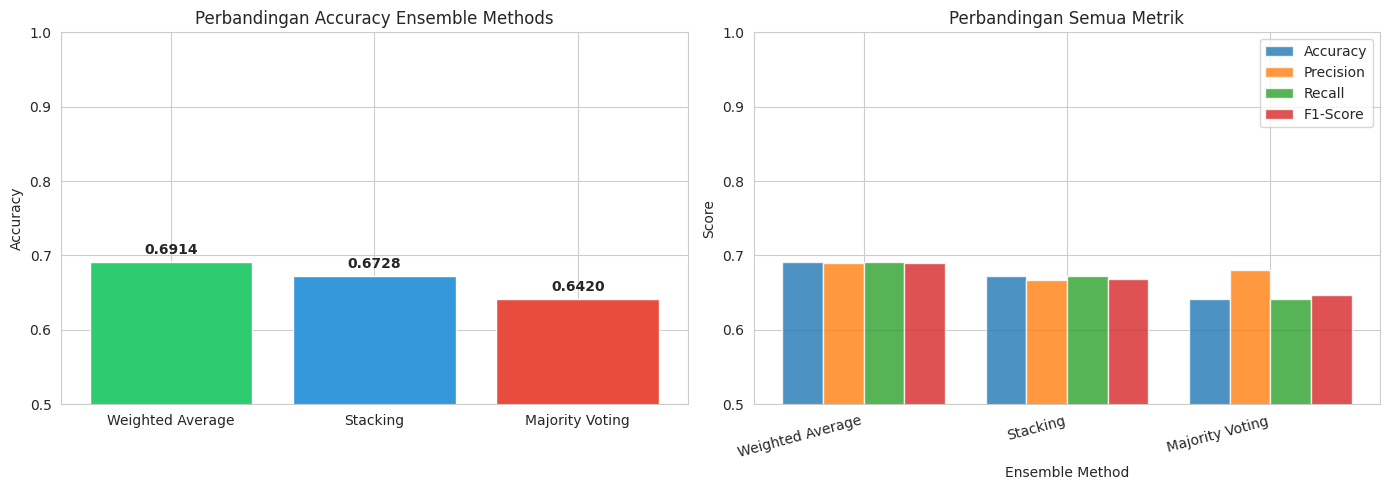


✅ Hasil perbandingan disimpan ke: ./results/ensemble_comparison.csv

✅ SELESAI! Semua ensemble method telah dievaluasi.


In [ ]:
# ============================================================================
# PERBANDINGAN SEMUA METODE (Load hasil Weighted Average dari step sebelumnya)
# ============================================================================
print("\n" + "="*80)
print("📊 PERBANDINGAN SEMUA ENSEMBLE METHODS")
print("="*80)

# Anda perlu menjalankan weighted average dulu dan simpan hasilnya
# Atau load dari hasil sebelumnya
try:
    # Contoh: load hasil weighted average yang sudah disimpan
    weighted_preds = np.load('./results/weighted_avg_preds.npy')
    weighted_acc = accuracy_score(test_labels, weighted_preds)
except:
    print("⚠️  Weighted Average belum disimpan. Hitung ulang...")
    # Gunakan bobot terbaik dari weighted average Anda (misal: 0.6, 0.4)
    w1, w2 = 0.6, 0.4
    weighted_probs = (w1 * bert_probs) + (w2 * lstm_probs)
    weighted_preds = (weighted_probs >= 0.5).astype(int).flatten()
    weighted_acc = accuracy_score(test_labels, weighted_preds)
    np.save('./results/weighted_avg_preds.npy', weighted_preds)

# Buat tabel perbandingan
comparison_df = pd.DataFrame({
    'Method': ['Stacking', 'Majority Voting', 'Weighted Average'],
    'Accuracy': [stacking_acc, majority_acc, weighted_acc]
})

# Tambahkan metrik lainnya
from sklearn.metrics import precision_score, recall_score, f1_score

for idx, preds in enumerate([stacking_preds, majority_preds, weighted_preds]):
    comparison_df.loc[idx, 'Precision'] = precision_score(test_labels, preds, average='weighted')
    comparison_df.loc[idx, 'Recall'] = recall_score(test_labels, preds, average='weighted')
    comparison_df.loc[idx, 'F1-Score'] = f1_score(test_labels, preds, average='weighted')

# Sort by accuracy
comparison_df = comparison_df.sort_values('Accuracy', ascending=False).reset_index(drop=True)
comparison_df.index = comparison_df.index + 1  # Ranking

print("\n🏆 RANKING ENSEMBLE METHODS:")
print(comparison_df.to_string(index=True))

# Visualisasi perbandingan
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Bar chart accuracy
axes[0].bar(comparison_df['Method'], comparison_df['Accuracy'],
            color=['#2ecc71', '#3498db', '#e74c3c'])
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Perbandingan Accuracy Ensemble Methods')
axes[0].set_ylim([0.5, 1.0])
for i, v in enumerate(comparison_df['Accuracy']):
    axes[0].text(i, v + 0.01, f'{v:.4f}', ha='center', fontweight='bold')

# Plot 2: Grouped bar chart semua metrik
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(comparison_df))
width = 0.2

for i, metric in enumerate(metrics):
    axes[1].bar(x + i*width, comparison_df[metric], width,
                label=metric, alpha=0.8)

axes[1].set_xlabel('Ensemble Method')
axes[1].set_ylabel('Score')
axes[1].set_title('Perbandingan Semua Metrik')
axes[1].set_xticks(x + width * 1.5)
axes[1].set_xticklabels(comparison_df['Method'], rotation=15, ha='right')
axes[1].legend()
axes[1].set_ylim([0.5, 1.0])

plt.tight_layout()
plt.savefig('./results/ensemble_comparison.png', dpi=300)
plt.show()

# Simpan hasil ke CSV
comparison_df.to_csv('./results/ensemble_comparison.csv', index=False)
print("\n✅ Hasil perbandingan disimpan ke: ./results/ensemble_comparison.csv")

print("\n" + "="*80)
print("✅ SELESAI! Semua ensemble method telah dievaluasi.")
print("="*80)

#SAVE DAN JALANKAN DI DRIVE

In [ ]:
from google.colab import drive
import shutil
import os

# 1. Mount Google Drive
drive.mount('/content/drive')

# 2. Buat folder backup di Google Drive
backup_path = '/content/drive/MyDrive/fake_news_project'
os.makedirs(backup_path, exist_ok=True)

# 3. Daftar folder yang akan disimpan
folders_to_backup = ['models', 'results', 'tokenized_data']

print("🚀 Memulai backup ke Google Drive...")
print("="*60)

for folder in folders_to_backup:
    source = f'/content/{folder}'
    destination = f'{backup_path}/{folder}'

    if os.path.exists(source):
        # Hapus folder lama di Drive jika ada agar tidak error saat copytree
        if os.path.exists(destination):
            shutil.rmtree(destination)

        # Copy folder baru
        shutil.copytree(source, destination)

        # Hitung ukuran folder
        size_bytes = 0
        for dirpath, _, filenames in os.walk(destination):
            for filename in filenames:
                fp = os.path.join(dirpath, filename)
                size_bytes += os.path.getsize(fp)

        size_mb = size_bytes / (1024 * 1024)

        # Emoji di sini aman karena di dalam tanda kutip (string)
        print(f"✅ {folder:20s} → {size_mb:8.2f} MB")
    else:
        print(f"⚠️  {folder} tidak ditemukan, skip...")

print("="*60)
print("🎉 Backup selesai!")
print(f"📁 Lokasi: {backup_path}")

Mounted at /content/drive
🚀 Memulai backup ke Google Drive...
✅ models               →  1478.62 MB
✅ results              →     4.12 MB
✅ tokenized_data       →    20.21 MB
🎉 Backup selesai!
📁 Lokasi: /content/drive/MyDrive/fake_news_project


In [ ]:
from google.colab import drive
import shutil
import os

# 1. Mount Google Drive
drive.mount('/content/drive')

# 2. Path sumber dari Google Drive
backup_path = '/content/drive/MyDrive/fake_news_project'

# 3. Daftar folder yang akan dipulihkan
folders_to_restore = ['models', 'results', 'tokenized_data']

print("🔄 Memulai restore dari Google Drive...")
print("="*60)

for folder in folders_to_restore:
    source = f'{backup_path}/{folder}'
    destination = f'/content/{folder}'

    if os.path.exists(source):
        # Hapus folder lama di Colab jika ada
        if os.path.exists(destination):
            shutil.rmtree(destination)

        # Copy folder dari Drive ke Colab
        shutil.copytree(source, destination)

        # Hitung ukuran
        size_mb = sum(os.path.getsize(os.path.join(dirpath, filename))
                     for dirpath, _, filenames in os.walk(destination)
                     for filename in filenames) / (1024 * 1024)

        print(f"✅ {folder:20s} → {size_mb:8.2f} MB")
    else:
        print(f"❌ {folder} tidak ditemukan di Drive!")

print("="*60)
print("🎉 Restore selesai!")
print("\nFolder yang dimuat:")
print("  - /content/models/")
print("  - /content/results/")
print("  - /content/tokenized_data/")
print("\n⚡ Siap digunakan untuk inference atau training lanjutan!")

In [ ]:
import os

print("📋 Verifikasi file yang dimuat:\n")

# Cek models
print("🔹 Models:")
if os.path.exists('/content/models'):
    for file in os.listdir('/content/models'):
        print(f"   ✓ {file}")

# Cek results
print("\n🔹 Results:")
if os.path.exists('/content/results'):
    for file in os.listdir('/content/results'):
        print(f"   ✓ {file}")

# Cek tokenized_data
print("\n🔹 Tokenized Data:")
if os.path.exists('/content/tokenized_data'):
    for file in os.listdir('/content/tokenized_data'):
        print(f"   ✓ {file}")